# For the model specific figures use this entire script without using '02_region_alloc' first. 

# For all other plots use script '02_region_alloc' first and skip the first couple of cells in this script here. Start by loading the df in as is done in the cell called:

# IMPORT REGION EQUAL DATAFRAMES
equity_remind=pd.read_excel(data_path+'REMIND_equity_equalreg_use.xls')
equity_image=pd.read_excel(data_path+'IMAGE_equity_equalreg_use.xls')
equity_message=pd.read_excel(data_path+'MESSAGE_equity_equalreg_use.xls')
allmodels_df=pd.read_excel(data_path+'MASTERDF_equity_equalreg_use.xls')

# Then start using this script normally after that cell

In [1]:
%matplotlib inline
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from scipy import integrate
import seaborn as sns
import itertools
from matplotlib.lines import Line2D
import matplotlib.pylab as plb
from sklearn.linear_model import LinearRegression
import matplotlib.style as style
from matplotlib.patches import Patch

data_path = ""
plot_path = ""
table_path = ""


pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

In [2]:

main_remind=pd.read_excel(data_path+'REMIND_prepINPUT_use.xls')
main_image=pd.read_excel(data_path+'IMAGE_prepINPUT_use.xls')
main_message=pd.read_excel(data_path+'MESSAGE_prepINPUT_use.xls')

In [15]:
main_message.Region.unique()

array(['CHN', 'EU', 'IND', 'R11_AFR', 'R11_FSU', 'R11_LAM', 'R11_MEA',
       'R11_PAO', 'R11_PAS', 'USA', 'World'], dtype=object)

In [3]:
regions_rem = ['AFR', 'CHN', 'EUR', 'IND', 'JPN', 'LAM', 'MEA', 'OAS', 'ROW', 'RUS', 'USA', 'World']
regions_ima = ['BRA', 'CAN', 'CEU', 'CHN', 'EAF', 'INDIA', 'INDO', 'JAP', 'KOR', 'ME', 'MEX', 'NAF',
 'OCE', 'RCAM', 'RSAF', 'RSAM', 'RSAS', 'RUS', 'SAF', 'SEAS', 'STAN', 'TUR', 'UKR',
 'USA', 'WAF', 'WEU', 'World']
regions_mes = ['CHN', 'EU', 'IND', 'R11_AFR', 'R11_FSU', 'R11_LAM',
 'R11_MEA', 'R11_PAO', 'R11_PAS', 'USA', 'World']

regions_rem_noworld = ['AFR', 'CHN', 'EUR', 'IND', 'JPN', 'LAM', 'MEA', 'OAS', 'ROW', 'RUS', 'USA']
regions_ima_noworld = ['BRA', 'CAN', 'CEU', 'CHN', 'EAF', 'INDIA', 'INDO', 'JAP', 'KOR', 'ME', 'MEX', 'NAF',
 'OCE', 'RCAM', 'RSAF', 'RSAM', 'RSAS', 'RUS', 'SAF', 'SEAS', 'STAN', 'TUR', 'UKR',
 'USA', 'WAF', 'WEU']
regions_mes_noworld = ['CHN', 'EU', 'IND', 'R11_AFR', 'R11_FSU', 'R11_LAM',
 'R11_MEA', 'R11_PAO', 'R11_PAS',  'USA']


def GDP_cap_calc(main_df, regions_names):
    main_df['GDP'] = main_df['GDP']*1000
    main_df['Unit_GDP'] = 'USD Million'
    main_df['GDP_cap'] = 0
    main_df['GDP_cap_avg'] = 0
    wfilt = (main_df.Region == 'World')

    for scen in main_df.Scenario.unique():
            rfilt=(main_df.Region.isin(regions_names))
            sfilt=(main_df.Scenario==scen)

            for yr in main_df.Year.unique(): 
                yrfilt=(main_df.Year==yr)
                main_df.loc[sfilt&yrfilt&rfilt,
                            'GDP_cap'] = main_df.loc[
                    rfilt&yrfilt&sfilt,'GDP'].values/main_df.loc[rfilt&yrfilt&sfilt,'Population'].values  
                main_df.loc[sfilt&yrfilt&rfilt,
                            'GDP_cap_avg'] = sum(main_df.loc[wfilt&sfilt&yrfilt, 'GDP_cap'])
    return main_df

main_image = GDP_cap_calc(main_image, regions_ima)
main_remind = GDP_cap_calc(main_remind, regions_rem)
main_message = GDP_cap_calc(main_message, regions_mes)

In [4]:
def CoI_calc(main_df):

    mask = (main_df['GDP_cap'].values > main_df['GDP_cap_avg'].values)

    main_df['GDP_cap_CoI_nan'] = np.where(mask, main_df['GDP_cap'], np.nan)
    main_df['GDP_cap_CoI'] = np.where(mask, main_df['GDP_cap'], 0)
    main_df['GDP_CoI_nan'] = np.where(mask, main_df['GDP'], np.nan)
    main_df['GDP_CoI'] = np.where(mask, main_df['GDP'], 0)

    return main_df

main_image = CoI_calc(main_image)
main_remind = CoI_calc(main_remind)
main_message = CoI_calc(main_message)
#main_strefler = CoI_calc(main_strefler)
    


In [16]:
print(main_remind.columns)

Index(['Unnamed: 0', 'MODEL', 'Region', 'Scenario', 'Year', 'Total_CO2',
       'Total_GHG', 'BECCS', 'LANDCDR', 'TOTAL_CDR', 'CO2_Emissions',
       'CUM_CO2', 'CUM_CDR', 'Unit_CO2', 'Population', 'GDP',
       'Unit_Population', 'cumPopulation', '2016_emissions', 'em_change',
       'Unit_GDP', 'GDP_cap', 'GDP_cap_avg', 'GDP_cap_CoI_nan', 'GDP_cap_CoI',
       'GDP_CoI_nan', 'GDP_CoI', 'GDP_CoI_frac', 'CDR_fair_share_by_GDP',
       'CUM_CDR_fair_share_by_GDP', 'Global_CUM_CO2_by_CUM_POP',
       'Fair_share_by_CUM_POP', 'Excess_emissions_by_CUM_POP',
       'Exc_em_fac_by_CUM_POP', 'CDR_fair_share_by_CUM_POP',
       'CUM_CDR_fair_share_by_CUM_POP', 'CDR_model_vs_fair_share_by_CUM_POP',
       'CDR_model_vs_fair_share_by_GDP',
       'CUM_CDR_model_vs_fair_share_by_CUM_POP',
       'CUM_CDR_model_vs_fair_share_by_GDP'],
      dtype='object')


In [5]:
def GDP_CoI_frac_calc(main_df, regions_names_noworld):    
    main_df['GDP_CoI_frac'] = 0
    main_df['CDR_per_cap_GDP'] = 0
    main_df['CDR_per_cap_per_GDP_per_cap'] = 0

    for scen in main_df.Scenario.unique():
            rfilt=(main_df.Region.isin(regions_names_noworld))
            sfilt=(main_df.Scenario==scen)

            for yr in main_df.Year.unique(): 
                yrfilt=(main_df.Year==yr)
                tot_GDP_yr = main_df.loc[sfilt&yrfilt&rfilt,
                            'GDP_CoI'].sum()
                main_df.loc[sfilt&yrfilt&rfilt,
                            'GDP_CoI_frac'] = (main_df.loc[rfilt&sfilt&yrfilt,'GDP_CoI'])/tot_GDP_yr
                main_df.loc[sfilt&yrfilt&rfilt,
                            'CDR_fair_share_by_GDP'] = (main_df.loc[rfilt&sfilt&yrfilt,'GDP_CoI_frac'])*(main_df.loc[sfilt&yrfilt&(main_df.Region=='World'),'TOTAL_CDR'].values)
                main_df.loc[sfilt&yrfilt&rfilt, 
                            'CDR_per_cap_GDP'] = (main_df.loc[rfilt&sfilt&yrfilt,'CDR_fair_share_by_GDP'])/(main_df.loc[sfilt&yrfilt&rfilt,'Population'].values)
                main_df.loc[sfilt&yrfilt&rfilt, 
                            'CDR_per_cap_per_GDP_per_cap'] = (main_df.loc[rfilt&sfilt&yrfilt,'CDR_per_cap_GDP'])/(main_df.loc[sfilt&yrfilt&rfilt,'GDP_cap'].values)
               
                                                                      
    
    main_df['CUM_CDR_fair_share_by_GDP'] = 0
    for scen in main_df.Scenario.unique():
        for reg in main_df.Region.unique():
            main_df.loc[(main_df.Year == 2020), 'CUM_CDR_fair_share_by_GDP'] = main_df.loc[(main_df.Year == 2020), 'CDR_fair_share_by_GDP'] 


    for reg in main_df.Region.unique():
        if reg in regions_names_noworld:
            mask = main_df.Region == reg
            full_reg = main_df.loc[mask,:]

            for scen in full_reg.Scenario.unique():
                mask_scen = full_reg.Scenario == scen
                full_scen = full_reg.loc[mask_scen,:]
                integral = integrate.cumtrapz(y = full_scen.CDR_fair_share_by_GDP, x = full_scen.Year, initial = 0)
                full_reg.loc[mask_scen,'CUM_CDR_fair_share_by_GDP'] += integral
            main_df.loc[mask,'CUM_CDR_fair_share_by_GDP'] = full_reg.loc[:,'CUM_CDR_fair_share_by_GDP']
    
    return main_df

main_remind = GDP_CoI_frac_calc(main_remind, regions_rem_noworld)
main_image = GDP_CoI_frac_calc(main_image, regions_ima_noworld)
main_message = GDP_CoI_frac_calc(main_message, regions_mes_noworld)


/Users/susannebaur/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:

"""%% EQUITY CALCULATION - CUMULATIVE EMISSIONS PER CUMULATIVE CAPITA
At each point in time calculate the cumulative emissions divided by the cumulative population for the world,
...then multiply this value by the population of each country to find the fair share of emissions
...then find the difference between fair share emissions and actual emissions - this is the required negative emissions
"""

def equity_calc(main_df):

    # DERIVE WORLD FAIR SHARE BOTH GDP AND POPULATION

    main_df['Global_CUM_CO2_by_CUM_POP']=np.nan
    #main_df['Global_CUM_CO2_by_GDP']=np.nan
    #main_df['Fair_share_by_GDP']=np.nan
    main_df['Fair_share_by_CUM_POP']=np.nan
    #main_df['Excess_emissions_by_GDP']=np.nan
    main_df['Excess_emissions_by_CUM_POP']=np.nan
    main_df['Exc_em_fac_by_CUM_POP']=np.nan
    #main_df['Exc_em_fac_by_GDP']=np.nan

    # Set to zero instead of NAN, for regions who have 'negative' CDR reliabilities
    main_df['CDR_fair_share_by_CUM_POP']=0
    #main_df['CDR_fair_share_by_GDP']=0
    main_df['CUM_CDR_fair_share_by_CUM_POP']=0
    #main_df['CUM_CDR_fair_share_by_GDP']=0
    main_df['CDR_model_vs_fair_share_by_CUM_POP']=0
    main_df['CDR_model_vs_fair_share_by_GDP']=0
    main_df['CUM_CDR_model_vs_fair_share_by_CUM_POP']=0
    main_df['CUM_CDR_model_vs_fair_share_by_GDP']=0


    # Derive World Average 
    reg='World'
    for scen in main_df.Scenario.unique():
        rfilt=(main_df.Region==reg)
        sfilt=(main_df.Scenario==scen)

        for yr in main_df.Year.unique():    
            yrfilt=(main_df.Year==yr)
            main_df.loc[sfilt&yrfilt,
                        'Global_CUM_CO2_by_CUM_POP']=main_df.loc[
                rfilt&yrfilt&sfilt,'CUM_CO2'].values/main_df.loc[rfilt&yrfilt&sfilt,'cumPopulation'].values  #cumPop & CUM_CO2of world


          #  main_df.loc[sfilt&yrfilt,
          #          'Global_CUM_CO2_by_GDP']=main_df.loc[
          #      rfilt&yrfilt&sfilt,'CUM_CO2'].values/main_df.loc[rfilt&yrfilt&sfilt,'GDP'].values


    # Derive country fair share population based    
    main_df['Fair_share_by_CUM_POP']=main_df['Global_CUM_CO2_by_CUM_POP']*main_df['cumPopulation']      #cumPop of single Region?
  #  main_df['Fair_share_by_GDP']=main_df['Global_CUM_CO2_by_GDP']*main_df['GDP']

    # Derive difference between fair share and actual emissions
    main_df['Excess_emissions_by_CUM_POP']=main_df['CUM_CO2']-main_df['Fair_share_by_CUM_POP']
  #  main_df['Excess_emissions_by_GDP']=main_df['CUM_CO2']-main_df['Fair_share_by_GDP']

    rfilt_wo_world=(main_df.Region!='World')
    # Derive total burden for countries
    for yr in main_df.Year.unique():
        yrfilt=(main_df.Year==yr)
        for scen in main_df.Scenario.unique():
            scen_filt=(main_df.Scenario==scen)

        # Filter only for regions with positive excess emissions
            exemfilt_POP=(main_df.Excess_emissions_by_CUM_POP>0)&rfilt_wo_world&yrfilt&scen_filt
  #          exemfilt_GDP=(main_df.Excess_emissions_by_GDP>0)&rfilt_wo_world&yrfilt&scen_filt

        # Derive total excess emissions per year
            tot_exc=main_df.loc[exemfilt_POP,'Excess_emissions_by_CUM_POP'].sum()

        # Derive_country_share    
            main_df.loc[exemfilt_POP,
                'Exc_em_fac_by_CUM_POP']=main_df.loc[exemfilt_POP,'Excess_emissions_by_CUM_POP']/tot_exc


            main_df.loc[exemfilt_POP,
                'CDR_fair_share_by_CUM_POP']=main_df.loc[exemfilt_POP,
                                                'Exc_em_fac_by_CUM_POP']*main_df.loc[yrfilt&scen_filt&
                                                                         (main_df.Region=='World'),'TOTAL_CDR'].values
            main_df.loc[exemfilt_POP,
                'CUM_CDR_fair_share_by_CUM_POP']=main_df.loc[exemfilt_POP,
                                                'Exc_em_fac_by_CUM_POP']*main_df.loc[yrfilt&scen_filt&
                                                                         (main_df.Region=='World'),'CUM_CDR'].values


    #GDP CALCULATION

        # Derive total excess emissions per year
 #           glob_exc_gdp=main_df.loc[exemfilt_GDP,'Excess_emissions_by_GDP']

        # Sum only over positive contributions
 #           tot_exc_gdp=glob_exc_gdp[glob_exc_gdp>0].sum()   
        # Derive_country_share    
 #           main_df.loc[exemfilt_GDP,
 #               'Exc_em_fac_by_GDP']=main_df.loc[exemfilt_GDP,'Excess_emissions_by_GDP']/tot_exc_gdp

 #           main_df.loc[exemfilt_GDP,
 #           'CDR_fair_share_by_GDP']=main_df.loc[exemfilt_GDP,
 #                                           'Exc_em_fac_by_GDP']*main_df.loc[yrfilt&scen_filt&
 #                                                                    (main_df.Region=='World'),'TOTAL_CDR'].values
 #           main_df.loc[exemfilt_GDP,
 #           'CUM_CDR_fair_share_by_GDP']=main_df.loc[exemfilt_GDP,
 #                                           'Exc_em_fac_by_GDP']*main_df.loc[yrfilt&scen_filt&
 #                                                                    (main_df.Region=='World'),'CUM_CDR'].values

    # Derive difference between model and equity CDR distribution
    main_df['CDR_model_vs_fair_share_by_CUM_POP']= main_df['CDR_fair_share_by_CUM_POP']-main_df['TOTAL_CDR']
    main_df['CDR_model_vs_fair_share_by_GDP']= main_df['CDR_fair_share_by_GDP']-main_df['TOTAL_CDR']

    main_df['CUM_CDR_model_vs_fair_share_by_CUM_POP']= main_df['CUM_CDR_fair_share_by_CUM_POP']-main_df['CUM_CDR']
    main_df['CUM_CDR_model_vs_fair_share_by_GDP']= main_df['CUM_CDR_fair_share_by_GDP']-main_df['CUM_CDR']
    
    main_df.drop(['Unnamed: 0'], axis=1) 

    return main_df

equity_remind = equity_calc(main_remind)
equity_image = equity_calc(main_image)
equity_message = equity_calc(main_message)
#equity_strefler = equity_calc(main_strefler)

equity_image = equity_image.drop(['Unnamed: 0'], axis=1)
equity_remind = equity_remind.drop(['Unnamed: 0'], axis=1)
equity_message = equity_message.drop(['Unnamed: 0'], axis=1)
#equity_strefler = equity_strefler.drop(['Unnamed: 0'], axis=1)


In [10]:
def equity_vs_IAM(model_df, country):
    for reg in model_df.Region.unique():
        reg_filt = (model_df.Region == country)
        filt_df = model_df.loc[(model_df.CUM_CDR_model_vs_fair_share_by_GDP < 0) & reg_filt & (model_df.Year == 2050)]

    filt_df = filt_df[['MODEL', 'Region', 'Scenario', 'Year','CUM_CDR_model_vs_fair_share_by_CUM_POP']].copy()   

    over_0 = filt_df.Scenario.unique()
    return over_0

USA_over_0_remind = equity_vs_IAM(equity_remind, 'USA')
print(USA_over_0_remind)

USA_over_0_image = equity_vs_IAM(equity_image, 'USA')
print(USA_over_0_image)

USA_over_0_message = equity_vs_IAM(equity_message, 'USA')
print(USA_over_0_message)
        
EUR_over_0_remind = equity_vs_IAM(equity_remind, 'EUR')
print(EUR_over_0_remind)

EUR_over_0_image = equity_vs_IAM(equity_image, 'CEU')
print(EUR_over_0_image)

EUR_over_0_message = equity_vs_IAM(equity_message, 'EU')
print(EUR_over_0_message)

[]
['SSP1-19-SPA0-V17' 'SSP1-Ref-SPA0-V17' 'SSP2-Ref-SPA0-V17'
 'SSP2-LF-SPA2-V17']
[]
[]
['SSP1-19-SPA0-V17' 'SSP1-Ref-SPA0-V17' 'SSP2-Ref-SPA0-V17']
[]


In [6]:
print(equity_image.Region.unique())

['CHN' 'IND' 'RUS' 'USA' 'World' 'AFR' 'MEA' 'LAM' 'EUR']


In [7]:
#this function basically sums up the 2100 cumulative difference between CUM_CDR according to model
# and fair share CUM_POP according to equity calculation (if difference is POSITIVE)


def total_excess_CDR_by_CUM_POP(equity_df, scenario):
    scen = scenario
    rfilt_wo_world=(equity_df.Region!='World')  
    scen_filt = (equity_df.Scenario == scen)
    for yr in equity_df.Year.unique():
        yrfilt=(equity_df.Year==yr)
        excdrfilt_POP=(equity_df.CUM_CDR_model_vs_fair_share_by_CUM_POP>0)&rfilt_wo_world&yrfilt&scen_filt

    tot_exs_CDR_by_CUM_POP = equity_df.loc[excdrfilt_POP,'CUM_CDR_model_vs_fair_share_by_CUM_POP'].sum()
    return(tot_exs_CDR_by_CUM_POP)

def total_excess_CDR_by_CUM_GDP(equity_df, scenario):
    scen = scenario
    rfilt_wo_world=(equity_df.Region!='World')  
    scen_filt = (equity_df.Scenario == scen)
    for yr in equity_df.Year.unique():
        yrfilt=(equity_df.Year==yr)
        excdrfilt_GDP=(equity_df.CUM_CDR_model_vs_fair_share_by_GDP>0)&rfilt_wo_world&yrfilt&scen_filt

    tot_exs_CDR_by_CUM_GDP = equity_df.loc[excdrfilt_GDP,'CUM_CDR_model_vs_fair_share_by_GDP'].sum()
    return(tot_exs_CDR_by_CUM_GDP)

In [8]:
def CDR_transfers_table(equity_model, model_name):

    scen = pd.Series(equity_model.Scenario.unique())
    model_totals = pd.DataFrame(columns=['Scenario','CPCE_transfers','AP_transfers', 'Model'])

    for i in np.arange(0,len(scen)):
        model_totals.loc[i,'Scenario'] = scen[i]
        model_totals.loc[i,'CPCE_transfers'] = total_excess_CDR_by_CUM_POP(equity_model, scen[i])/1000
        model_totals.loc[i,'AP_transfers'] = total_excess_CDR_by_CUM_GDP(equity_model, scen[i])/1000
        model_totals.loc[i,'Model'] = model_name
                
    return model_totals

table1 = CDR_transfers_table(equity_image, 'IMAGE')
table2 = CDR_transfers_table(equity_remind, 'REMIND')
table3 = CDR_transfers_table(equity_message, 'MESSAGE')

def add_2100_CDR(table, equity_model):
    table['2100_CUM_CDR'] = 0
    rfilt = (equity_model.Region == 'World')
    for scen in table.Scenario.unique():
        sfilt = (equity_model.Scenario == scen)
        yfilt = (equity_model.Year == 2100)
        table.loc[(table.Scenario == scen), '2100_CUM_CDR'] = equity_model.loc[rfilt&sfilt&yfilt, 'CUM_CDR'].values/1000

    return table

table_image = add_2100_CDR(table1, equity_image)
table_remind = add_2100_CDR(table2, equity_remind)
table_message = add_2100_CDR(table3, equity_message)

table_models = table_image.append(table_remind)
table_models = table_models.append(table_message)
table_models.loc[:,'percentage_transf_CPCE'] = table_models.loc[:,'CPCE_transfers'] / table_models.loc[:,'2100_CUM_CDR'] 
table_models.loc[:,'percentage_transf_AP'] = table_models.loc[:,'AP_transfers'] / table_models.loc[:,'2100_CUM_CDR'] 


table_models.loc[:,'CDR_not_transf_CPCE'] = table_models.loc[:,'2100_CUM_CDR'] - table_models.loc[:,'CPCE_transfers']
table_models.loc[:,'CDR_not_transf_AP'] = table_models.loc[:,'2100_CUM_CDR'] - table_models.loc[:,'AP_transfers']

table_models = table_models.round(1)
table_models


table_models.to_excel(table_path+'table_models_new10.xls')


AttributeError: 'AxesSubplot' object has no attribute 'xticks'

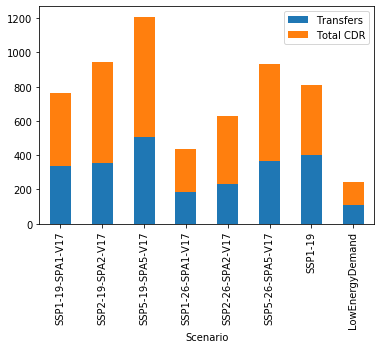

In [10]:
table_forplot = pd.DataFrame(table_models)
# table_forplot.drop(['percentage_tranfers'])

scen_order = ['SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17', 
              'SSP5-19-SPA5-V17', 'SSP1-26-SPA1-V17', 'SSP2-26-SPA2-V17', 'SSP5-26-SPA5-V17', 'SSP1-19', 'LowEnergyDemand']
table_forplot.drop(['2100_CUM_CDR', 'percentage_transfers'], axis=1, inplace=True)
table_forplot.columns = ['Scenario','Transfers','Model','Total CDR']
# ax = table_forplot.plot.bar(stacked = True, order = scen_order)
# table_forplot


ax = table_forplot.set_index("Scenario").loc[scen_order].plot.bar(stacked = True)
ax.xticks([0,1,2,3,4,5,6,7], ['RCP1.9, SSP1','RCP1.9, SSP2','RCP1.9, SSP5','RCP2.6, SSP1', 'RCP2.6, SSP2', 'RCP2.6, SSP5', 'RCP1.9, SSP1', 'LED'])

In [168]:
# Sum regions up to match REMIND regions

equity_reg_image = equity_image.copy()
equity_reg_message = equity_message.copy()


sumColums = ['Total_CO2', 'Total_GHG', 'BECCS', 'LANDCDR',
       'TOTAL_CDR', 'CO2_Emissions', 'CUM_CO2', 'CUM_CDR',
       'Population', 'GDP', 'cumPopulation',
       'GDP_cap', 'GDP_cap_avg', 'GDP_cap_CoI_nan', 'GDP_cap_CoI',
       'GDP_CoI_nan', 'GDP_CoI', 'GDP_CoI_frac', 'CDR_fair_share_by_GDP',
       'CUM_CDR_fair_share_by_GDP', 'Global_CUM_CO2_by_CUM_POP',
       'Fair_share_by_CUM_POP', 'Excess_emissions_by_CUM_POP',
       'Exc_em_fac_by_CUM_POP', 'CDR_fair_share_by_CUM_POP',
       'CUM_CDR_fair_share_by_CUM_POP', 'CDR_model_vs_fair_share_by_CUM_POP',
       'CDR_model_vs_fair_share_by_GDP',
       'CUM_CDR_model_vs_fair_share_by_CUM_POP',
       'CUM_CDR_model_vs_fair_share_by_GDP']
mask_reg = equity_reg_image.Region.isin(['EAF', 'RSAF', 'SAF', 'WAF'])
for sce in equity_reg_image.Scenario.unique():
    mask_sce = (equity_reg_image.Scenario == sce)
    for year in equity_reg_image.Year.unique():
        mask_year = (equity_reg_image.Year == year)
        filtered_df = equity_reg_image.loc[mask_sce & mask_reg & mask_year,:]
        result = equity_reg_image.loc[mask_sce & mask_reg & mask_year,sumColums].sum(axis=0)
        idx = len(equity_reg_image)+1
        equity_reg_image.loc[idx,:] = filtered_df.iloc[0]
        equity_reg_image.loc[idx,sumColums] = result
        equity_reg_image.loc[idx,'Region'] = 'AFR'
        
mask_reg = equity_reg_image.Region.isin(['NAF', 'ME'])
for sce in equity_reg_image.Scenario.unique():
    mask_sce = (equity_reg_image.Scenario == sce)
    for year in equity_reg_image.Year.unique():
        mask_year = (equity_reg_image.Year == year)
        filtered_df = equity_reg_image.loc[mask_sce & mask_reg & mask_year,:]
        result = equity_reg_image.loc[mask_sce & mask_reg & mask_year,sumColums].sum(axis=0)
        idx = len(equity_reg_image)+1
        equity_reg_image.loc[idx,:] = filtered_df.iloc[0]
        equity_reg_image.loc[idx,sumColums] = result
        equity_reg_image.loc[idx,'Region'] = 'MEA'

        
mask_reg = equity_reg_image.Region.isin(['RSAM', 'RCAM', 'MEX', 'BRA'])
for sce in equity_reg_image.Scenario.unique():
    mask_sce = (equity_reg_image.Scenario == sce)
    for year in equity_reg_image.Year.unique():
        mask_year = (equity_reg_image.Year == year)
        filtered_df = equity_reg_image.loc[mask_sce & mask_reg & mask_year,:]
        result = equity_reg_image.loc[mask_sce & mask_reg & mask_year,sumColums].sum(axis=0)
        idx = len(equity_reg_image)+1
        equity_reg_image.loc[idx,:] = filtered_df.iloc[0]
        equity_reg_image.loc[idx,sumColums] = result
        equity_reg_image.loc[idx,'Region'] = 'LAM'
        
mask_reg = equity_reg_image.Region.isin(['CEU', 'WEU'])
for sce in equity_reg_image.Scenario.unique():
    mask_sce = (equity_reg_image.Scenario == sce)
    for year in equity_reg_image.Year.unique():
        mask_year = (equity_reg_image.Year == year)
        filtered_df = equity_reg_image.loc[mask_sce & mask_reg & mask_year,:]
        result = equity_reg_image.loc[mask_sce & mask_reg & mask_year,sumColums].sum(axis=0)
        idx = len(equity_reg_image)+1
        equity_reg_image.loc[idx,:] = filtered_df.iloc[0]
        equity_reg_image.loc[idx,sumColums] = result
        equity_reg_image.loc[idx,'Region'] = 'EUR'


        
# Make Region-Column universal

#Image: INDIA -> IND
#       JAP -> JPN
#Message: R11_AFR -> AFR
#         EU -> EUR
#         R11_LAM -> LAM
#         R11_MEA -> MEA
#         R11_FSU -> RUS
       
equity_reg_image = equity_reg_image.replace('INDIA', 'IND')
equity_reg_image = equity_reg_image.replace('JAP', 'JPN')

equity_reg_message = equity_reg_message.replace('R11_AFR', 'AFR')
equity_reg_message = equity_reg_message.replace('EU', 'EUR')
equity_reg_message = equity_reg_message.replace('R11_LAM', 'LAM')
equity_reg_message = equity_reg_message.replace('R11_MEA', 'MEA')
equity_reg_message = equity_reg_message.replace('R11_FSU', 'RUS')
equity_reg_message = equity_reg_message.replace('R11_PAO', 'PAO')
equity_reg_message = equity_reg_message.replace('R11_PAS', 'PAS')

In [101]:
print(equity_remind.Region.unique())
print(equity_reg_message.Region.unique())
print(equity_reg_image.Region.unique())

['AFR' 'CHN' 'EUR' 'IND' 'JPN' 'LAM' 'MEA' 'OAS' 'ROW' 'RUS' 'USA' 'World']
['CHN' 'EUR' 'IND' 'AFR' 'RUS' 'LAM' 'MEA' 'PAO' 'PAS' 'USA' 'World']
['BRA' 'CAN' 'CEU' 'CHN' 'EAF' 'IND' 'INDO' 'JPN' 'KOR' 'ME' 'MEX' 'NAF'
 'OCE' 'RCAM' 'RSAF' 'RSAM' 'RSAS' 'RUS' 'SAF' 'SEAS' 'STAN' 'TUR' 'UKR'
 'USA' 'WAF' 'WEU' 'World' 'AFR' 'MEA' 'LAM' 'EUR']


In [171]:
# Master dataframe with all models 

allmodels_df = pd.concat([equity_image, equity_message, equity_remind], ignore_index=True, sort=False)


# Excel export
allmodels_df.to_excel(data_path + 'MASTERDF_equity_equal_regions.xls')
print(allmodels_df.Region.unique())


['CHN' 'IND' 'RUS' 'USA' 'World' 'AFR' 'MEA' 'LAM' 'EUR']


In [103]:
# Delete rows in dataframe that are not the same as remind model 
equity_equal_image = equity_reg_image.copy()
indexNames = equity_reg_image[(equity_reg_image['Region'] == 'CAN') + (equity_reg_image['Region'] == 'INDO') 
                              + (equity_reg_image['Region'] == 'JPN') + (equity_reg_image['Region'] == 'KOR') +
                             (equity_reg_image['Region'] == 'ME') + (equity_reg_image['Region'] == 'OCE') +
                             (equity_reg_image['Region'] == 'RSAS') + (equity_reg_image['Region'] == 'SEAS') +
                             (equity_reg_image['Region'] == 'STAN') + (equity_reg_image['Region'] == 'TUR') +
                             (equity_reg_image['Region'] == 'BRA') + (equity_reg_image['Region'] == 'UKR') +
                             (equity_reg_image['Region'] == 'CEU') + (equity_reg_image['Region'] == 'EAF') +
                             (equity_reg_image['Region'] == 'MEX') + (equity_reg_image['Region'] == 'NAF') +
                             (equity_reg_image['Region'] == 'RCAM')+ (equity_reg_image['Region'] == 'RSAF') +
                             (equity_reg_image['Region'] == 'RSAM')+ (equity_reg_image['Region'] == 'SAF') +
                             (equity_reg_image['Region'] == 'WAF') + (equity_reg_image['Region'] == 'WEU')].index
equity_equal_image.drop(indexNames, inplace=True)


equity_equal_message = equity_reg_message.copy()
indexNames = equity_reg_message[
                             (equity_reg_message['Region'] == 'R11_PAO') + (equity_reg_message['Region'] == 'R11_PAS')].index
#(equity_reg_message['Region'] == 'MEA') + 
equity_equal_message.drop(indexNames, inplace=True)



equity_equal_remind = equity_remind.copy()
indexNames = equity_remind[(equity_remind['Region'] == 'JPN') 
                              + (equity_remind['Region'] == 'OAS') + (equity_remind['Region'] == 'ROW')].index
#+ (equity_remind['Region'] == 'MEA') 
equity_equal_remind.drop(indexNames, inplace=True)


allmodels_equal_df = equity_equal_remind.append(equity_equal_image)
allmodels_equal_df = allmodels_equal_df.append(equity_equal_message)

print(allmodels_equal_df.Region.unique())

['AFR' 'CHN' 'EUR' 'IND' 'LAM' 'MEA' 'RUS' 'USA' 'World' 'PAO' 'PAS']


/Users/susannebaur/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [104]:
#AFRICA CUM_CDR in 2100 least-cost

CDR_MES_AFR = equity_equal_message.loc[(equity_equal_message.Region == 'AFR') & (equity_equal_message.Year == 2100)]
CDR_IMA_AFR = equity_equal_image.loc[(equity_equal_image.Region == 'AFR') & (equity_equal_image.Year == 2100)]
CDR_REM_AFR = equity_equal_remind.loc[(equity_equal_remind.Region == 'AFR') & (equity_equal_remind.Year == 2100)]


#MEA CUM_CDR in 2100 least-cost

CDR_MES_MEA = equity_equal_message.loc[(equity_equal_message.Region == 'MEA') & (equity_equal_message.Year == 2100)]
CDR_IMA_MEA = equity_equal_image.loc[(equity_equal_image.Region == 'MEA') & (equity_equal_image.Year == 2100)]
CDR_REM_MEA = equity_equal_remind.loc[(equity_equal_remind.Region == 'MEA') & (equity_equal_remind.Year == 2100)]


#IND CUM_CDR in 2100 least-cost

CDR_MES_IND = equity_equal_message.loc[(equity_equal_message.Region == 'IND') & (equity_equal_message.Year == 2100)]
CDR_IMA_IND = equity_equal_image.loc[(equity_equal_image.Region == 'IND') & (equity_equal_image.Year == 2100)]
CDR_REM_IND = equity_equal_remind.loc[(equity_equal_remind.Region == 'IND') & (equity_equal_remind.Year == 2100)]

In [63]:
allmodels_equal_df[allmodels_equal_df.Region == "World"]

,Unnamed: 0,MODEL,Region,Scenario,Year,Total_CO2,Total_GHG,BECCS,LANDCDR,TOTAL_CDR,CO2_Emissions,CUM_CO2,CUM_CDR,Unit_CO2,Population,GDP,Unit_Population,cumPopulation,2016_emissions,em_change,Unit_GDP,GDP_cap,GDP_cap_avg,GDP_cap_CoI_nan,GDP_cap_CoI,GDP_CoI_nan,GDP_CoI,GDP_CoI_frac,CDR_fair_share_by_GDP,CUM_CDR_fair_share_by_GDP,Global_CUM_CO2_by_CUM_POP,Fair_share_by_CUM_POP,Excess_emissions_by_CUM_POP,Exc_em_fac_by_CUM_POP,CDR_fair_share_by_CUM_POP,CUM_CDR_fair_share_by_CUM_POP,CDR_model_vs_fair_share_by_CUM_POP,CDR_model_vs_fair_share_by_GDP,CUM_CDR_model_vs_fair_share_by_CUM_POP,CUM_CDR_model_vs_fair_share_by_GDP
99,99.0,REMIND,World,SSP1-19-SPA1-V17,2020.0,34824.290800,49470.000000,0.059800,690.625100,690.684900,50160.684900,1.348305e+06,690.684900,Mt/yr,7543.000000,1.012000e+08,Mio,198352.005500,50164.4966,0.999924,USD Million,13416.412568,13416.412568,NaN,0.0,NaN,0.0,0.0,NaN,NaN,6.797535,1.348305e+06,0.000000e+00,NaN,0.0,0.0,-690.684900,NaN,-690.684900,NaN
100,100.0,REMIND,World,SSP1-19-SPA1-V17,2030.0,26309.971900,37090.000000,424.200000,342.887100,767.087100,37857.087100,1.788394e+06,7979.544900,Mt/yr,8024.000000,1.494000e+08,Mio,276187.005500,50164.4966,0.754659,USD Million,18619.142572,18619.142572,NaN,0.0,NaN,0.0,0.0,NaN,0.0,6.475300,1.788394e+06,0.000000e+00,NaN,0.0,0.0,-767.087100,NaN,-7979.544900,-7979.544900
101,101.0,REMIND,World,SSP1-19-SPA1-V17,2040.0,16410.090000,25340.000000,3788.000000,184.076700,3972.076700,29312.076700,2.124239e+06,31675.363900,Mt/yr,8345.000000,2.143000e+08,Mio,358032.005500,50164.4966,0.584319,USD Million,25680.047933,25680.047933,NaN,0.0,NaN,0.0,0.0,NaN,0.0,5.933099,2.124239e+06,0.000000e+00,NaN,0.0,0.0,-3972.076700,NaN,-31675.363900,-31675.363900
102,102.0,REMIND,World,SSP1-19-SPA1-V17,2050.0,3760.554100,11810.000000,9330.000000,508.009300,9838.009300,21648.009300,2.379040e+06,100725.793900,Mt/yr,8481.000000,2.824000e+08,Mio,442162.005500,50164.4966,0.431540,USD Million,33297.960146,33297.960146,NaN,0.0,NaN,0.0,0.0,NaN,0.0,5.380471,2.379040e+06,0.000000e+00,NaN,0.0,0.0,-9838.009300,NaN,-100725.793900,-100725.793900
103,103.0,REMIND,World,SSP1-19-SPA1-V17,2060.0,-6315.025300,854.900000,10940.000000,1068.173500,12008.173500,12863.073500,2.551595e+06,209956.707900,Mt/yr,8436.000000,3.468000e+08,Mio,526747.005500,50164.4966,0.256418,USD Million,41109.530583,41109.530583,NaN,0.0,NaN,0.0,0.0,NaN,0.0,4.844062,2.551595e+06,0.000000e+00,NaN,0.0,0.0,-12008.173500,NaN,-209956.707900,-209956.707900
104,104.0,REMIND,World,SSP1-19-SPA1-V17,2070.0,-9558.275700,-3084.000000,11310.000000,1552.382400,12862.382400,9778.382400,2.664803e+06,334309.487400,Mt/yr,8238.000000,4.104000e+08,Mio,610117.005500,50164.4966,0.194926,USD Million,49817.916970,49817.916970,NaN,0.0,NaN,0.0,0.0,NaN,0.0,4.367691,2.664803e+06,-4.656613e-10,NaN,0.0,0.0,-12862.382400,NaN,-334309.487400,-334309.487400
105,105.0,REMIND,World,SSP1-19-SPA1-V17,2080.0,-11390.177900,-5499.000000,11630.000000,2242.950500,13872.950500,8373.950500,2.755564e+06,467986.151900,Mt/yr,7903.000000,4.687000e+08,Mio,690822.005500,50164.4966,0.166930,USD Million,59306.592433,59306.592433,NaN,0.0,NaN,0.0,0.0,NaN,0.0,3.988819,2.755564e+06,0.000000e+00,NaN,0.0,0.0,-13872.950500,NaN,-467986.151900,-467986.151900
106,106.0,REMIND,World,SSP1-19-SPA1-V17,2090.0,-12769.876800,-7517.000000,12030.000000,2892.972400,14922.972400,7405.972400,2.834464e+06,611965.766400,Mt/yr,7445.000000,5.198000e+08,Mio,767562.005500,50164.4966,0.147634,USD Million,69818.670248,69818.670248,NaN,0.0,NaN,0.0,0.0,NaN,0.0,3.692814,2.834464e+06,0.000000e+00,NaN,0.0,0.0,-14922.972400,NaN,-611965.766400,-611965.766400
107,107.0,REMIND,World,SSP1-19-SPA1-V17,2100.0,-13370.291300,-8779.000000,12130.000000,3278.209900,15408.209900,6629.209900,2.904640e+06,763621.677900,Mt/yr,6892.000000,5.619000e+08,Mio,839247.005500,50164.4966,0.132149,USD Million,81529.309344,81529.309344,NaN,0.0,NaN,0.0,0.0,NaN,0.0,3.461007,2.904640e+06,0.000000e+00,NaN,0.0,0.0,-15408.209900,NaN,-763621.677900,-763621.677900
20

In [2]:
# IMPORT REGION EQUAL DATAFRAMES

equity_remind=pd.read_excel(data_path+'REMIND_equity_equalreg_use.xls')
equity_image=pd.read_excel(data_path+'IMAGE_equity_equalreg_use.xls')
equity_message=pd.read_excel(data_path+'MESSAGE_equity_equalreg_use.xls')
allmodels_df=pd.read_excel(data_path+'MASTERDF_equity_equalreg_use.xls')

print(allmodels_df.Region.unique())



['CHN' 'IND' 'RUS' 'USA' 'World' 'AFR' 'MEA' 'LAM' 'EUR']


In [3]:
scen_allmodels = ['SSP1-19-SPA0-V17', 
 'SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17',
 'SSP1-26-SPA1-V17', 'SSP2-26-SPA2-V17', 'SSP5-19-SPA5-V17',
 'SSP5-26-SPA5-V17', 'LowEnergyDemand', 'SSP1-19', 'SSP2-19', 'SSP1-26', 'SSP2-26']

scen_15_lo = ['SSP1-19-SPA0-V17', 'LowEnergyDemand', 'SSP1-19', 'SSP2-19'] #only no / limited overshoot

scen_15_ho = ['SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17', 'SSP5-19-SPA5-V17'] # high overshoot

scen_2 = ['SSP2-26-SPA2-V17','SSP1-26-SPA1-V17', 'SSP5-26-SPA5-V17', 'SSP1-26', 'SSP2-26']

scen_15 = ['SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17', 'SSP5-19-SPA5-V17', 'SSP1-19-SPA0-V17', 'LowEnergyDemand', 'SSP1-19', 'SSP2-19']



In [29]:
reg_of_int = ['USA', 'EUR', 'RUS', 'CHN', 'LAM','WLD']
years_of_int = [2030, 2100]


allmodels_regions = allmodels_df.loc[(allmodels_df.Region.isin(reg_of_int)) & (allmodels_df.Year.isin(years_of_int))
                                    & (allmodels_df.Scenario.isin(scen_allmodels))]
allmodels_regions_15 = allmodels_df.loc[(allmodels_df.Region.isin(reg_of_int)) & (allmodels_df.Year.isin(years_of_int))
                                       & (allmodels_df.Scenario.isin(scen_15))]
allmodels_regions_2 = allmodels_df.loc[(allmodels_df.Region.isin(reg_of_int)) & (allmodels_df.Year.isin(years_of_int))
                                       & (allmodels_df.Scenario.isin(scen_2))]
allmodels_regions_15_lo = allmodels_df.loc[(allmodels_df.Region.isin(reg_of_int)) & (allmodels_df.Year.isin(years_of_int))
                                       & (allmodels_df.Scenario.isin(scen_15_lo))]
allmodels_regions_15_ho = allmodels_df.loc[(allmodels_df.Region.isin(reg_of_int)) & (allmodels_df.Year.isin(years_of_int))
                                       & (allmodels_df.Scenario.isin(scen_15_ho))]

allmodels_USA = allmodels_regions.loc[(allmodels_regions.Region == 'USA')]
allmodels_EUR = allmodels_regions.loc[(allmodels_regions.Region == 'EUR')]
allmodels_RUS = allmodels_regions.loc[(allmodels_regions.Region == 'RUS')]
allmodels_CHN = allmodels_regions.loc[(allmodels_regions.Region == 'CHN')]
allmodels_LAM = allmodels_regions.loc[(allmodels_regions.Region == 'LAM')]
allmodels_WLD = allmodels_regions.loc[(allmodels_regions.Region == 'World')]

allmodels_USA_2 = allmodels_df.loc[(allmodels_df.Region == 'USA') & (allmodels_df.Year.isin(years_of_int)) 
                                 & (allmodels_df.Scenario.isin(scen_2))]
allmodels_EUR_2 = allmodels_df.loc[(allmodels_df.Region == 'EUR') & (allmodels_df.Year.isin(years_of_int))
                                & (allmodels_df.Scenario.isin(scen_2))]
allmodels_RUS_2 = allmodels_df.loc[(allmodels_df.Region == 'RUS') & (allmodels_df.Year.isin(years_of_int))
                                & (allmodels_df.Scenario.isin(scen_2))]
allmodels_CHN_2 = allmodels_df.loc[(allmodels_df.Region == 'CHN') & (allmodels_df.Year.isin(years_of_int))
                                & (allmodels_df.Scenario.isin(scen_2))]
allmodels_LAM_2 = allmodels_df.loc[(allmodels_df.Region == 'LAM') & (allmodels_df.Year.isin(years_of_int))
                                & (allmodels_df.Scenario.isin(scen_2))]
allmodels_WLD_2 = allmodels_df.loc[(allmodels_df.Region == 'World') & (allmodels_df.Year.isin(years_of_int))
                                & (allmodels_df.Scenario.isin(scen_2))]

allmodels_USA_15 = allmodels_df.loc[(allmodels_df.Region == 'USA') & (allmodels_df.Year.isin(years_of_int)) 
                                 & (allmodels_df.Scenario.isin(scen_15))]
allmodels_EUR_15 = allmodels_df.loc[(allmodels_df.Region == 'EUR') & (allmodels_df.Year.isin(years_of_int))
                                & (allmodels_df.Scenario.isin(scen_15))]
allmodels_RUS_15 = allmodels_df.loc[(allmodels_df.Region == 'RUS') & (allmodels_df.Year.isin(years_of_int))
                                & (allmodels_df.Scenario.isin(scen_15))]
allmodels_CHN_15 = allmodels_df.loc[(allmodels_df.Region == 'CHN') & (allmodels_df.Year.isin(years_of_int))
                                & (allmodels_df.Scenario.isin(scen_15))]
allmodels_LAM_15 = allmodels_df.loc[(allmodels_df.Region == 'LAM') & (allmodels_df.Year.isin(years_of_int))
                                & (allmodels_df.Scenario.isin(scen_15))]
allmodels_WLD_15 = allmodels_df.loc[(allmodels_df.Region == 'World') & (allmodels_df.Year.isin(years_of_int))
                                & (allmodels_df.Scenario.isin(scen_15))]


allmodels_USA_15_lo = allmodels_df.loc[(allmodels_df.Region == 'USA') & (allmodels_df.Year.isin(years_of_int)) 
                                 & (allmodels_df.Scenario.isin(scen_15_lo))]
allmodels_EUR_15_lo = allmodels_df.loc[(allmodels_df.Region == 'EUR') & (allmodels_df.Year.isin(years_of_int))
                                & (allmodels_df.Scenario.isin(scen_15_lo))]
allmodels_RUS_15_lo = allmodels_df.loc[(allmodels_df.Region == 'RUS') & (allmodels_df.Year.isin(years_of_int))
                                & (allmodels_df.Scenario.isin(scen_15_lo))]
allmodels_CHN_15_lo = allmodels_df.loc[(allmodels_df.Region == 'CHN') & (allmodels_df.Year.isin(years_of_int))
                                & (allmodels_df.Scenario.isin(scen_15_lo))]
allmodels_LAM_15_lo = allmodels_df.loc[(allmodels_df.Region == 'LAM') & (allmodels_df.Year.isin(years_of_int))
                                & (allmodels_df.Scenario.isin(scen_15_lo))]
allmodels_WLD_15_lo = allmodels_df.loc[(allmodels_df.Region == 'World') & (allmodels_df.Year.isin(years_of_int))
                                & (allmodels_df.Scenario.isin(scen_15_lo))]

allmodels_USA_15_ho = allmodels_df.loc[(allmodels_df.Region == 'USA') & (allmodels_df.Year.isin(years_of_int)) 
                                 & (allmodels_df.Scenario.isin(scen_15_ho))]
allmodels_EUR_15_ho = allmodels_df.loc[(allmodels_df.Region == 'EUR') & (allmodels_df.Year.isin(years_of_int))
                                & (allmodels_df.Scenario.isin(scen_15_ho))]
allmodels_RUS_15_ho = allmodels_df.loc[(allmodels_df.Region == 'RUS') & (allmodels_df.Year.isin(years_of_int))
                                & (allmodels_df.Scenario.isin(scen_15_ho))]
allmodels_CHN_15_ho = allmodels_df.loc[(allmodels_df.Region == 'CHN') & (allmodels_df.Year.isin(years_of_int))
                                & (allmodels_df.Scenario.isin(scen_15_ho))]
allmodels_LAM_15_ho = allmodels_df.loc[(allmodels_df.Region == 'LAM') & (allmodels_df.Year.isin(years_of_int))
                                & (allmodels_df.Scenario.isin(scen_15_ho))]
allmodels_WLD_15_ho = allmodels_df.loc[(allmodels_df.Region == 'World') & (allmodels_df.Year.isin(years_of_int))
                                & (allmodels_df.Scenario.isin(scen_15_ho))]

In [58]:
NDC = pd.read_excel(table_path + 'NDC_values.xlsx')
print(NDC)

NDC_EUR = NDC.loc[(NDC.Region=='EUR')]
NDC_RUS = NDC.loc[(NDC.Region=='RUS')]
NDC_CHN = NDC.loc[(NDC.Region=='CHN')]
NDC_USA = NDC.loc[(NDC.Region=='USA')]


  Region  Y_CPCE_min  Y_CPCE_max  Y_AP_min  Y_AP_max   X_min   X_max
0    EUR     104.750     105.450   163.910   165.842   3.390   3.418
1    CHN     224.136     251.686   582.200   654.700  13.744  15.194
2    RUS     182.550     190.350    53.239    57.763   2.491   2.647
3    USA     423.828     436.778   247.778   256.353   6.322   6.497


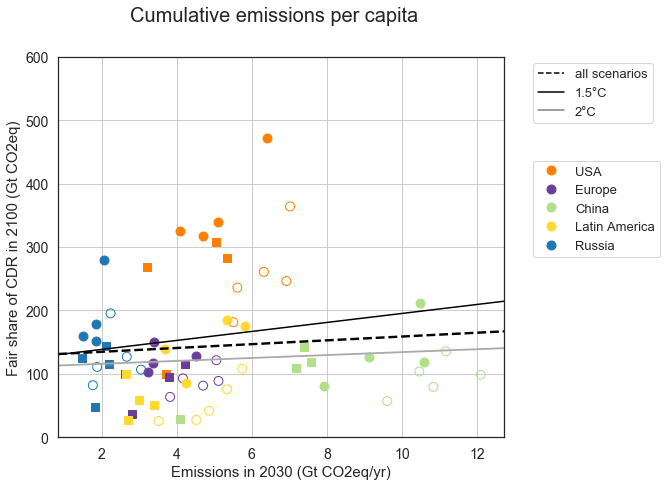

In [68]:
# Plot with all models POP




# x_variable = 'em_change'
x_variable = 'CO2_Emissions' # using CO2_Emissions means total GHG minus CDR
y_variable = 'CUM_CDR_fair_share_by_CUM_POP'
#y_variable = 'CUM_CDR_fair_share_by_GDP'
# y_variable = 'CUM_CDR'




x_df = allmodels_regions.loc[allmodels_regions.Year == 2030]
y_df = allmodels_regions.loc[allmodels_regions.Year == 2100]
x_var = x_df[x_variable]/1000
y_var = y_df[y_variable]/1000

x_df_2 = allmodels_regions_2.loc[allmodels_regions_2.Year == 2030]
y_df_2 = allmodels_regions_2.loc[allmodels_regions_2.Year == 2100]
x_var_2 = x_df_2[x_variable]/1000
y_var_2 = y_df_2[y_variable]/1000

x_df_15 = allmodels_regions_15.loc[allmodels_regions_15.Year == 2030]
y_df_15 = allmodels_regions_15.loc[allmodels_regions_15.Year == 2100]
x_var_15 = x_df_15[x_variable]/1000
y_var_15 = y_df_15[y_variable]/1000

x_df_15_lo = allmodels_regions_15_lo.loc[allmodels_regions_15_lo.Year == 2030]
y_df_15_lo = allmodels_regions_15_lo.loc[allmodels_regions_15_lo.Year == 2100]
x_var_15_lo = x_df_15_lo[x_variable]/1000
y_var_15_lo = y_df_15_lo[y_variable]/1000

x_df_15_ho = allmodels_regions_15_ho.loc[allmodels_regions_15_ho.Year == 2030]
y_df_15_ho = allmodels_regions_15_ho.loc[allmodels_regions_15_ho.Year == 2100]
x_var_15_ho = x_df_15_ho[x_variable]/1000
y_var_15_ho = y_df_15_ho[y_variable]/1000



region_USA=['USA']
USA_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_USA)) & (allmodels_df.Year==2030)].copy()
USA_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_USA)) & (allmodels_df.Year==2100)].copy()
USA_mix = USA_2030.append(USA_2100)

region_EUR=['EUR']
EUR_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_EUR)) & (allmodels_df.Year==2030)].copy()
EUR_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_EUR)) & (allmodels_df.Year==2100)].copy()
EUR_mix = EUR_2030.append(EUR_2100)

region_AFR=['AFR']
AFR_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_AFR)) & (allmodels_df.Year==2030)].copy()
AFR_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_AFR)) & (allmodels_df.Year==2100)].copy()
AFR_mix = AFR_2030.append(AFR_2100)

region_CHN=['CHN']
CHN_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_CHN)) & (allmodels_df.Year==2030)].copy()
CHN_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_CHN)) & (allmodels_df.Year==2100)].copy()
CHN_mix = CHN_2030.append(CHN_2100)

region_IND=['IND']
IND_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_IND)) & (allmodels_df.Year==2030)].copy()
IND_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_IND)) & (allmodels_df.Year==2100)].copy()
IND_mix = IND_2030.append(IND_2100)

region_LAM=['LAM']
LAM_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_LAM)) & (allmodels_df.Year==2030)].copy()
LAM_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_LAM)) & (allmodels_df.Year==2100)].copy()
LAM_mix = LAM_2030.append(LAM_2100)

region_RUS=['RUS']
RUS_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_RUS)) & (allmodels_df.Year==2030)].copy()
RUS_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_RUS)) & (allmodels_df.Year==2100)].copy()
RUS_mix = RUS_2030.append(RUS_2100)

region_WLD=['World']
WLD_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_WLD)) & (allmodels_df.Year==2030)].copy()
WLD_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_WLD)) & (allmodels_df.Year==2100)].copy()
WLD_mix = WLD_2030.append(WLD_2100)


sns.set_style("white")


plt.figure(figsize=(8,7))

plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

regions_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR']
#CHN 3 IND 0, RUS 1, USA 2, AFR 4, LAM 5, EUR 6

colours = sns.color_palette("Paired",12)
col_lam = sns.color_palette("Set2", 6)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],colours[0], colours[9]]

for sce in scen_15_lo:
    x_USA = USA_mix.loc[(USA_mix.Year==2030) & (USA_mix.Scenario == sce)]
    x_USA = x_USA[x_variable]/1000
    y_USA = USA_mix.loc[(USA_mix.Year==2100) & (USA_mix.Scenario == sce)]
    y_USA = y_USA[y_variable]/1000
    plt.scatter(x_USA, y_USA, color = colours[7], marker = 's', label = 'USA', s = 80)

for sce in scen_15_ho:
    x_USA = USA_mix.loc[(USA_mix.Year==2030) & (USA_mix.Scenario == sce)]
    x_USA = x_USA[x_variable]/1000
    y_USA = USA_mix.loc[(USA_mix.Year==2100) & (USA_mix.Scenario == sce)]
    y_USA = y_USA[y_variable]/1000
    plt.scatter(x_USA, y_USA, color = colours[7], marker = 'o', label = 'USA', s = 80)
    
for sce in scen_2:
    x_USA = USA_mix.loc[(USA_mix.Year==2030) & (USA_mix.Scenario == sce)]
    x_USA = x_USA[x_variable]/1000
    y_USA = USA_mix.loc[(USA_mix.Year==2100) & (USA_mix.Scenario == sce)]
    y_USA = y_USA[y_variable]/1000
    plt.scatter(x_USA, y_USA, color = colours[7], marker = 'o', facecolors='none', s = 80)

for sce in scen_15_lo:
    x_EUR = EUR_mix.loc[(EUR_mix.Year==2030) & (EUR_mix.Scenario == sce)]
    x_EUR = x_EUR[x_variable]/1000
    y_EUR = EUR_mix.loc[(EUR_mix.Year==2100) & (EUR_mix.Scenario == sce)]
    y_EUR = y_EUR[y_variable]/1000
    plt.scatter(x_EUR, y_EUR, color = colours[9], marker = 's',  label = 'EUR', s = 80)
    
for sce in scen_15_ho:
    x_EUR = EUR_mix.loc[(EUR_mix.Year==2030) & (EUR_mix.Scenario == sce)]
    x_EUR = x_EUR[x_variable]/1000
    y_EUR = EUR_mix.loc[(EUR_mix.Year==2100) & (EUR_mix.Scenario == sce)]
    y_EUR = y_EUR[y_variable]/1000
    plt.scatter(x_EUR, y_EUR, color = colours[9], marker = 'o',  label = 'EUR', s = 80)

for sce in scen_2:
    x_EUR = EUR_mix.loc[(EUR_mix.Year==2030) & (EUR_mix.Scenario == sce)]
    x_EUR = x_EUR[x_variable]/1000
    y_EUR = EUR_mix.loc[(EUR_mix.Year==2100) & (EUR_mix.Scenario == sce)]
    y_EUR = y_EUR[y_variable]/1000
    plt.scatter(x_EUR, y_EUR, color = colours[9], marker = 'o', facecolors='none', s = 80)
    
for sce in scen_15_lo:
    x_CHN = CHN_mix.loc[(CHN_mix.Year==2030) & (CHN_mix.Scenario == sce)]
    x_CHN = x_CHN[x_variable]/1000
    y_CHN = CHN_mix.loc[(CHN_mix.Year==2100) & (CHN_mix.Scenario == sce)]
    y_CHN = y_CHN[y_variable]/1000
    plt.scatter(x_CHN, y_CHN, color = colours[2], marker = 's', label = 'CHN', s = 80)
    
for sce in scen_15_ho:
    x_CHN = CHN_mix.loc[(CHN_mix.Year==2030) & (CHN_mix.Scenario == sce)]
    x_CHN = x_CHN[x_variable]/1000
    y_CHN = CHN_mix.loc[(CHN_mix.Year==2100) & (CHN_mix.Scenario == sce)]
    y_CHN = y_CHN[y_variable]/1000
    plt.scatter(x_CHN, y_CHN, color = colours[2], marker = 'o', label = 'CHN', s = 80)
    
for sce in scen_2:
    x_CHN = CHN_mix.loc[(CHN_mix.Year==2030) & (CHN_mix.Scenario == sce)]
    x_CHN = x_CHN[x_variable]/1000
    y_CHN = CHN_mix.loc[(CHN_mix.Year==2100) & (CHN_mix.Scenario == sce)]
    y_CHN = y_CHN[y_variable]/1000
    plt.scatter(x_CHN, y_CHN, color = colours[2], marker = 'o', facecolors='none', s = 80)
    
for sce in scen_15_lo:
    x_LAM = LAM_mix.loc[(LAM_mix.Year==2030) & (LAM_mix.Scenario == sce)]
    x_LAM = x_LAM[x_variable]/1000
    y_LAM = LAM_mix.loc[(LAM_mix.Year==2100) & (LAM_mix.Scenario == sce)]
    y_LAM = y_LAM[y_variable]/1000
    plt.scatter(x_LAM, y_LAM, color = col_lam[5], marker = 's', label = 'LAM', s = 80)
    
for sce in scen_15_ho:
    x_LAM = LAM_mix.loc[(LAM_mix.Year==2030) & (LAM_mix.Scenario == sce)]
    x_LAM = x_LAM[x_variable]/1000
    y_LAM = LAM_mix.loc[(LAM_mix.Year==2100) & (LAM_mix.Scenario == sce)]
    y_LAM = y_LAM[y_variable]/1000
    plt.scatter(x_LAM, y_LAM, color = col_lam[5], marker = 'o', label = 'LAM', s = 80)
    
for sce in scen_2:
    x_LAM = LAM_mix.loc[(LAM_mix.Year==2030) & (LAM_mix.Scenario == sce)]
    x_LAM = x_LAM[x_variable]/1000
    y_LAM = LAM_mix.loc[(LAM_mix.Year==2100) & (LAM_mix.Scenario == sce)]
    y_LAM = y_LAM[y_variable]/1000
    plt.scatter(x_LAM, y_LAM, color = col_lam[5], marker = 'o', facecolors='none', s = 80)  
    
for sce in scen_15_lo:
    x_RUS = RUS_mix.loc[(RUS_mix.Year==2030) & (RUS_mix.Scenario == sce)]
    x_RUS = x_RUS[x_variable]/1000
    y_RUS = RUS_mix.loc[(RUS_mix.Year==2100) & (RUS_mix.Scenario == sce)]
    y_RUS = y_RUS[y_variable]/1000
    plt.scatter(x_RUS, y_RUS, color = colours[1], marker = 's', label = 'RUS', s = 80)
    
for sce in scen_15_ho:
    x_RUS = RUS_mix.loc[(RUS_mix.Year==2030) & (RUS_mix.Scenario == sce)]
    x_RUS = x_RUS[x_variable]/1000
    y_RUS = RUS_mix.loc[(RUS_mix.Year==2100) & (RUS_mix.Scenario == sce)]
    y_RUS = y_RUS[y_variable]/1000
    plt.scatter(x_RUS, y_RUS, color = colours[1], marker = 'o', label = 'RUS', s = 80)

for sce in scen_2:
    x_RUS = RUS_mix.loc[(RUS_mix.Year==2030) & (RUS_mix.Scenario == sce)]
    x_RUS = x_RUS[x_variable]/1000
    y_RUS = RUS_mix.loc[(RUS_mix.Year==2100) & (RUS_mix.Scenario == sce)]
    y_RUS = y_RUS[y_variable]/1000
    plt.scatter(x_RUS, y_RUS, color = colours[1], marker = 'o', facecolors='none', s = 80) 

z = np.polyfit(x_var, y_var, 1)
p = np.poly1d(z)
#plt.plot(x_var, p(x_var), 'white')

#plt.text(7, 185.5, "y = %.6fx + %.6f"%(z[0],z[1]), fontsize = 12)    # equation of trend line


#adding linear regression 

xy = sns.regplot(x = x_var, y = y_var, ci = 0, color = 'black', scatter = False, line_kws={"lw": 2.4})
xy = sns.regplot(x = x_var_2, y = y_var_2, ci = 0, color = 'darkgrey', scatter = False, line_kws={"lw": 1.8})
#xy = sns.regplot(x = x_var_15_lo, y = y_var_15_lo, ci = 0, color = 'black', scatter = False, line_kws={"lw": 1.5})
#xy = sns.regplot(x = x_var_15_ho, y = y_var_15_ho, ci = 0, color = 'lightgrey', scatter = False, line_kws={"lw": 1.8})
xy = sns.regplot(x = x_var_15, y = y_var_15, ci = 0, color = 'black', scatter = False, line_kws={"lw": 1.5})

xy.lines[0].set_linestyle("--")

plt.suptitle('Cumulative emissions per capita', fontsize = 20)

###legend
l = plt.legend(handles=[Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[7], label = 'USA'),
            Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[9], label = 'Europe'),
             Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[2], label = 'China'),
              Line2D([0], [0], linestyle = 'none', marker = 'o', color=col_lam[5], label = 'Latin America'),
               Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[1], label = 'Russia')],
           bbox_to_anchor=(1.05, 0.6), loc = 'center left', markerscale = 1.5, fontsize = 13)


l2 = plt.legend(handles=[Line2D([0], [0], color="black", linestyle = 'dashed',label = 'all scenarios'),
                         Line2D([0], [0], color="black", label = '1.5°C'),
                        # Line2D([0], [0], color="lightgrey", label = '1.5°C high OS'),
                         Line2D([0], [0], color="grey", label = '2°C')],
                bbox_to_anchor=(1.05, 1), loc = 'upper left', markerscale = 1.5, fontsize = 13)    
plt.gca().add_artist(l)
###


plt.grid(True)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#leg = plt.legend(['IMAGE SSP1 1.5°C','IMAGE SSP2 LF','REMIND SSP1 1.5°C','REMIND SSP2 1.5°C', 'REMIND SSP1 2.0°C', 'REMIND SSP2 2.0°C', 'REMIND SSP5 1.5°C', 'REMIND SSP5 2.0°C'], bbox_to_anchor=(1.17,0.33), ncol=2, loc= 'upper left')
#plt.gca().legend(USA_mix['Scenario'], bbox_to_anchor=(1.17,0.33), ncol=2, loc= 'upper left')

plt.xlabel('Emissions in 2030 (Gt CO2eq/yr)', fontsize = 15)
plt.ylabel('Fair share of CDR in 2100 (Gt CO2eq)', fontsize = 15)
plt.ylim(0,600)
#plt.tight_layout()

plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Supp - Figure 1 - CPCE_leg_15.png',bbox_inches= 'tight')
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Supp - Figure 1 - CPCE_leg_15.svg',bbox_inches= 'tight', dpi = 300, transparent = True)

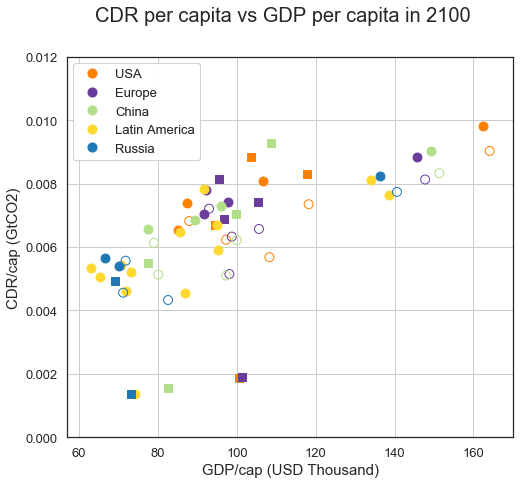

In [77]:

# Scatterplot GDP per cap & CDR per cap


sns.set_style("white")


plt.figure(figsize=(8,7))

plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

regions_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR']
colours = sns.color_palette("Paired",12)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],col_lam[5], colours[9]]
col_lam = sns.color_palette("Set2", 6)


    
ye = 2100

for sce in scen_15_lo:
    x_USA = allmodels_df.loc[(allmodels_df.Region == 'USA') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'GDP_cap']
    y_USA = allmodels_df.loc[(allmodels_df.Region == 'USA') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'CDR_per_cap_GDP']
    plt.scatter(x_USA, y_USA/1000, color = colours[7], marker = 's', label = 'USA', s = 80)

for sce in scen_15_ho:
    x_USA = allmodels_df.loc[(allmodels_df.Region == 'USA') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'GDP_cap']
    y_USA = allmodels_df.loc[(allmodels_df.Region == 'USA') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'CDR_per_cap_GDP']
    plt.scatter(x_USA, y_USA/1000, color = colours[7], marker = 'o', label = 'USA', s = 80)
    
for sce in scen_2:
    x_USA = allmodels_df.loc[(allmodels_df.Region == 'USA') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'GDP_cap']
    y_USA = allmodels_df.loc[(allmodels_df.Region == 'USA') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'CDR_per_cap_GDP']
    plt.scatter(x_USA, y_USA/1000, color = colours[7], marker = 'o', facecolors='none', s = 80)

for sce in scen_15_lo:
    x_EUR = allmodels_df.loc[(allmodels_df.Region == 'EUR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'GDP_cap']
    y_EUR = allmodels_df.loc[(allmodels_df.Region == 'EUR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'CDR_per_cap_GDP']
    plt.scatter(x_EUR, y_EUR/1000, color = colours[9], marker = 's',  label = 'EUR', s = 80)
    
for sce in scen_15_ho:
    x_EUR = allmodels_df.loc[(allmodels_df.Region == 'EUR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'GDP_cap']
    y_EUR = allmodels_df.loc[(allmodels_df.Region == 'EUR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'CDR_per_cap_GDP']
    plt.scatter(x_EUR, y_EUR/1000, color = colours[9], marker = 'o',  label = 'EUR', s = 80)

for sce in scen_2:
    x_EUR = allmodels_df.loc[(allmodels_df.Region == 'EUR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'GDP_cap']
    y_EUR = allmodels_df.loc[(allmodels_df.Region == 'EUR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'CDR_per_cap_GDP']
    plt.scatter(x_EUR, y_EUR/1000, color = colours[9], marker = 'o', facecolors='none', s = 80)
    
for sce in scen_15_lo:
    x_CHN = allmodels_df.loc[(allmodels_df.Region == 'CHN') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'GDP_cap']
    y_CHN = allmodels_df.loc[(allmodels_df.Region == 'CHN') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'CDR_per_cap_GDP']
    plt.scatter(x_CHN, y_CHN/1000, color = colours[2], marker = 's', label = 'CHN', s = 80)
    
for sce in scen_15_ho:
    x_CHN = allmodels_df.loc[(allmodels_df.Region == 'CHN') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'GDP_cap']
    y_CHN = allmodels_df.loc[(allmodels_df.Region == 'CHN') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'CDR_per_cap_GDP']
    plt.scatter(x_CHN, y_CHN/1000, color = colours[2], marker = 'o', label = 'CHN', s = 80)
    
for sce in scen_2:
    x_CHN = allmodels_df.loc[(allmodels_df.Region == 'CHN') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'GDP_cap']
    y_CHN = allmodels_df.loc[(allmodels_df.Region == 'CHN') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'CDR_per_cap_GDP']
    plt.scatter(x_CHN, y_CHN/1000, color = colours[2], marker = 'o', facecolors='none', s = 80)
    
for sce in scen_15_lo:
    x_LAM = allmodels_df.loc[(allmodels_df.Region == 'LAM') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'GDP_cap']
    y_LAM = allmodels_df.loc[(allmodels_df.Region == 'LAM') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'CDR_per_cap_GDP']
    plt.scatter(x_LAM, y_LAM/1000, color = col_lam[5], marker = 'o', label = 'LAM', s = 80)
    
for sce in scen_15_ho:
    x_LAM = allmodels_df.loc[(allmodels_df.Region == 'LAM') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'GDP_cap']
    y_LAM = allmodels_df.loc[(allmodels_df.Region == 'LAM') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'CDR_per_cap_GDP']
    plt.scatter(x_LAM, y_LAM/1000, color = col_lam[5], marker = 'o', label = 'LAM', s = 80)
    
for sce in scen_2:
    x_LAM = allmodels_df.loc[(allmodels_df.Region == 'LAM') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'GDP_cap']
    y_LAM = allmodels_df.loc[(allmodels_df.Region == 'LAM') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'CDR_per_cap_GDP']
    plt.scatter(x_LAM, y_LAM/1000, color = col_lam[5], marker = 'o', label = 'LAM', s = 80)
    
for sce in scen_15_lo:
    x_RUS = allmodels_df.loc[(allmodels_df.Region == 'RUS') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'GDP_cap']
    y_RUS = allmodels_df.loc[(allmodels_df.Region == 'RUS') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'CDR_per_cap_GDP']
    plt.scatter(x_RUS, y_RUS/1000, color = colours[1], marker = 's', label = 'RUS', s = 80)
    
for sce in scen_15_ho:
    x_RUS = allmodels_df.loc[(allmodels_df.Region == 'RUS') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'GDP_cap']
    y_RUS = allmodels_df.loc[(allmodels_df.Region == 'RUS') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'CDR_per_cap_GDP']
    plt.scatter(x_RUS, y_RUS/1000, color = colours[1], marker = 'o', label = 'RUS', s = 80)

for sce in scen_2:
    x_RUS = allmodels_df.loc[(allmodels_df.Region == 'RUS') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'GDP_cap']
    y_RUS = allmodels_df.loc[(allmodels_df.Region == 'RUS') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'CDR_per_cap_GDP']
    plt.scatter(x_RUS, y_RUS/1000, color = colours[1], marker = 'o', facecolors='none', s = 80) 

for sce in scen_15_lo:
    x_IND = allmodels_df.loc[(allmodels_df.Region == 'IND') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'GDP_cap']
    y_IND = allmodels_df.loc[(allmodels_df.Region == 'IND') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'CDR_per_cap_GDP']
    plt.scatter(x_IND, y_IND/1000, color = colours[10], marker = 's', label = 'IND', s = 80)
    
for sce in scen_15_ho:
    x_IND = allmodels_df.loc[(allmodels_df.Region == 'IND') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'GDP_cap']
    y_IND = allmodels_df.loc[(allmodels_df.Region == 'IND') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'CDR_per_cap_GDP']
    plt.scatter(x_IND, y_IND/1000, color = colours[10], marker = 'o', label = 'IND', s = 80)

for sce in scen_2:
    x_IND = allmodels_df.loc[(allmodels_df.Region == 'IND') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'GDP_cap']
    y_IND = allmodels_df.loc[(allmodels_df.Region == 'IND') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'CDR_per_cap_GDP']
    plt.scatter(x_IND, y_IND/1000, color = colours[10], marker = 'o', facecolors='none', s = 80) 
    
for sce in scen_15_lo:
    x_AFR = allmodels_df.loc[(allmodels_df.Region == 'AFR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'GDP_cap']
    y_AFR = allmodels_df.loc[(allmodels_df.Region == 'AFR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'CDR_per_cap_GDP']
    plt.scatter(x_AFR, y_AFR/1000, color = colours[4], marker = 's', label = 'IND', s = 80)
    
for sce in scen_15_ho:
    x_AFR = allmodels_df.loc[(allmodels_df.Region == 'AFR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'GDP_cap']
    y_AFR = allmodels_df.loc[(allmodels_df.Region == 'AFR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'CDR_per_cap_GDP']
    plt.scatter(x_AFR, y_AFR/1000, color = colours[4], marker = 'o', label = 'IND', s = 80)

for sce in scen_2:
    x_AFR = allmodels_df.loc[(allmodels_df.Region == 'AFR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'GDP_cap']
    y_AFR = allmodels_df.loc[(allmodels_df.Region == 'AFR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             & (allmodels_df.CDR_per_cap_GDP != 0), 'CDR_per_cap_GDP']
    plt.scatter(x_AFR, y_AFR/1000, color = colours[4], marker = 'o', facecolors='none', s = 80) 

plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)    
    

plt.xlabel('GDP/cap (USD Thousand)', fontsize = 15)
plt.ylabel('CDR/cap (GtCO2)', fontsize = 15)
plt.suptitle('CDR per capita vs GDP per capita in 2100', fontsize = 20)

l = plt.legend(handles=[Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[7], label = 'USA'),
            Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[9], label = 'Europe'),
             Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[2], label = 'China'),
              Line2D([0], [0], linestyle = 'none', marker = 'o', color=col_lam[5], label = 'Latin America'),
               Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[1], label = 'Russia')
                 ],
           markerscale = 1.5, fontsize = 13)
plt.grid(True)
plt.gca().add_artist(l)
plt.ylim(0,0.012)
# plt.tight_layout()

plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/GDP_cap_CDR_cap 2100.png')
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/GDP_cap_CDR_cap 2100.svg', dpi = 300, transparent = True)
#plt.savefig(plot_path + 'Figure 1 - Scatter cum pop.svg', dpi = 300, transparent = True)


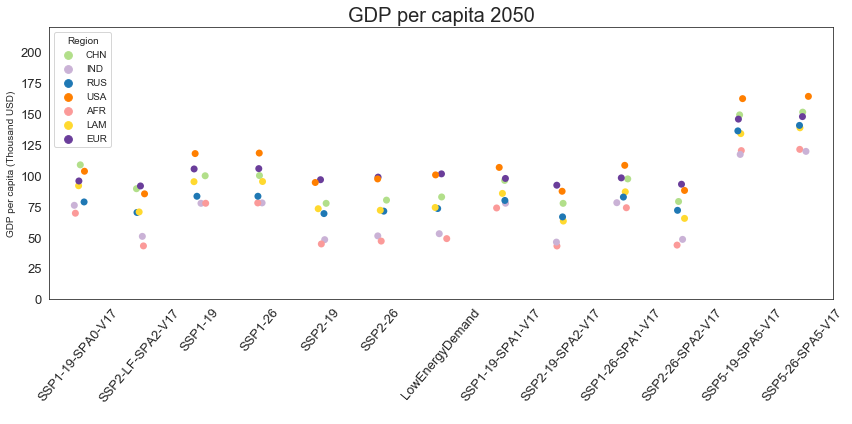

In [11]:
plt.figure(figsize=(12,6))

colours = sns.color_palette("Paired",12)
col_lam = sns.color_palette("Set2",6)
colour_palette = [colours[2],colours[8],colours[1],colours[7],colours[4],col_lam[5], colours[9]]

plt.tick_params(axis='x', labelsize=13, rotation=50)
plt.tick_params(axis='y', labelsize=13)


regions = ['USA', 'EUR', 'CHN', 'LAM', 'AFR', 'IND', 'RUS']

allmodels_df_2050 = allmodels_df.loc[(allmodels_df.Year == 2050) & (allmodels_df.Region.isin(regions) 
                                                                 & (allmodels_df.Scenario.isin(scen_allmodels)))]
allmodels_df_2100 = allmodels_df.loc[(allmodels_df.Year == 2100)  & (allmodels_df.Region.isin(regions) 
                                                                 & (allmodels_df.Scenario.isin(scen_allmodels)))]

allmodels_df_GDP = allmodels_df_2050.append(allmodels_df_2100)



sns.stripplot(x="Scenario", y="GDP_cap", data=allmodels_df_2100, palette = colour_palette, hue = 'Region', marker = 'o',facecolors='none', s = 7, dodge = False) #, order = ['15lo', 'deg2', '15ho']
plt.title('GDP per capita 2050', fontsize = 20)
plt.xlabel(" ")
plt.ylabel("GDP per capita (Thousand USD)")
plt.ylim(0,220)
plt.tight_layout()

#plt.savefig(plot_path + 'GDP_cap_2050.png')

In [11]:

regions = ['USA', 'EUR', 'CHN', 'LAM', 'AFR', 'IND', 'RUS']

#allmodels_df_2050 = allmodels_df.loc[(allmodels_df.Year == 2050) & (allmodels_df.Region.isin(regions) 
#                                                                 & (allmodels_df.Scenario.isin(scen_allmodels)))]
#allmodels_df_2100 = allmodels_df.loc[(allmodels_df.Year == 2100)  & (allmodels_df.Region.isin(regions) 
#                                                                 & (allmodels_df.Scenario.isin(scen_allmodels)))]

allmodels_df_coef = allmodels_df.loc[(allmodels_df.Region.isin(regions)) & (allmodels_df.Scenario.isin(scen_allmodels))]


#allmodels_df_2050 = allmodels_df_2050[['MODEL',  'Region', 'Scenario', 'Year','GDP_cap']]
#allmodels_df_2100 = allmodels_df_2100[['MODEL',  'Region', 'Scenario', 'Year','GDP_cap']]


for scen in allmodels_df_coef.Scenario.unique():
    scen_filt = (allmodels_df_coef.Scenario == scen)
    for ye in allmodels_df_coef.Year.unique():
       #allmodels_df_2050['mean'] = 0
        ye_filt = (allmodels_df_coef.Year == ye)
        allmodels_df_coef.loc[scen_filt & ye_filt,'mean'] = allmodels_df_coef.loc[scen_filt & ye_filt, 'GDP_cap'].mean(axis = 0)
        allmodels_df_coef.loc[scen_filt & ye_filt,'std_dev'] = allmodels_df_coef.loc[scen_filt & ye_filt, 'GDP_cap'].std(axis = 0)
        allmodels_df_coef.loc[scen_filt& ye_filt,'coef_dist'] = allmodels_df_coef.loc[scen_filt& ye_filt, 'std_dev'].values / allmodels_df_coef.loc[scen_filt& ye_filt, 'mean'].values

    
Image_GDP = allmodels_df_coef.loc[allmodels_df_coef.MODEL == 'IMAGE']

#allmodels_df_GDP = allmodels_df_2050.append(allmodels_df_2100)


/Users/susannebaur/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/susannebaur/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


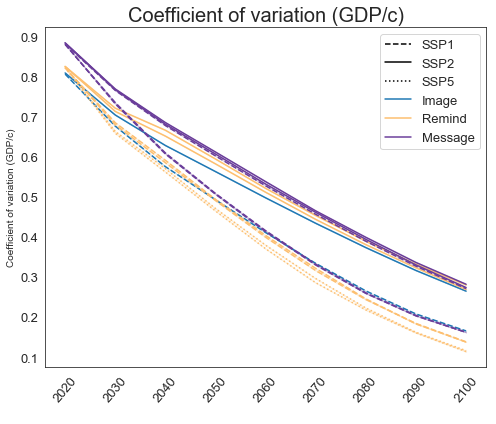

In [12]:
Image_GDP = allmodels_df_coef.loc[allmodels_df_coef.MODEL == 'IMAGE']
Image_SSP1 = Image_GDP.loc[Image_GDP.Scenario == 'SSP1-19-SPA0-V17']
Image_SSP2 = Image_GDP.loc[Image_GDP.Scenario == 'SSP2-LF-SPA2-V17']

Remind_GDP = allmodels_df_coef.loc[allmodels_df_coef.MODEL == 'REMIND']
Remind_SSP1_19 = Remind_GDP.loc[Remind_GDP.Scenario == 'SSP1-19-SPA1-V17']
Remind_SSP2_19 = Remind_GDP.loc[Remind_GDP.Scenario == 'SSP2-19-SPA2-V17']
Remind_SSP1_26 = Remind_GDP.loc[Remind_GDP.Scenario == 'SSP1-26-SPA1-V17']
Remind_SSP2_26 = Remind_GDP.loc[Remind_GDP.Scenario == 'SSP2-26-SPA2-V17']
Remind_SSP5_19 = Remind_GDP.loc[Remind_GDP.Scenario == 'SSP5-19-SPA5-V17']
Remind_SSP5_26 = Remind_GDP.loc[Remind_GDP.Scenario == 'SSP5-26-SPA5-V17']

Message_GDP = allmodels_df_coef.loc[allmodels_df_coef.MODEL == 'MESSAGE']
Message_SSP1_19 = Message_GDP.loc[Message_GDP.Scenario == 'SSP1-19']
Message_LED = Message_GDP.loc[Message_GDP.Scenario == 'LowEnergyDemand']
Message_SSP2_19 = Message_GDP.loc[Message_GDP.Scenario == 'SSP2-19']
Message_SSP1_26 = Message_GDP.loc[Message_GDP.Scenario == 'SSP1-26']
Message_SSP2_26 = Message_GDP.loc[Message_GDP.Scenario == 'SSP2-26']


plt.figure(figsize=(7,6))

colours = sns.color_palette("Paired",12)
col_lam = sns.color_palette("Set2",6)
colour_palette = [colours[2],colours[8],colours[1],colours[7],colours[4],col_lam[5], colours[9]]

plt.tick_params(axis='x', labelsize=13, rotation=50)
plt.tick_params(axis='y', labelsize=13)



ax = sns.lineplot(x="Year", y="coef_dist", data=Image_SSP1, color = colours[1]) 
ax.lines[0].set_linestyle("--")
sns.lineplot(x="Year", y="coef_dist", data=Image_SSP2, color = colours[1])


ax2 = sns.lineplot(x="Year", y="coef_dist", data=Remind_SSP1_19, color = colours[6])
ax2.lines[2].set_linestyle("--")
sns.lineplot(x="Year", y="coef_dist", data=Remind_SSP2_19, color = colours[6]) 
ax4 = sns.lineplot(x="Year", y="coef_dist", data=Remind_SSP1_26, color = colours[6]) 
ax4.lines[4].set_linestyle("--")
sns.lineplot(x="Year", y="coef_dist", data=Remind_SSP2_26, color = colours[6]) 
ax6 = sns.lineplot(x="Year", y="coef_dist", data=Remind_SSP5_19, color = colours[6]) 
ax6.lines[6].set_linestyle(":")
ax7 = sns.lineplot(x="Year", y="coef_dist", data=Remind_SSP5_26, color = colours[6])
ax7.lines[7].set_linestyle(":")
    
ax8 = sns.lineplot(x="Year", y="coef_dist", data=Message_SSP1_19, color = colours[9]) 
ax8.lines[8].set_linestyle("--")
ax9 = sns.lineplot(x="Year", y="coef_dist", data=Message_LED, color = colours[9]) 
ax9.lines[9].set_linestyle("--")
ax10 = sns.lineplot(x="Year", y="coef_dist", data=Message_SSP1_26, color = colours[9]) 
ax10.lines[10].set_linestyle("--")
sns.lineplot(x="Year", y="coef_dist", data=Message_SSP2_19, color = colours[9]) 
sns.lineplot(x="Year", y="coef_dist", data=Message_SSP2_26, color = colours[9]) 


plt.legend(handles=[Line2D([0], [0], linestyle = '--', color='black', label = 'SSP1'),
                    Line2D([0], [0], color='black', label = 'SSP2'),
                    Line2D([0], [0], linestyle = ':', color='black', label = 'SSP5'),
                    Line2D([0], [0],  color=colours[1], label = 'Image'),
                    Line2D([0], [0],  color=colours[6], label = 'Remind'),
                    Line2D([0], [0],  color=colours[9], label = 'Message')],
           markerscale = 1.5, fontsize = 13)

plt.title('Coefficient of variation (GDP/c)', fontsize = 20)
plt.xlabel(" ")
plt.ylabel("Coefficient of variation (GDP/c)")
#plt.ylim(0,220)
plt.tight_layout()
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/coef_var_GDP_cap.png')
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/coef_var_GDP_cap.svg', dpi = 300, transparent = True)

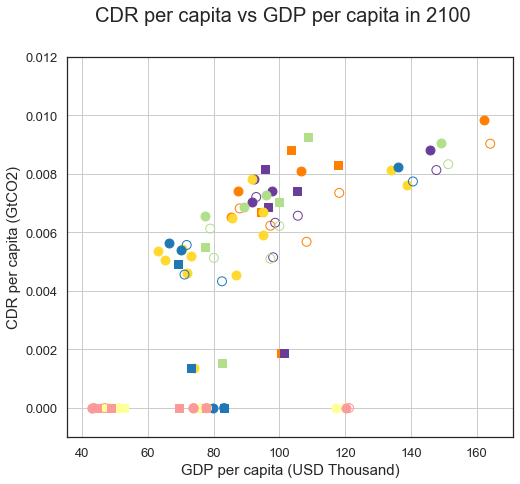

In [107]:
# ALL COUNTRIES - Scatterplot GDP per cap & CDR per cap


sns.set_style("white")


plt.figure(figsize=(8,7))

plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

regions_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR']
colours = sns.color_palette("Paired",12)
col_lam = sns.color_palette("Set2",6)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],col_lam[5], colours[9]]

    
ye = 2100

for sce in scen_15_lo:
    x_USA = allmodels_df.loc[(allmodels_df.Region == 'USA') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'GDP_cap']
    y_USA = allmodels_df.loc[(allmodels_df.Region == 'USA') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'CDR_per_cap_GDP']
    plt.scatter(x_USA, y_USA/1000, color = colours[7], marker = 's', label = 'USA', s = 80)

for sce in scen_15_ho:
    x_USA = allmodels_df.loc[(allmodels_df.Region == 'USA') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'GDP_cap']
    y_USA = allmodels_df.loc[(allmodels_df.Region == 'USA') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'CDR_per_cap_GDP']
    plt.scatter(x_USA, y_USA/1000, color = colours[7], marker = 'o', label = 'USA', s = 80)
    
for sce in scen_2:
    x_USA = allmodels_df.loc[(allmodels_df.Region == 'USA') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'GDP_cap']
    y_USA = allmodels_df.loc[(allmodels_df.Region == 'USA') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'CDR_per_cap_GDP']
    plt.scatter(x_USA, y_USA/1000, color = colours[7], marker = 'o', facecolors='none', s = 80)

for sce in scen_15_lo:
    x_EUR = allmodels_df.loc[(allmodels_df.Region == 'EUR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'GDP_cap']
    y_EUR = allmodels_df.loc[(allmodels_df.Region == 'EUR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'CDR_per_cap_GDP']
    plt.scatter(x_EUR, y_EUR/1000, color = colours[9], marker = 's',  label = 'EUR', s = 80)
    
for sce in scen_15_ho:
    x_EUR = allmodels_df.loc[(allmodels_df.Region == 'EUR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'GDP_cap']
    y_EUR = allmodels_df.loc[(allmodels_df.Region == 'EUR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'CDR_per_cap_GDP']
    plt.scatter(x_EUR, y_EUR/1000, color = colours[9], marker = 'o',  label = 'EUR', s = 80)

for sce in scen_2:
    x_EUR = allmodels_df.loc[(allmodels_df.Region == 'EUR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'GDP_cap']
    y_EUR = allmodels_df.loc[(allmodels_df.Region == 'EUR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'CDR_per_cap_GDP']
    plt.scatter(x_EUR, y_EUR/1000, color = colours[9], marker = 'o', facecolors='none', s = 80)
    
for sce in scen_15_lo:
    x_CHN = allmodels_df.loc[(allmodels_df.Region == 'CHN') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'GDP_cap']
    y_CHN = allmodels_df.loc[(allmodels_df.Region == 'CHN') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'CDR_per_cap_GDP']
    plt.scatter(x_CHN, y_CHN/1000, color = colours[2], marker = 's', label = 'CHN', s = 80)
    
for sce in scen_15_ho:
    x_CHN = allmodels_df.loc[(allmodels_df.Region == 'CHN') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'GDP_cap']
    y_CHN = allmodels_df.loc[(allmodels_df.Region == 'CHN') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'CDR_per_cap_GDP']
    plt.scatter(x_CHN, y_CHN/1000, color = colours[2], marker = 'o', label = 'CHN', s = 80)
    
for sce in scen_2:
    x_CHN = allmodels_df.loc[(allmodels_df.Region == 'CHN') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'GDP_cap']
    y_CHN = allmodels_df.loc[(allmodels_df.Region == 'CHN') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce), 'CDR_per_cap_GDP']
    plt.scatter(x_CHN, y_CHN/1000, color = colours[2], marker = 'o', facecolors='none', s = 80)
    
for sce in scen_15_lo:
    x_LAM = allmodels_df.loc[(allmodels_df.Region == 'LAM') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             , 'GDP_cap']
    y_LAM = allmodels_df.loc[(allmodels_df.Region == 'LAM') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             , 'CDR_per_cap_GDP']
    plt.scatter(x_LAM, y_LAM/1000, color = col_lam[5], marker = 'o', label = 'LAM', s = 80)
    
for sce in scen_15_ho:
    x_LAM = allmodels_df.loc[(allmodels_df.Region == 'LAM') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             , 'GDP_cap']
    y_LAM = allmodels_df.loc[(allmodels_df.Region == 'LAM') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             , 'CDR_per_cap_GDP']
    plt.scatter(x_LAM, y_LAM/1000, color = col_lam[5], marker = 'o', label = 'LAM', s = 80)
    
for sce in scen_2:
    x_LAM = allmodels_df.loc[(allmodels_df.Region == 'LAM') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                            , 'GDP_cap']
    y_LAM = allmodels_df.loc[(allmodels_df.Region == 'LAM') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             , 'CDR_per_cap_GDP']
    plt.scatter(x_LAM, y_LAM/1000, color = col_lam[5], marker = 'o', label = 'LAM', s = 80)
    
for sce in scen_15_lo:
    x_RUS = allmodels_df.loc[(allmodels_df.Region == 'RUS') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             , 'GDP_cap']
    y_RUS = allmodels_df.loc[(allmodels_df.Region == 'RUS') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             , 'CDR_per_cap_GDP']
    plt.scatter(x_RUS, y_RUS/1000, color = colours[1], marker = 's', label = 'RUS', s = 80)
    
for sce in scen_15_ho:
    x_RUS = allmodels_df.loc[(allmodels_df.Region == 'RUS') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             , 'GDP_cap']
    y_RUS = allmodels_df.loc[(allmodels_df.Region == 'RUS') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             , 'CDR_per_cap_GDP']
    plt.scatter(x_RUS, y_RUS/1000, color = colours[1], marker = 'o', label = 'RUS', s = 80)

for sce in scen_2:
    x_RUS = allmodels_df.loc[(allmodels_df.Region == 'RUS') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             , 'GDP_cap']
    y_RUS = allmodels_df.loc[(allmodels_df.Region == 'RUS') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             , 'CDR_per_cap_GDP']
    plt.scatter(x_RUS, y_RUS/1000, color = colours[1], marker = 'o', facecolors='none', s = 80) 

for sce in scen_15_lo:
    x_IND = allmodels_df.loc[(allmodels_df.Region == 'IND') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             , 'GDP_cap']
    y_IND = allmodels_df.loc[(allmodels_df.Region == 'IND') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             , 'CDR_per_cap_GDP']
    plt.scatter(x_IND, y_IND/1000, color = colours[10], marker = 's', label = 'IND', s = 80)
    
for sce in scen_15_ho:
    x_IND = allmodels_df.loc[(allmodels_df.Region == 'IND') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             , 'GDP_cap']
    y_IND = allmodels_df.loc[(allmodels_df.Region == 'IND') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             , 'CDR_per_cap_GDP']
    plt.scatter(x_IND, y_IND/1000, color = colours[10], marker = 'o', label = 'IND', s = 80)

for sce in scen_2:
    x_IND = allmodels_df.loc[(allmodels_df.Region == 'IND') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             , 'GDP_cap']
    y_IND = allmodels_df.loc[(allmodels_df.Region == 'IND') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             , 'CDR_per_cap_GDP']
    plt.scatter(x_IND, y_IND/1000, color = colours[10], marker = 'o', facecolors='none', s = 80) 
    
for sce in scen_15_lo:
    x_AFR = allmodels_df.loc[(allmodels_df.Region == 'AFR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             , 'GDP_cap']
    y_AFR = allmodels_df.loc[(allmodels_df.Region == 'AFR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             , 'CDR_per_cap_GDP']
    plt.scatter(x_AFR, y_AFR/1000, color = colours[4], marker = 's', label = 'IND', s = 80)
    
for sce in scen_15_ho:
    x_AFR = allmodels_df.loc[(allmodels_df.Region == 'AFR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             , 'GDP_cap']
    y_AFR = allmodels_df.loc[(allmodels_df.Region == 'AFR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             , 'CDR_per_cap_GDP']
    plt.scatter(x_AFR, y_AFR/1000, color = colours[4], marker = 'o', label = 'IND', s = 80)

for sce in scen_2:
    x_AFR = allmodels_df.loc[(allmodels_df.Region == 'AFR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             , 'GDP_cap']
    y_AFR = allmodels_df.loc[(allmodels_df.Region == 'AFR') & (allmodels_df.Year == ye) & (allmodels_df.Scenario == sce)
                             , 'CDR_per_cap_GDP']
    plt.scatter(x_AFR, y_AFR/1000, color = colours[4], marker = 'o', facecolors='none', s = 80) 

plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)    
    

plt.xlabel('GDP per capita (USD Thousand)', fontsize = 15)
plt.ylabel('CDR per capita (GtCO2)', fontsize = 15)
plt.suptitle('CDR per capita vs GDP per capita in 2100', fontsize = 20)

#l = plt.legend(handles=[Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[7], label = 'USA'),
#            Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[9], label = 'Europe'),
#             Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[2], label = 'China'),
#              Line2D([0], [0], linestyle = 'none', marker = 'o', color=col_lam[5], label = 'Latin America'),
#               Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[1], label = 'Russia'),
#                Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[10], label = 'India'),
#                 Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[4], label = 'Sub-Saharan Africa')],
#           markerscale = 1.5, loc = 'upper left', fontsize = 13)

#l2 = plt.legend(handles=[Line2D([0], [0], linestyle = 'none', marker = 's', color="black", label = '1.5°C l.OS'),
#                         Line2D([0], [0], linestyle = 'none', marker = 'o', color="black", label = '1.5°C h.OS'),
#                Line2D([0], [0], linestyle = 'none', marker = open_circle, color="black", label = '2°C')],
#                loc = 'upper center', fontsize = 11)    # 0.155, 0.68 <- for left side
  
#plt.gca().add_artist(l)

plt.grid(True)
plt.ylim(-0.001,0.012)
# plt.tight_layout()

plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/ALL_COUNTRIES_GDP_cap_CDR_cap 2100_leg.png')
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/ALL_COUNTRIES_GDP_cap_CDR_cap 2100_leg.svg', dpi = 300, transparent = True)


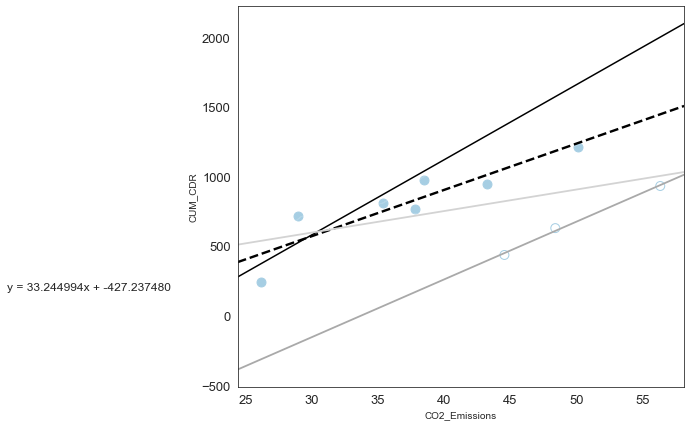

In [11]:
# Claire checking global slopes
sns.set_style("white")

y_variable_wld = 'CUM_CDR'

plt.figure(figsize=(8,7))

plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

# regions_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR']
colours = sns.color_palette("Paired",12)
colour_palette = [colours[3],colours[0],colours[1],colours[2],colours[4],colours[5], colours[6]]
#CHN 3 IND 0, RUS 1, USA 2, AFR 4, LAM 5, EUR 6


for sce in scen_15:
    x_WLD = WLD_mix.loc[(WLD_mix.Year==2030) & (WLD_mix.Scenario == sce)]
    x_WLD = x_WLD[x_variable]/1000
    y_WLD = WLD_mix.loc[(WLD_mix.Year==2100) & (WLD_mix.Scenario == sce)]
    y_WLD = y_WLD[y_variable_wld]/1000
    plt.scatter(x_WLD, y_WLD, color = colours[0], marker = 'o', label = 'WLD', s = 80)


for sce in scen_2:
    x_WLD = WLD_mix.loc[(WLD_mix.Year==2030) & (WLD_mix.Scenario == sce)]
    x_WLD = x_WLD[x_variable]/1000
    y_WLD = WLD_mix.loc[(WLD_mix.Year==2100) & (WLD_mix.Scenario == sce)]
    y_WLD = y_WLD[y_variable_wld]/1000
    plt.scatter(x_WLD, y_WLD, color = colours[0], marker = 'o', facecolors='none', s = 80)



x_var_wld_15 = allmodels_WLD_15.loc[allmodels_WLD_15.Year == 2030][x_variable]/1000
y_var_wld_15 = allmodels_WLD_15.loc[allmodels_WLD_15.Year == 2100][y_variable_wld]/1000
x_var_wld_2 = allmodels_WLD_2.loc[allmodels_WLD_2.Year == 2030][x_variable]/1000
y_var_wld_2 = allmodels_WLD_2.loc[allmodels_WLD_2.Year == 2100][y_variable_wld]/1000
x_var_wld_15lo = allmodels_WLD_15_lo.loc[allmodels_WLD_15_lo.Year == 2030][x_variable]/1000
y_var_wld_15lo = allmodels_WLD_15_lo.loc[allmodels_WLD_15_lo.Year == 2100][y_variable_wld]/1000
x_var_wld = WLD_2030[x_variable]/1000
y_var_wld = WLD_2100[y_variable_wld]/1000

    
z = np.polyfit(x_var_wld_15, y_var_wld_15, 1)
p = np.poly1d(z)
#plt.plot(x_var, p(x_var), 'white')

plt.text(7, 185.5, "y = %.6fx + %.6f"%(z[0],z[1]), fontsize = 12)    # equation of trend line

    
#adding linear regression 

xy = sns.regplot(x = x_var_wld_15, y = y_var_wld_15, ci = 0, color = 'black', scatter = False, line_kws={"lw": 2.4})
xy = sns.regplot(x = x_var_wld_2, y = y_var_wld_2, ci = 0, color = 'darkgrey', scatter = False, line_kws={"lw": 1.8})
xy = sns.regplot(x = x_var_wld_15lo, y = y_var_wld_15lo, ci = 0, color = 'black', scatter = False, line_kws={"lw": 1.5})
xy = sns.regplot(x = x_var_wld, y = y_var_wld, ci = 0, color = 'lightgrey', scatter = False, line_kws={"lw": 1.8})

xy.lines[0].set_linestyle("--")

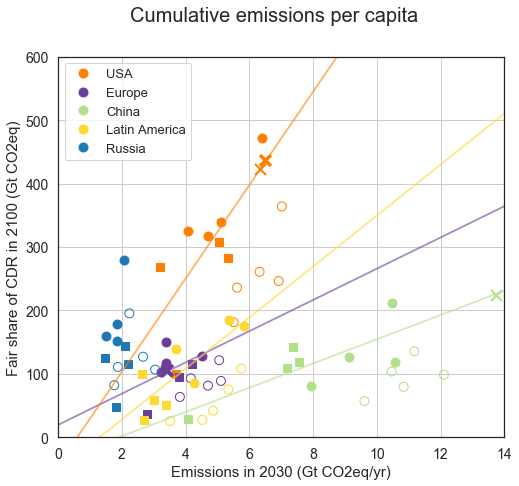

In [72]:
# Plot with all models POP - single countries regression

# x_variable = 'em_change'
x_variable = 'CO2_Emissions'
y_variable = 'CUM_CDR_fair_share_by_CUM_POP'
#y_variable = 'CUM_CDR_fair_share_by_GDP'
# y_variable = 'CUM_CDR'


x_df = allmodels_regions.loc[allmodels_regions.Year == 2030]
y_df = allmodels_regions.loc[allmodels_regions.Year == 2100]
x_var = x_df[x_variable]/1000
y_var = y_df[y_variable]/1000

x_df_2 = allmodels_regions_2.loc[allmodels_regions_2.Year == 2030]
y_df_2 = allmodels_regions_2.loc[allmodels_regions_2.Year == 2100]
x_var_2 = x_df_2[x_variable]/1000
y_var_2 = y_df_2[y_variable]/1000

x_df_15 = allmodels_regions_15.loc[allmodels_regions_15.Year == 2030]
y_df_15 = allmodels_regions_15.loc[allmodels_regions_15.Year == 2100]
x_var_15 = x_df_15[x_variable]/1000
y_var_15 = y_df_15[y_variable]/1000

x_df_15_lo = allmodels_regions_15_lo.loc[allmodels_regions_15_lo.Year == 2030]
y_df_15_lo = allmodels_regions_15_lo.loc[allmodels_regions_15_lo.Year == 2100]
x_var_15_lo = x_df_15_lo[x_variable]/1000
y_var_15_lo = y_df_15_lo[y_variable]/1000

x_df_15_ho = allmodels_regions_15_ho.loc[allmodels_regions_15_ho.Year == 2030]
y_df_15_ho = allmodels_regions_15_ho.loc[allmodels_regions_15_ho.Year == 2100]
x_var_15_ho = x_df_15_ho[x_variable]/1000
y_var_15_ho = y_df_15_ho[y_variable]/1000


x_df_USA = allmodels_USA.loc[allmodels_USA.Year == 2030]
y_df_USA = allmodels_USA.loc[allmodels_USA.Year == 2100]
x_var_USA = x_df_USA[x_variable]/1000
y_var_USA = y_df_USA[y_variable]/1000

x_df_USA_2 = allmodels_USA_2.loc[allmodels_USA_2.Year == 2030]
y_df_USA_2 = allmodels_USA_2.loc[allmodels_USA_2.Year == 2100]
x_var_USA_2 = x_df_USA_2[x_variable]/1000
y_var_USA_2 = y_df_USA_2[y_variable]/1000

x_df_USA_15 = allmodels_USA_15.loc[allmodels_USA_15.Year == 2030]
y_df_USA_15 = allmodels_USA_15.loc[allmodels_USA_15.Year == 2100]
x_var_USA_15 = x_df_USA_15[x_variable]/1000
y_var_USA_15 = y_df_USA_15[y_variable]/1000

x_df_USA_15_lo = allmodels_USA_15_lo.loc[allmodels_USA_15_lo.Year == 2030]
y_df_USA_15_lo = allmodels_USA_15_lo.loc[allmodels_USA_15_lo.Year == 2100]
x_var_USA_15_lo = x_df_USA_15_lo[x_variable]/1000
y_var_USA_15_lo = y_df_USA_15_lo[y_variable]/1000

x_df_USA_15_ho = allmodels_USA_15_ho.loc[allmodels_USA_15_ho.Year == 2030]
y_df_USA_15_ho = allmodels_USA_15_ho.loc[allmodels_USA_15_ho.Year == 2100]
x_var_USA_15_ho = x_df_USA_15_ho[x_variable]/1000
y_var_USA_15_ho = y_df_USA_15_ho[y_variable]/1000


x_df_CHN = allmodels_CHN.loc[allmodels_CHN.Year == 2030]
y_df_CHN = allmodels_CHN.loc[allmodels_CHN.Year == 2100]
x_var_CHN = x_df_CHN[x_variable]/1000
y_var_CHN = y_df_CHN[y_variable]/1000

x_df_CHN_2 = allmodels_CHN_2.loc[allmodels_CHN_2.Year == 2030]
y_df_CHN_2 = allmodels_CHN_2.loc[allmodels_CHN_2.Year == 2100]
x_var_CHN_2 = x_df_CHN_2[x_variable]/1000
y_var_CHN_2 = y_df_CHN_2[y_variable]/1000

x_df_CHN_15 = allmodels_CHN_15.loc[allmodels_CHN_15.Year == 2030]
y_df_CHN_15 = allmodels_CHN_15.loc[allmodels_CHN_15.Year == 2100]
x_var_CHN_15 = x_df_CHN_15[x_variable]/1000
y_var_CHN_15 = y_df_CHN_15[y_variable]/1000

x_df_CHN_15_lo = allmodels_CHN_15_lo.loc[allmodels_CHN_15_lo.Year == 2030]
y_df_CHN_15_lo = allmodels_CHN_15_lo.loc[allmodels_CHN_15_lo.Year == 2100]
x_var_CHN_15_lo = x_df_CHN_15_lo[x_variable]/1000
y_var_CHN_15_lo = y_df_CHN_15_lo[y_variable]/1000

x_df_CHN_15_ho = allmodels_CHN_15_ho.loc[allmodels_CHN_15_ho.Year == 2030]
y_df_CHN_15_ho = allmodels_CHN_15_ho.loc[allmodels_CHN_15_ho.Year == 2100]
x_var_CHN_15_ho = x_df_CHN_15_ho[x_variable]/1000
y_var_CHN_15_ho = y_df_CHN_15_ho[y_variable]/1000

x_df_EUR = allmodels_EUR.loc[allmodels_EUR.Year == 2030]
y_df_EUR = allmodels_EUR.loc[allmodels_EUR.Year == 2100]
x_var_EUR = x_df_EUR[x_variable]/1000
y_var_EUR = y_df_EUR[y_variable]/1000

x_df_EUR_2 = allmodels_EUR_2.loc[allmodels_EUR_2.Year == 2030]
y_df_EUR_2 = allmodels_EUR_2.loc[allmodels_EUR_2.Year == 2100]
x_var_EUR_2 = x_df_EUR_2[x_variable]/1000
y_var_EUR_2 = y_df_EUR_2[y_variable]/1000

x_df_EUR_15 = allmodels_EUR_15.loc[allmodels_EUR_15.Year == 2030]
y_df_EUR_15 = allmodels_EUR_15.loc[allmodels_EUR_15.Year == 2100]
x_var_EUR_15 = x_df_EUR_15[x_variable]/1000
y_var_EUR_15 = y_df_EUR_15[y_variable]/1000

x_df_EUR_15_lo = allmodels_EUR_15_lo.loc[allmodels_EUR_15_lo.Year == 2030]
y_df_EUR_15_lo = allmodels_EUR_15_lo.loc[allmodels_EUR_15_lo.Year == 2100]
x_var_EUR_15_lo = x_df_EUR_15_lo[x_variable]/1000
y_var_EUR_15_lo = y_df_EUR_15_lo[y_variable]/1000

x_df_EUR_15_ho = allmodels_EUR_15_ho.loc[allmodels_EUR_15_ho.Year == 2030]
y_df_EUR_15_ho = allmodels_EUR_15_ho.loc[allmodels_EUR_15_ho.Year == 2100]
x_var_EUR_15_ho = x_df_EUR_15_ho[x_variable]/1000
y_var_EUR_15_ho = y_df_EUR_15_ho[y_variable]/1000


x_df_RUS = allmodels_RUS.loc[allmodels_RUS.Year == 2030]
y_df_RUS = allmodels_RUS.loc[allmodels_RUS.Year == 2100]
x_var_RUS = x_df_RUS[x_variable]/1000
y_var_RUS = y_df_RUS[y_variable]/1000

x_df_RUS_2 = allmodels_RUS_2.loc[allmodels_RUS_2.Year == 2030]
y_df_RUS_2 = allmodels_RUS_2.loc[allmodels_RUS_2.Year == 2100]
x_var_RUS_2 = x_df_RUS_2[x_variable]/1000
y_var_RUS_2 = y_df_RUS_2[y_variable]/1000

x_df_RUS_15 = allmodels_RUS_15.loc[allmodels_RUS_15.Year == 2030]
y_df_RUS_15 = allmodels_RUS_15.loc[allmodels_RUS_15.Year == 2100]
x_var_RUS_15 = x_df_RUS_15[x_variable]/1000
y_var_RUS_15 = y_df_RUS_15[y_variable]/1000

x_df_RUS_15_lo = allmodels_RUS_15_lo.loc[allmodels_RUS_15_lo.Year == 2030]
y_df_RUS_15_lo = allmodels_RUS_15_lo.loc[allmodels_RUS_15_lo.Year == 2100]
x_var_RUS_15_lo = x_df_RUS_15_lo[x_variable]/1000
y_var_RUS_15_lo = y_df_RUS_15_lo[y_variable]/1000

x_df_RUS_15_ho = allmodels_RUS_15_ho.loc[allmodels_RUS_15_ho.Year == 2030]
y_df_RUS_15_ho = allmodels_RUS_15_ho.loc[allmodels_RUS_15_ho.Year == 2100]
x_var_RUS_15_ho = x_df_RUS_15_ho[x_variable]/1000
y_var_RUS_15_ho = y_df_RUS_15_ho[y_variable]/1000


x_df_LAM = allmodels_LAM.loc[allmodels_LAM.Year == 2030]
y_df_LAM = allmodels_LAM.loc[allmodels_LAM.Year == 2100]
x_var_LAM = x_df_LAM[x_variable]/1000
y_var_LAM = y_df_LAM[y_variable]/1000

x_df_LAM_2 = allmodels_LAM_2.loc[allmodels_LAM_2.Year == 2030]
y_df_LAM_2 = allmodels_LAM_2.loc[allmodels_LAM_2.Year == 2100]
x_var_LAM_2 = x_df_LAM_2[x_variable]/1000
y_var_LAM_2 = y_df_LAM_2[y_variable]/1000

x_df_LAM_15 = allmodels_LAM_15.loc[allmodels_LAM_15.Year == 2030]
y_df_LAM_15 = allmodels_LAM_15.loc[allmodels_LAM_15.Year == 2100]
x_var_LAM_15 = x_df_LAM_15[x_variable]/1000
y_var_LAM_15 = y_df_LAM_15[y_variable]/1000

x_df_LAM_15_lo = allmodels_LAM_15_lo.loc[allmodels_LAM_15_lo.Year == 2030]
y_df_LAM_15_lo = allmodels_LAM_15_lo.loc[allmodels_LAM_15_lo.Year == 2100]
x_var_LAM_15_lo = x_df_LAM_15_lo[x_variable]/1000
y_var_LAM_15_lo = y_df_LAM_15_lo[y_variable]/1000

x_df_LAM_15_ho = allmodels_LAM_15_ho.loc[allmodels_LAM_15_ho.Year == 2030]
y_df_LAM_15_ho = allmodels_LAM_15_ho.loc[allmodels_LAM_15_ho.Year == 2100]
x_var_LAM_15_ho = x_df_LAM_15_ho[x_variable]/1000
y_var_LAM_15_ho = y_df_LAM_15_ho[y_variable]/1000



region_USA=['USA']
USA_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_USA)) & (allmodels_df.Year==2030)].copy()
USA_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_USA)) & (allmodels_df.Year==2100)].copy()
USA_mix = USA_2030.append(USA_2100)

region_EUR=['EUR']
EUR_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_EUR)) & (allmodels_df.Year==2030)].copy()
EUR_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_EUR)) & (allmodels_df.Year==2100)].copy()
EUR_mix = EUR_2030.append(EUR_2100)

region_AFR=['AFR']
AFR_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_AFR)) & (allmodels_df.Year==2030)].copy()
AFR_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_AFR)) & (allmodels_df.Year==2100)].copy()
AFR_mix = AFR_2030.append(AFR_2100)

region_CHN=['CHN']
CHN_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_CHN)) & (allmodels_df.Year==2030)].copy()
CHN_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_CHN)) & (allmodels_df.Year==2100)].copy()
CHN_mix = CHN_2030.append(CHN_2100)

region_IND=['IND']
IND_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_IND)) & (allmodels_df.Year==2030)].copy()
IND_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_IND)) & (allmodels_df.Year==2100)].copy()
IND_mix = IND_2030.append(IND_2100)

region_LAM=['LAM']
LAM_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_LAM)) & (allmodels_df.Year==2030)].copy()
LAM_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_LAM)) & (allmodels_df.Year==2100)].copy()
LAM_mix = LAM_2030.append(LAM_2100)

region_RUS=['RUS']
RUS_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_RUS)) & (allmodels_df.Year==2030)].copy()
RUS_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_RUS)) & (allmodels_df.Year==2100)].copy()
RUS_mix = RUS_2030.append(RUS_2100)


sns.set_style("white")


plt.figure(figsize=(8,7))

plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)


colours = sns.color_palette("Paired",12)
col_lam = sns.color_palette("Set2", 6)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],col_lam[5], colours[9]]


#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6


for sce in scen_15_lo:
    x_USA = USA_mix.loc[(USA_mix.Year==2030) & (USA_mix.Scenario == sce)]
    x_USA = x_USA[x_variable]/1000
    y_USA = USA_mix.loc[(USA_mix.Year==2100) & (USA_mix.Scenario == sce)]
    y_USA = y_USA[y_variable]/1000
    plt.scatter(x_USA, y_USA, color = colours[7], marker = 's', label = 'USA', s = 80)
    
for sce in scen_15_ho:
    x_USA = USA_mix.loc[(USA_mix.Year==2030) & (USA_mix.Scenario == sce)]
    x_USA = x_USA[x_variable]/1000
    y_USA = USA_mix.loc[(USA_mix.Year==2100) & (USA_mix.Scenario == sce)]
    y_USA = y_USA[y_variable]/1000
    plt.scatter(x_USA, y_USA, color = colours[7], marker = 'o', label = 'USA', s = 80)
    
for sce in scen_2:
    x_USA = USA_mix.loc[(USA_mix.Year==2030) & (USA_mix.Scenario == sce)]
    x_USA = x_USA[x_variable]/1000
    y_USA = USA_mix.loc[(USA_mix.Year==2100) & (USA_mix.Scenario == sce)]
    y_USA = y_USA[y_variable]/1000
    plt.scatter(x_USA, y_USA, color = colours[7], marker = 'o', facecolors='none', s = 80)

for sce in scen_15_lo:
    x_EUR = EUR_mix.loc[(EUR_mix.Year==2030) & (EUR_mix.Scenario == sce)]
    x_EUR = x_EUR[x_variable]/1000
    y_EUR = EUR_mix.loc[(EUR_mix.Year==2100) & (EUR_mix.Scenario == sce)]
    y_EUR = y_EUR[y_variable]/1000
    plt.scatter(x_EUR, y_EUR, color = colours[9], marker = 's',  label = 'EUR', s = 80)
    
for sce in scen_15_ho:
    x_EUR = EUR_mix.loc[(EUR_mix.Year==2030) & (EUR_mix.Scenario == sce)]
    x_EUR = x_EUR[x_variable]/1000
    y_EUR = EUR_mix.loc[(EUR_mix.Year==2100) & (EUR_mix.Scenario == sce)]
    y_EUR = y_EUR[y_variable]/1000
    plt.scatter(x_EUR, y_EUR, color = colours[9], marker = 'o',  label = 'EUR', s = 80)

for sce in scen_2:
    x_EUR = EUR_mix.loc[(EUR_mix.Year==2030) & (EUR_mix.Scenario == sce)]
    x_EUR = x_EUR[x_variable]/1000
    y_EUR = EUR_mix.loc[(EUR_mix.Year==2100) & (EUR_mix.Scenario == sce)]
    y_EUR = y_EUR[y_variable]/1000
    plt.scatter(x_EUR, y_EUR, color = colours[9], marker = 'o', facecolors='none', s = 80)
    
for sce in scen_15_lo:
    x_CHN = CHN_mix.loc[(CHN_mix.Year==2030) & (CHN_mix.Scenario == sce)]
    x_CHN = x_CHN[x_variable]/1000
    y_CHN = CHN_mix.loc[(CHN_mix.Year==2100) & (CHN_mix.Scenario == sce)]
    y_CHN = y_CHN[y_variable]/1000
    plt.scatter(x_CHN, y_CHN, color = colours[2], marker = 's', label = 'CHN', s = 80)
    
for sce in scen_15_ho:
    x_CHN = CHN_mix.loc[(CHN_mix.Year==2030) & (CHN_mix.Scenario == sce)]
    x_CHN = x_CHN[x_variable]/1000
    y_CHN = CHN_mix.loc[(CHN_mix.Year==2100) & (CHN_mix.Scenario == sce)]
    y_CHN = y_CHN[y_variable]/1000
    plt.scatter(x_CHN, y_CHN, color = colours[2], marker = 'o', label = 'CHN', s = 80)
    
for sce in scen_2:
    x_CHN = CHN_mix.loc[(CHN_mix.Year==2030) & (CHN_mix.Scenario == sce)]
    x_CHN = x_CHN[x_variable]/1000
    y_CHN = CHN_mix.loc[(CHN_mix.Year==2100) & (CHN_mix.Scenario == sce)]
    y_CHN = y_CHN[y_variable]/1000
    plt.scatter(x_CHN, y_CHN, color = colours[2], marker = 'o', facecolors='none', s = 80)
    
for sce in scen_15_lo:
    x_LAM = LAM_mix.loc[(LAM_mix.Year==2030) & (LAM_mix.Scenario == sce)]
    x_LAM = x_LAM[x_variable]/1000
    y_LAM = LAM_mix.loc[(LAM_mix.Year==2100) & (LAM_mix.Scenario == sce)]
    y_LAM = y_LAM[y_variable]/1000
    plt.scatter(x_LAM, y_LAM, color = col_lam[5], marker = 's', label = 'LAM', s = 80)
    
for sce in scen_15_ho:
    x_LAM = LAM_mix.loc[(LAM_mix.Year==2030) & (LAM_mix.Scenario == sce)]
    x_LAM = x_LAM[x_variable]/1000
    y_LAM = LAM_mix.loc[(LAM_mix.Year==2100) & (LAM_mix.Scenario == sce)]
    y_LAM = y_LAM[y_variable]/1000
    plt.scatter(x_LAM, y_LAM, color = col_lam[5], marker = 'o', label = 'LAM', s = 80)
    
for sce in scen_2:
    x_LAM = LAM_mix.loc[(LAM_mix.Year==2030) & (LAM_mix.Scenario == sce)]
    x_LAM = x_LAM[x_variable]/1000
    y_LAM = LAM_mix.loc[(LAM_mix.Year==2100) & (LAM_mix.Scenario == sce)]
    y_LAM = y_LAM[y_variable]/1000
    plt.scatter(x_LAM, y_LAM, color = col_lam[5], marker = 'o', facecolors='none', s = 80)  
    
for sce in scen_15_lo:
    x_RUS = RUS_mix.loc[(RUS_mix.Year==2030) & (RUS_mix.Scenario == sce)]
    x_RUS = x_RUS[x_variable]/1000
    y_RUS = RUS_mix.loc[(RUS_mix.Year==2100) & (RUS_mix.Scenario == sce)]
    y_RUS = y_RUS[y_variable]/1000
    plt.scatter(x_RUS, y_RUS, color = colours[1], marker = 's', label = 'RUS', s = 80)
        
for sce in scen_15_ho:
    x_RUS = RUS_mix.loc[(RUS_mix.Year==2030) & (RUS_mix.Scenario == sce)]
    x_RUS = x_RUS[x_variable]/1000
    y_RUS = RUS_mix.loc[(RUS_mix.Year==2100) & (RUS_mix.Scenario == sce)]
    y_RUS = y_RUS[y_variable]/1000
    plt.scatter(x_RUS, y_RUS, color = colours[1], marker = 'o', label = 'RUS', s = 80)

for sce in scen_2:
    x_RUS = RUS_mix.loc[(RUS_mix.Year==2030) & (RUS_mix.Scenario == sce)]
    x_RUS = x_RUS[x_variable]/1000
    y_RUS = RUS_mix.loc[(RUS_mix.Year==2100) & (RUS_mix.Scenario == sce)]
    y_RUS = y_RUS[y_variable]/1000
    plt.scatter(x_RUS, y_RUS, color = colours[1], marker = 'o', facecolors='none', s = 80) 

plt.ylim(0,600)
plt.xlim(0,14)
    
#adding linear regression 

#CHN 3 IND 0, RUS 1, USA 2, AFR 4, LAM 5, EUR 6
sns.regplot(x = x_var_EUR_15, y = y_var_EUR_15, ci = 0, color = colours[9], scatter = False, line_kws={"lw": 1.8, "alpha":0.6})
sns.regplot(x = x_var_CHN_15, y = y_var_CHN_15, ci = 0, color = colours[2], scatter = False, line_kws={"lw": 1.8, "alpha":0.6})
#sns.regplot(x = x_var_RUS_15, y = y_var_RUS_15, ci = 0, color = colours[1], scatter = False, line_kws={"lw": 1.8, "alpha":0.6})
sns.regplot(x = x_var_LAM_15, y = y_var_LAM_15, ci = 0, color = col_lam[5], scatter = False, line_kws={"lw": 1.8, "alpha":0.6})
sns.regplot(x = x_var_USA_15, y = y_var_USA_15, ci = 0, color = colours[7], scatter = False, line_kws={"lw": 1.8, "alpha":0.6})

plt.suptitle('Cumulative emissions per capita', fontsize = 20)

plt.legend(handles=[Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[7], label = 'USA'),
            Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[9], label = 'Europe'),
             Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[2], label = 'China'),
              Line2D([0], [0], linestyle = 'none', marker = 'o', color=col_lam[5], label = 'Latin America'),
               Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[1], label = 'Russia')],
           markerscale = 1.5, fontsize = 13)

plt.grid(True)

#, linewidths=1, mew=1,

plt.plot(NDC_EUR['X_min'], NDC_EUR['Y_CPCE_min'], ms = 11, mew = 2, marker = 'x', color = colours[9])
plt.plot(NDC_EUR['X_max'], NDC_EUR['Y_CPCE_max'], ms = 11, mew = 3.5, marker = 'x', color = colours[9])
plt.plot(NDC_USA['X_min'], NDC_USA['Y_CPCE_min'], ms = 11, mew = 2, marker = 'x', color = colours[7])
plt.plot(NDC_USA['X_max'], NDC_USA['Y_CPCE_max'], ms = 11, mew = 3.5, marker = 'x', color = colours[7])
#plt.plot(NDC_RUS['X_min'], NDC_RUS['Y_CPCE_min'], ms = 11, mew = 2, marker = 'x', color = colours[1])
#plt.plot(NDC_RUS['X_max'], NDC_RUS['Y_CPCE_max'], ms = 11, mew = 3.5, marker = 'x', color = colours[1])
plt.plot(NDC_CHN['X_min'], NDC_CHN['Y_CPCE_min'], ms = 11, mew = 2, marker = 'x', color = colours[2])
plt.plot(NDC_CHN['X_max'], NDC_CHN['Y_CPCE_max'], ms = 11, mew = 3.5, marker = 'x', color = colours[2])


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Emissions in 2030 (Gt CO2eq/yr)', fontsize = 15)
plt.ylabel('Fair share of CDR in 2100 (Gt CO2eq)', fontsize = 15)

#plt.tight_layout()

plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/CPCE_region_specific_15.png')
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/CPCE_region_specific_15.svg', dpi = 300, transparent = True)


In [52]:

print(NDC_EUR['Y_CPCE_min'])

  Region  Y_CPCE_min  Y_CPCE_max   Y_AP_min   Y_AP_max   X_min   X_max
0    EUR    82.78750    83.29850  130.95820  132.00484   3.390   3.418
1    CHN   127.50416   138.58216  355.92848  389.52498  13.744  15.194
2    RUS   200.57850   218.28450   39.89149   43.07233   2.491   2.647
3    USA   264.88380   288.42200  149.94204  163.65560   5.284   5.760
0    82.7875
Name: Y_CPCE_min, dtype: float64


In [59]:

x_df = allmodels_regions.loc[allmodels_regions.Year == 2030]
y_df = allmodels_regions.loc[allmodels_regions.Year == 2100]
x_var = x_df[x_variable]/1000
y_var = y_df[y_variable]/1000

x_df_2 = allmodels_regions_2.loc[allmodels_regions_2.Year == 2030]
y_df_2 = allmodels_regions_2.loc[allmodels_regions_2.Year == 2100]
x_var_2 = x_df_2[x_variable]/1000
y_var_2 = y_df_2[y_variable]/1000

x_df_15 = allmodels_regions_15.loc[allmodels_regions_15.Year == 2030]
y_df_15 = allmodels_regions_15.loc[allmodels_regions_15.Year == 2100]
x_var_15 = x_df_15[x_variable]/1000
y_var_15 = y_df_15[y_variable]/1000

x_df_15_lo = allmodels_regions_15_lo.loc[allmodels_regions_15_lo.Year == 2030]
y_df_15_lo = allmodels_regions_15_lo.loc[allmodels_regions_15_lo.Year == 2100]
x_var_15_lo = x_df_15_lo[x_variable]/1000
y_var_15_lo = y_df_15_lo[y_variable]/1000

x_df_15_ho = allmodels_regions_15_ho.loc[allmodels_regions_15_ho.Year == 2030]
y_df_15_ho = allmodels_regions_15_ho.loc[allmodels_regions_15_ho.Year == 2100]
x_var_15_ho = x_df_15_ho[x_variable]/1000
y_var_15_ho = y_df_15_ho[y_variable]/1000





In [27]:
x_df_USA = allmodels_USA.loc[allmodels_USA.Year == 2030]
y_df_USA = allmodels_USA.loc[allmodels_USA.Year == 2100]
x_var_USA = x_df_USA[x_variable]/1000
y_var_USA = y_df_USA[y_variable]/1000

x_df_USA_2 = allmodels_USA_2.loc[allmodels_USA_2.Year == 2030]
y_df_USA_2 = allmodels_USA_2.loc[allmodels_USA_2.Year == 2100]
x_var_USA_2 = x_df_USA_2[x_variable]/1000
y_var_USA_2 = y_df_USA_2[y_variable]/1000

x_df_USA_15 = allmodels_USA_15.loc[allmodels_USA_15.Year == 2030]
y_df_USA_15 = allmodels_USA_15.loc[allmodels_USA_15.Year == 2100]
x_var_USA_15 = x_df_USA_15[x_variable]/1000
y_var_USA_15 = y_df_USA_15[y_variable]/1000

x_df_USA_15_lo = allmodels_USA_15_lo.loc[allmodels_USA_15_lo.Year == 2030]
y_df_USA_15_lo = allmodels_USA_15_lo.loc[allmodels_USA_15_lo.Year == 2100]
x_var_USA_15_lo = x_df_USA_15_lo[x_variable]/1000
y_var_USA_15_lo = y_df_USA_15_lo[y_variable]/1000

x_df_USA_15_ho = allmodels_USA_15_ho.loc[allmodels_USA_15_ho.Year == 2030]
y_df_USA_15_ho = allmodels_USA_15_ho.loc[allmodels_USA_15_ho.Year == 2100]
x_var_USA_15_ho = x_df_USA_15_ho[x_variable]/1000
y_var_USA_15_ho = y_df_USA_15_ho[y_variable]/1000


x_df_CHN = allmodels_CHN.loc[allmodels_CHN.Year == 2030]
y_df_CHN = allmodels_CHN.loc[allmodels_CHN.Year == 2100]
x_var_CHN = x_df_CHN[x_variable]/1000
y_var_CHN = y_df_CHN[y_variable]/1000

x_df_CHN_2 = allmodels_CHN_2.loc[allmodels_CHN_2.Year == 2030]
y_df_CHN_2 = allmodels_CHN_2.loc[allmodels_CHN_2.Year == 2100]
x_var_CHN_2 = x_df_CHN_2[x_variable]/1000
y_var_CHN_2 = y_df_CHN_2[y_variable]/1000

x_df_CHN_15 = allmodels_CHN_15.loc[allmodels_CHN_15.Year == 2030]
y_df_CHN_15 = allmodels_CHN_15.loc[allmodels_CHN_15.Year == 2100]
x_var_CHN_15 = x_df_CHN_15[x_variable]/1000
y_var_CHN_15 = y_df_CHN_15[y_variable]/1000

x_df_CHN_15_lo = allmodels_CHN_15_lo.loc[allmodels_CHN_15_lo.Year == 2030]
y_df_CHN_15_lo = allmodels_CHN_15_lo.loc[allmodels_CHN_15_lo.Year == 2100]
x_var_CHN_15_lo = x_df_CHN_15_lo[x_variable]/1000
y_var_CHN_15_lo = y_df_CHN_15_lo[y_variable]/1000

x_df_CHN_15_ho = allmodels_CHN_15_ho.loc[allmodels_CHN_15_ho.Year == 2030]
y_df_CHN_15_ho = allmodels_CHN_15_ho.loc[allmodels_CHN_15_ho.Year == 2100]
x_var_CHN_15_ho = x_df_CHN_15_ho[x_variable]/1000
y_var_CHN_15_ho = y_df_CHN_15_ho[y_variable]/1000

x_df_EUR = allmodels_EUR.loc[allmodels_EUR.Year == 2030]
y_df_EUR = allmodels_EUR.loc[allmodels_EUR.Year == 2100]
x_var_EUR = x_df_EUR[x_variable]/1000
y_var_EUR = y_df_EUR[y_variable]/1000

x_df_EUR_2 = allmodels_EUR_2.loc[allmodels_EUR_2.Year == 2030]
y_df_EUR_2 = allmodels_EUR_2.loc[allmodels_EUR_2.Year == 2100]
x_var_EUR_2 = x_df_EUR_2[x_variable]/1000
y_var_EUR_2 = y_df_EUR_2[y_variable]/1000

x_df_EUR_15 = allmodels_EUR_15.loc[allmodels_EUR_15.Year == 2030]
y_df_EUR_15 = allmodels_EUR_15.loc[allmodels_EUR_15.Year == 2100]
x_var_EUR_15 = x_df_EUR_15[x_variable]/1000
y_var_EUR_15 = y_df_EUR_15[y_variable]/1000

x_df_EUR_15_lo = allmodels_EUR_15_lo.loc[allmodels_EUR_15_lo.Year == 2030]
y_df_EUR_15_lo = allmodels_EUR_15_lo.loc[allmodels_EUR_15_lo.Year == 2100]
x_var_EUR_15_lo = x_df_EUR_15_lo[x_variable]/1000
y_var_EUR_15_lo = y_df_EUR_15_lo[y_variable]/1000

x_df_EUR_15_ho = allmodels_EUR_15_ho.loc[allmodels_EUR_15_ho.Year == 2030]
y_df_EUR_15_ho = allmodels_EUR_15_ho.loc[allmodels_EUR_15_ho.Year == 2100]
x_var_EUR_15_ho = x_df_EUR_15_ho[x_variable]/1000
y_var_EUR_15_ho = y_df_EUR_15_ho[y_variable]/1000


x_df_RUS = allmodels_RUS.loc[allmodels_RUS.Year == 2030]
y_df_RUS = allmodels_RUS.loc[allmodels_RUS.Year == 2100]
x_var_RUS = x_df_RUS[x_variable]/1000
y_var_RUS = y_df_RUS[y_variable]/1000

x_df_RUS_2 = allmodels_RUS_2.loc[allmodels_RUS_2.Year == 2030]
y_df_RUS_2 = allmodels_RUS_2.loc[allmodels_RUS_2.Year == 2100]
x_var_RUS_2 = x_df_RUS_2[x_variable]/1000
y_var_RUS_2 = y_df_RUS_2[y_variable]/1000

x_df_RUS_15 = allmodels_RUS_15.loc[allmodels_RUS_15.Year == 2030]
y_df_RUS_15 = allmodels_RUS_15.loc[allmodels_RUS_15.Year == 2100]
x_var_RUS_15 = x_df_RUS_15[x_variable]/1000
y_var_RUS_15 = y_df_RUS_15[y_variable]/1000

x_df_RUS_15_lo = allmodels_RUS_15_lo.loc[allmodels_RUS_15_lo.Year == 2030]
y_df_RUS_15_lo = allmodels_RUS_15_lo.loc[allmodels_RUS_15_lo.Year == 2100]
x_var_RUS_15_lo = x_df_RUS_15_lo[x_variable]/1000
y_var_RUS_15_lo = y_df_RUS_15_lo[y_variable]/1000

x_df_RUS_15_ho = allmodels_RUS_15_ho.loc[allmodels_RUS_15_ho.Year == 2030]
y_df_RUS_15_ho = allmodels_RUS_15_ho.loc[allmodels_RUS_15_ho.Year == 2100]
x_var_RUS_15_ho = x_df_RUS_15_ho[x_variable]/1000
y_var_RUS_15_ho = y_df_RUS_15_ho[y_variable]/1000


x_df_LAM = allmodels_LAM.loc[allmodels_LAM.Year == 2030]
y_df_LAM = allmodels_LAM.loc[allmodels_LAM.Year == 2100]
x_var_LAM = x_df_LAM[x_variable]/1000
y_var_LAM = y_df_LAM[y_variable]/1000

x_df_LAM_2 = allmodels_LAM_2.loc[allmodels_LAM_2.Year == 2030]
y_df_LAM_2 = allmodels_LAM_2.loc[allmodels_LAM_2.Year == 2100]
x_var_LAM_2 = x_df_LAM_2[x_variable]/1000
y_var_LAM_2 = y_df_LAM_2[y_variable]/1000

x_df_LAM_15 = allmodels_LAM_15.loc[allmodels_LAM_15.Year == 2030]
y_df_LAM_15 = allmodels_LAM_15.loc[allmodels_LAM_15.Year == 2100]
x_var_LAM_15 = x_df_LAM_15[x_variable]/1000
y_var_LAM_15 = y_df_LAM_15[y_variable]/1000

x_df_LAM_15_lo = allmodels_LAM_15_lo.loc[allmodels_LAM_15_lo.Year == 2030]
y_df_LAM_15_lo = allmodels_LAM_15_lo.loc[allmodels_LAM_15_lo.Year == 2100]
x_var_LAM_15_lo = x_df_LAM_15_lo[x_variable]/1000
y_var_LAM_15_lo = y_df_LAM_15_lo[y_variable]/1000

x_df_LAM_15_ho = allmodels_LAM_15_ho.loc[allmodels_LAM_15_ho.Year == 2030]
y_df_LAM_15_ho = allmodels_LAM_15_ho.loc[allmodels_LAM_15_ho.Year == 2100]
x_var_LAM_15_ho = x_df_LAM_15_ho[x_variable]/1000
y_var_LAM_15_ho = y_df_LAM_15_ho[y_variable]/1000

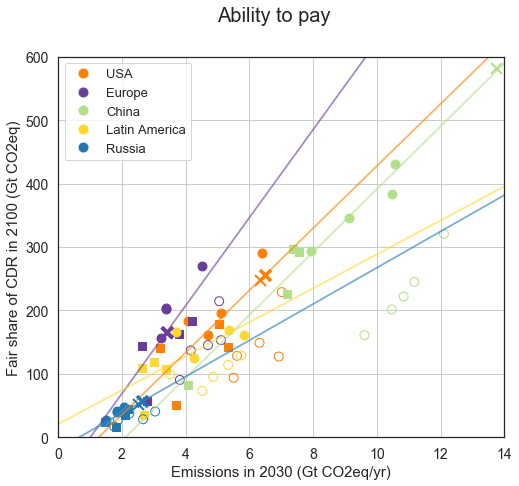

In [65]:
# Regression Plot with all models  GDP - country specific


# x_variable = 'em_change'
x_variable = 'CO2_Emissions'
#y_variable = 'CUM_CDR_fair_share_by_CUM_POP'
y_variable = 'CUM_CDR_fair_share_by_GDP'
# y_variable = 'CUM_CDR'


x_df = allmodels_regions.loc[allmodels_regions.Year == 2030]
y_df = allmodels_regions.loc[allmodels_regions.Year == 2100]
x_var = x_df[x_variable]/1000
y_var = y_df[y_variable]/1000

x_df_USA = allmodels_USA.loc[allmodels_USA.Year == 2030]
y_df_USA = allmodels_USA.loc[allmodels_USA.Year == 2100]
x_var_USA = x_df_USA[x_variable]/1000
y_var_USA = y_df_USA[y_variable]/1000

x_df_USA_2 = allmodels_USA_2.loc[allmodels_USA_2.Year == 2030]
y_df_USA_2 = allmodels_USA_2.loc[allmodels_USA_2.Year == 2100]
x_var_USA_2 = x_df_USA_2[x_variable]/1000
y_var_USA_2 = y_df_USA_2[y_variable]/1000

x_df_USA_15 = allmodels_USA_15.loc[allmodels_USA_15.Year == 2030]
y_df_USA_15 = allmodels_USA_15.loc[allmodels_USA_15.Year == 2100]
x_var_USA_15 = x_df_USA_15[x_variable]/1000
y_var_USA_15 = y_df_USA_15[y_variable]/1000

x_df_USA_15_lo = allmodels_USA_15_lo.loc[allmodels_USA_15_lo.Year == 2030]
y_df_USA_15_lo = allmodels_USA_15_lo.loc[allmodels_USA_15_lo.Year == 2100]
x_var_USA_15_lo = x_df_USA_15_lo[x_variable]/1000
y_var_USA_15_lo = y_df_USA_15_lo[y_variable]/1000

x_df_USA_15_ho = allmodels_USA_15_ho.loc[allmodels_USA_15_ho.Year == 2030]
y_df_USA_15_ho = allmodels_USA_15_ho.loc[allmodels_USA_15_ho.Year == 2100]
x_var_USA_15_ho = x_df_USA_15_ho[x_variable]/1000
y_var_USA_15_ho = y_df_USA_15_ho[y_variable]/1000


x_df_CHN = allmodels_CHN.loc[allmodels_CHN.Year == 2030]
y_df_CHN = allmodels_CHN.loc[allmodels_CHN.Year == 2100]
x_var_CHN = x_df_CHN[x_variable]/1000
y_var_CHN = y_df_CHN[y_variable]/1000

x_df_CHN_2 = allmodels_CHN_2.loc[allmodels_CHN_2.Year == 2030]
y_df_CHN_2 = allmodels_CHN_2.loc[allmodels_CHN_2.Year == 2100]
x_var_CHN_2 = x_df_CHN_2[x_variable]/1000
y_var_CHN_2 = y_df_CHN_2[y_variable]/1000

x_df_CHN_15 = allmodels_CHN_15.loc[allmodels_CHN_15.Year == 2030]
y_df_CHN_15 = allmodels_CHN_15.loc[allmodels_CHN_15.Year == 2100]
x_var_CHN_15 = x_df_CHN_15[x_variable]/1000
y_var_CHN_15 = y_df_CHN_15[y_variable]/1000

x_df_CHN_15_lo = allmodels_CHN_15_lo.loc[allmodels_CHN_15_lo.Year == 2030]
y_df_CHN_15_lo = allmodels_CHN_15_lo.loc[allmodels_CHN_15_lo.Year == 2100]
x_var_CHN_15_lo = x_df_CHN_15_lo[x_variable]/1000
y_var_CHN_15_lo = y_df_CHN_15_lo[y_variable]/1000

x_df_CHN_15_ho = allmodels_CHN_15_ho.loc[allmodels_CHN_15_ho.Year == 2030]
y_df_CHN_15_ho = allmodels_CHN_15_ho.loc[allmodels_CHN_15_ho.Year == 2100]
x_var_CHN_15_ho = x_df_CHN_15_ho[x_variable]/1000
y_var_CHN_15_ho = y_df_CHN_15_ho[y_variable]/1000

x_df_EUR = allmodels_EUR.loc[allmodels_EUR.Year == 2030]
y_df_EUR = allmodels_EUR.loc[allmodels_EUR.Year == 2100]
x_var_EUR = x_df_EUR[x_variable]/1000
y_var_EUR = y_df_EUR[y_variable]/1000

x_df_EUR_2 = allmodels_EUR_2.loc[allmodels_EUR_2.Year == 2030]
y_df_EUR_2 = allmodels_EUR_2.loc[allmodels_EUR_2.Year == 2100]
x_var_EUR_2 = x_df_EUR_2[x_variable]/1000
y_var_EUR_2 = y_df_EUR_2[y_variable]/1000

x_df_EUR_15 = allmodels_EUR_15.loc[allmodels_EUR_15.Year == 2030]
y_df_EUR_15 = allmodels_EUR_15.loc[allmodels_EUR_15.Year == 2100]
x_var_EUR_15 = x_df_EUR_15[x_variable]/1000
y_var_EUR_15 = y_df_EUR_15[y_variable]/1000

x_df_EUR_15_lo = allmodels_EUR_15_lo.loc[allmodels_EUR_15_lo.Year == 2030]
y_df_EUR_15_lo = allmodels_EUR_15_lo.loc[allmodels_EUR_15_lo.Year == 2100]
x_var_EUR_15_lo = x_df_EUR_15_lo[x_variable]/1000
y_var_EUR_15_lo = y_df_EUR_15_lo[y_variable]/1000

x_df_EUR_15_ho = allmodels_EUR_15_ho.loc[allmodels_EUR_15_ho.Year == 2030]
y_df_EUR_15_ho = allmodels_EUR_15_ho.loc[allmodels_EUR_15_ho.Year == 2100]
x_var_EUR_15_ho = x_df_EUR_15_ho[x_variable]/1000
y_var_EUR_15_ho = y_df_EUR_15_ho[y_variable]/1000


x_df_RUS = allmodels_RUS.loc[allmodels_RUS.Year == 2030]
y_df_RUS = allmodels_RUS.loc[allmodels_RUS.Year == 2100]
x_var_RUS = x_df_RUS[x_variable]/1000
y_var_RUS = y_df_RUS[y_variable]/1000

x_df_RUS_2 = allmodels_RUS_2.loc[allmodels_RUS_2.Year == 2030]
y_df_RUS_2 = allmodels_RUS_2.loc[allmodels_RUS_2.Year == 2100]
x_var_RUS_2 = x_df_RUS_2[x_variable]/1000
y_var_RUS_2 = y_df_RUS_2[y_variable]/1000

x_df_RUS_15 = allmodels_RUS_15.loc[allmodels_RUS_15.Year == 2030]
y_df_RUS_15 = allmodels_RUS_15.loc[allmodels_RUS_15.Year == 2100]
x_var_RUS_15 = x_df_RUS_15[x_variable]/1000
y_var_RUS_15 = y_df_RUS_15[y_variable]/1000

x_df_RUS_15_lo = allmodels_RUS_15_lo.loc[allmodels_RUS_15_lo.Year == 2030]
y_df_RUS_15_lo = allmodels_RUS_15_lo.loc[allmodels_RUS_15_lo.Year == 2100]
x_var_RUS_15_lo = x_df_RUS_15_lo[x_variable]/1000
y_var_RUS_15_lo = y_df_RUS_15_lo[y_variable]/1000

x_df_RUS_15_ho = allmodels_RUS_15_ho.loc[allmodels_RUS_15_ho.Year == 2030]
y_df_RUS_15_ho = allmodels_RUS_15_ho.loc[allmodels_RUS_15_ho.Year == 2100]
x_var_RUS_15_ho = x_df_RUS_15_ho[x_variable]/1000
y_var_RUS_15_ho = y_df_RUS_15_ho[y_variable]/1000


x_df_LAM = allmodels_LAM.loc[allmodels_LAM.Year == 2030]
y_df_LAM = allmodels_LAM.loc[allmodels_LAM.Year == 2100]
x_var_LAM = x_df_LAM[x_variable]/1000
y_var_LAM = y_df_LAM[y_variable]/1000

x_df_LAM_2 = allmodels_LAM_2.loc[allmodels_LAM_2.Year == 2030]
y_df_LAM_2 = allmodels_LAM_2.loc[allmodels_LAM_2.Year == 2100]
x_var_LAM_2 = x_df_LAM_2[x_variable]/1000
y_var_LAM_2 = y_df_LAM_2[y_variable]/1000

x_df_LAM_15 = allmodels_LAM_15.loc[allmodels_LAM_15.Year == 2030]
y_df_LAM_15 = allmodels_LAM_15.loc[allmodels_LAM_15.Year == 2100]
x_var_LAM_15 = x_df_LAM_15[x_variable]/1000
y_var_LAM_15 = y_df_LAM_15[y_variable]/1000

x_df_LAM_15_lo = allmodels_LAM_15_lo.loc[allmodels_LAM_15_lo.Year == 2030]
y_df_LAM_15_lo = allmodels_LAM_15_lo.loc[allmodels_LAM_15_lo.Year == 2100]
x_var_LAM_15_lo = x_df_LAM_15_lo[x_variable]/1000
y_var_LAM_15_lo = y_df_LAM_15_lo[y_variable]/1000

x_df_LAM_15_ho = allmodels_LAM_15_ho.loc[allmodels_LAM_15_ho.Year == 2030]
y_df_LAM_15_ho = allmodels_LAM_15_ho.loc[allmodels_LAM_15_ho.Year == 2100]
x_var_LAM_15_ho = x_df_LAM_15_ho[x_variable]/1000
y_var_LAM_15_ho = y_df_LAM_15_ho[y_variable]/1000





region_USA=['USA']
USA_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_USA)) & (allmodels_df.Year==2030)].copy()
USA_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_USA)) & (allmodels_df.Year==2100)].copy()
USA_mix = USA_2030.append(USA_2100)

region_EUR=['EUR']
EUR_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_EUR)) & (allmodels_df.Year==2030)].copy()
EUR_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_EUR)) & (allmodels_df.Year==2100)].copy()
EUR_mix = EUR_2030.append(EUR_2100)

region_AFR=['AFR']
AFR_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_AFR)) & (allmodels_df.Year==2030)].copy()
AFR_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_AFR)) & (allmodels_df.Year==2100)].copy()
AFR_mix = AFR_2030.append(AFR_2100)

region_CHN=['CHN']
CHN_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_CHN)) & (allmodels_df.Year==2030)].copy()
CHN_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_CHN)) & (allmodels_df.Year==2100)].copy()
CHN_mix = CHN_2030.append(CHN_2100)

region_IND=['IND']
IND_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_IND)) & (allmodels_df.Year==2030)].copy()
IND_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_IND)) & (allmodels_df.Year==2100)].copy()
IND_mix = IND_2030.append(IND_2100)

region_LAM=['LAM']
LAM_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_LAM)) & (allmodels_df.Year==2030)].copy()
LAM_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_LAM)) & (allmodels_df.Year==2100)].copy()
LAM_mix = LAM_2030.append(LAM_2100)

region_RUS=['RUS']
RUS_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_RUS)) & (allmodels_df.Year==2030)].copy()
RUS_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_RUS)) & (allmodels_df.Year==2100)].copy()
RUS_mix = RUS_2030.append(RUS_2100)


sns.set_style("white")


plt.figure(figsize=(8,7))

plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)


colours = sns.color_palette("Paired",12)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],col_lam[5], colours[9]]

col_lam = sns.color_palette("Set2", 6)
#CHN 3 IND 0, RUS 1, USA 2, AFR 4, LAM 5, EUR 6


for sce in scen_15_lo:
    x_USA = USA_mix.loc[(USA_mix.Year==2030) & (USA_mix.Scenario == sce)]
    x_USA = x_USA[x_variable]/1000
    y_USA = USA_mix.loc[(USA_mix.Year==2100) & (USA_mix.Scenario == sce)]
    y_USA = y_USA[y_variable]/1000
    plt.scatter(x_USA, y_USA, color = colours[7], marker = 's', label = 'USA', s = 80)
    
for sce in scen_15_ho:
    x_USA = USA_mix.loc[(USA_mix.Year==2030) & (USA_mix.Scenario == sce)]
    x_USA = x_USA[x_variable]/1000
    y_USA = USA_mix.loc[(USA_mix.Year==2100) & (USA_mix.Scenario == sce)]
    y_USA = y_USA[y_variable]/1000
    plt.scatter(x_USA, y_USA, color = colours[7], marker = 'o', label = 'USA', s = 80)
    
for sce in scen_2:
    x_USA = USA_mix.loc[(USA_mix.Year==2030) & (USA_mix.Scenario == sce)]
    x_USA = x_USA[x_variable]/1000
    y_USA = USA_mix.loc[(USA_mix.Year==2100) & (USA_mix.Scenario == sce)]
    y_USA = y_USA[y_variable]/1000
    plt.scatter(x_USA, y_USA, color = colours[7], marker = 'o', facecolors='none', s = 80)

for sce in scen_15_lo:
    x_EUR = EUR_mix.loc[(EUR_mix.Year==2030) & (EUR_mix.Scenario == sce)]
    x_EUR = x_EUR[x_variable]/1000
    y_EUR = EUR_mix.loc[(EUR_mix.Year==2100) & (EUR_mix.Scenario == sce)]
    y_EUR = y_EUR[y_variable]/1000
    plt.scatter(x_EUR, y_EUR, color = colours[9], marker = 's',  label = 'EUR', s = 80)
    
for sce in scen_15_ho:
    x_EUR = EUR_mix.loc[(EUR_mix.Year==2030) & (EUR_mix.Scenario == sce)]
    x_EUR = x_EUR[x_variable]/1000
    y_EUR = EUR_mix.loc[(EUR_mix.Year==2100) & (EUR_mix.Scenario == sce)]
    y_EUR = y_EUR[y_variable]/1000
    plt.scatter(x_EUR, y_EUR, color = colours[9], marker = 'o',  label = 'EUR', s = 80)

for sce in scen_2:
    x_EUR = EUR_mix.loc[(EUR_mix.Year==2030) & (EUR_mix.Scenario == sce)]
    x_EUR = x_EUR[x_variable]/1000
    y_EUR = EUR_mix.loc[(EUR_mix.Year==2100) & (EUR_mix.Scenario == sce)]
    y_EUR = y_EUR[y_variable]/1000
    plt.scatter(x_EUR, y_EUR, color = colours[9], marker = 'o', facecolors='none', s = 80)
    
for sce in scen_15_lo:
    x_CHN = CHN_mix.loc[(CHN_mix.Year==2030) & (CHN_mix.Scenario == sce)]
    x_CHN = x_CHN[x_variable]/1000
    y_CHN = CHN_mix.loc[(CHN_mix.Year==2100) & (CHN_mix.Scenario == sce)]
    y_CHN = y_CHN[y_variable]/1000
    plt.scatter(x_CHN, y_CHN, color = colours[2], marker = 's', label = 'CHN', s = 80)
        
for sce in scen_15_ho:
    x_CHN = CHN_mix.loc[(CHN_mix.Year==2030) & (CHN_mix.Scenario == sce)]
    x_CHN = x_CHN[x_variable]/1000
    y_CHN = CHN_mix.loc[(CHN_mix.Year==2100) & (CHN_mix.Scenario == sce)]
    y_CHN = y_CHN[y_variable]/1000
    plt.scatter(x_CHN, y_CHN, color = colours[2], marker = 'o', label = 'CHN', s = 80)
    
for sce in scen_2:
    x_CHN = CHN_mix.loc[(CHN_mix.Year==2030) & (CHN_mix.Scenario == sce)]
    x_CHN = x_CHN[x_variable]/1000
    y_CHN = CHN_mix.loc[(CHN_mix.Year==2100) & (CHN_mix.Scenario == sce)]
    y_CHN = y_CHN[y_variable]/1000
    plt.scatter(x_CHN, y_CHN, color = colours[2], marker = 'o', facecolors='none', s = 80)
    
for sce in scen_15_lo:
    x_LAM = LAM_mix.loc[(LAM_mix.Year==2030) & (LAM_mix.Scenario == sce)]
    x_LAM = x_LAM[x_variable]/1000
    y_LAM = LAM_mix.loc[(LAM_mix.Year==2100) & (LAM_mix.Scenario == sce)]
    y_LAM = y_LAM[y_variable]/1000
    plt.scatter(x_LAM, y_LAM, color = col_lam[5], marker = 's', label = 'LAM', s = 80)
    
for sce in scen_15_ho:
    x_LAM = LAM_mix.loc[(LAM_mix.Year==2030) & (LAM_mix.Scenario == sce)]
    x_LAM = x_LAM[x_variable]/1000
    y_LAM = LAM_mix.loc[(LAM_mix.Year==2100) & (LAM_mix.Scenario == sce)]
    y_LAM = y_LAM[y_variable]/1000
    plt.scatter(x_LAM, y_LAM, color = col_lam[5], marker = 'o', label = 'LAM', s = 80)
    
for sce in scen_2:
    x_LAM = LAM_mix.loc[(LAM_mix.Year==2030) & (LAM_mix.Scenario == sce)]
    x_LAM = x_LAM[x_variable]/1000
    y_LAM = LAM_mix.loc[(LAM_mix.Year==2100) & (LAM_mix.Scenario == sce)]
    y_LAM = y_LAM[y_variable]/1000
    plt.scatter(x_LAM, y_LAM, color = col_lam[5], marker = 'o', facecolors='none', s = 80)  
    
for sce in scen_15_lo:
    x_RUS = RUS_mix.loc[(RUS_mix.Year==2030) & (RUS_mix.Scenario == sce)]
    x_RUS = x_RUS[x_variable]/1000
    y_RUS = RUS_mix.loc[(RUS_mix.Year==2100) & (RUS_mix.Scenario == sce)]
    y_RUS = y_RUS[y_variable]/1000
    plt.scatter(x_RUS, y_RUS, color = colours[1], marker = 's', label = 'RUS', s = 80)
    
for sce in scen_15_ho:
    x_RUS = RUS_mix.loc[(RUS_mix.Year==2030) & (RUS_mix.Scenario == sce)]
    x_RUS = x_RUS[x_variable]/1000
    y_RUS = RUS_mix.loc[(RUS_mix.Year==2100) & (RUS_mix.Scenario == sce)]
    y_RUS = y_RUS[y_variable]/1000
    plt.scatter(x_RUS, y_RUS, color = colours[1], marker = 'o', label = 'RUS', s = 80)

for sce in scen_2:
    x_RUS = RUS_mix.loc[(RUS_mix.Year==2030) & (RUS_mix.Scenario == sce)]
    x_RUS = x_RUS[x_variable]/1000
    y_RUS = RUS_mix.loc[(RUS_mix.Year==2100) & (RUS_mix.Scenario == sce)]
    y_RUS = y_RUS[y_variable]/1000
    plt.scatter(x_RUS, y_RUS, color = colours[1], marker = 'o', facecolors='none', s = 80) 

plt.ylim(0,600)
plt.xlim(0,14)
#plt.title("y=%.6fx+%.6f"%(z[0],z[1]))  # equation of trend line

x = np.linspace(0,13,100)
y= 37.17*x+4.48
#plt.plot(x, y, '-b')
#CHN 3 IND 0, RUS 1, USA 2, AFR 4, LAM 5, EUR 6

sns.regplot(x = x_var_EUR_15, y = y_var_EUR_15, ci = 0, color = colours[9], scatter = False, line_kws={"lw": 1.8, "alpha":0.6})
sns.regplot(x = x_var_CHN_15, y = y_var_CHN_15, ci = 0, color = colours[2], scatter = False, line_kws={"lw": 1.8, "alpha":0.6})
sns.regplot(x = x_var_RUS_15, y = y_var_RUS_15, ci = 0, color = colours[1], scatter = False, line_kws={"lw": 1.8, "alpha":0.6})
sns.regplot(x = x_var_LAM_15, y = y_var_LAM_15, ci = 0, color = col_lam[5], scatter = False, line_kws={"lw": 1.8, "alpha":0.6})
sns.regplot(x = x_var_USA_15, y = y_var_USA_15, ci = 0, color = colours[7], scatter = False, line_kws={"lw": 1.8, "alpha":0.6})



#plt.text(12.5, 160.5, 'y = 14.18 x + 35.13', fontsize = 12)
#plt.text(65,230,'y={:.2f}+{:.2f}*x'.format(z[1],z[0]),color='darkblue',size=12)
plt.suptitle('Ability to pay', fontsize = 20)

plt.legend(handles=[Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[7], label = 'USA'),
            Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[9], label = 'Europe'),
             Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[2], label = 'China'),
              Line2D([0], [0], linestyle = 'none', marker = 'o', color=col_lam[5], label = 'Latin America'),
               Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[1], label = 'Russia')],
           markerscale = 1.5, fontsize = 13)
plt.grid(True)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.plot(NDC_EUR['X_min'], NDC_EUR['Y_AP_min'], ms = 11, mew = 2, marker = 'x', color = colours[9])
plt.plot(NDC_EUR['X_max'], NDC_EUR['Y_AP_max'], ms = 11, mew = 3.5, marker = 'x', color = colours[9])
plt.plot(NDC_USA['X_min'], NDC_USA['Y_AP_min'], ms = 11, mew = 2, marker = 'x', color = colours[7])
plt.plot(NDC_USA['X_max'], NDC_USA['Y_AP_max'], ms = 11, mew = 3.5, marker = 'x', color = colours[7])
plt.plot(NDC_RUS['X_min'], NDC_RUS['Y_AP_min'], ms = 11, mew = 2, marker = 'x', color = colours[1])
plt.plot(NDC_RUS['X_max'], NDC_RUS['Y_AP_max'], ms = 11, mew = 3.5, marker = 'x', color = colours[1])
plt.plot(NDC_CHN['X_min'], NDC_CHN['Y_AP_min'], ms = 11, mew = 2, marker = 'x', color = colours[2])
plt.plot(NDC_CHN['X_max'], NDC_CHN['Y_AP_max'], ms = 11, mew = 3.5, marker = 'x', color = colours[2])


plt.xlabel('Emissions in 2030 (Gt CO2eq/yr)', fontsize = 15)
plt.ylabel('Fair share of CDR in 2100 (Gt CO2eq)', fontsize = 15)

# plt.tight_layout()
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Scatter AP_15.png')
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Scatter AP_15.svg', dpi = 300, transparent = True)


In [57]:
# x_variable = 'em_change'
x_variable = 'CO2_Emissions'
#y_variable = 'CUM_CDR_fair_share_by_CUM_POP'
y_variable = 'CUM_CDR_fair_share_by_GDP'
#y_variable = 'CUM_CDR'


X = np.array(x_df_EUR_15[x_variable]/1000).reshape((-1,1))
Y = y_df_EUR_15[y_variable]/1000
linreg = LinearRegression()
model = linreg.fit(X, Y)
print(f'alpha = {model.intercept_}')
#print(f'alpha 1.5 = {model.coef_}')

X = np.array(x_df_USA_15_ho[x_variable]/1000).reshape((-1,1))
Y = y_df_USA_15_ho[y_variable]/1000
linreg = LinearRegression()
model = linreg.fit(X, Y)
#print(f'alpha = {model.intercept_}')
print(f'alpha 1.5ho = {model.coef_}')

X = np.array(x_df_EUR_2[x_variable]/1000).reshape((-1,1))
Y = y_df_EUR_2[y_variable]/1000
linreg = LinearRegression()
model = linreg.fit(X, Y)
#print(f'alpha = {model.intercept_}')
print(f'alpha 2 = {model.coef_}')

X = np.array(x_df[x_variable]/1000).reshape((-1,1))
Y = y_df[y_variable]/1000
linreg = LinearRegression()
model = linreg.fit(X, Y)
#print(f'alpha = {model.intercept_}')
print(f'alpha all = {model.coef_}')



alpha = -70.19461026760237
alpha 1.5ho = [51.98275673]
alpha 2 = [64.82055111]
alpha all = [28.53420696]


In [19]:
import statsmodels.api as sm
Y = list(y_var_EUR)
X = sm.add_constant(x_var_EUR)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     3.182
Date:                Wed, 06 Nov 2019   Prob (F-statistic):              0.112
Time:                        12:42:16   Log-Likelihood:                -51.896
No. Observations:                  10   AIC:                             107.8
Df Residuals:                       8   BIC:                             108.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.2379     79.456      0.053

/Users/susannebaur/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/susannebaur/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


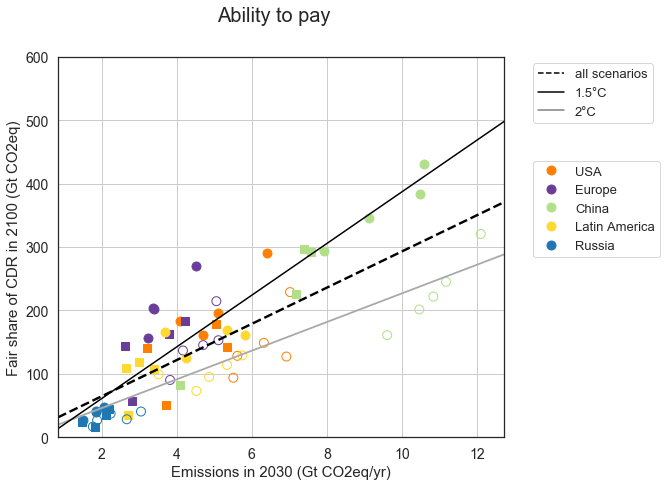

In [70]:
# Regression Plot with all models  GDP - scenarios


# x_variable = 'em_change'
x_variable = 'CO2_Emissions'
#y_variable = 'CUM_CDR_fair_share_by_CUM_POP'
y_variable = 'CUM_CDR_fair_share_by_GDP'
# y_variable = 'CUM_CDR'


x_df = allmodels_regions.loc[allmodels_regions.Year == 2030]
y_df = allmodels_regions.loc[allmodels_regions.Year == 2100]
x_var = x_df[x_variable]/1000
y_var = y_df[y_variable]/1000

x_df_2 = allmodels_regions_2.loc[allmodels_regions_2.Year == 2030]
y_df_2 = allmodels_regions_2.loc[allmodels_regions_2.Year == 2100]
x_var_2 = x_df_2[x_variable]/1000
y_var_2 = y_df_2[y_variable]/1000

x_df_15 = allmodels_regions_15.loc[allmodels_regions_15.Year == 2030]
y_df_15 = allmodels_regions_15.loc[allmodels_regions_15.Year == 2100]
x_var_15 = x_df_15[x_variable]/1000
y_var_15 = y_df_15[y_variable]/1000

x_df_15_lo = allmodels_regions_15_lo.loc[allmodels_regions_15_lo.Year == 2030]
y_df_15_lo = allmodels_regions_15_lo.loc[allmodels_regions_15_lo.Year == 2100]
x_var_15_lo = x_df_15_lo[x_variable]/1000
y_var_15_lo = y_df_15_lo[y_variable]/1000

x_df_15_ho = allmodels_regions_15_ho.loc[allmodels_regions_15_ho.Year == 2030]
y_df_15_ho = allmodels_regions_15_ho.loc[allmodels_regions_15_ho.Year == 2100]
x_var_15_ho = x_df_15_ho[x_variable]/1000
y_var_15_ho = y_df_15_ho[y_variable]/1000



region_USA=['USA']
USA_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_USA)) & (allmodels_df.Year==2030)].copy()
USA_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_USA)) & (allmodels_df.Year==2100)].copy()
USA_mix = USA_2030.append(USA_2100)

region_EUR=['EUR']
EUR_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_EUR)) & (allmodels_df.Year==2030)].copy()
EUR_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_EUR)) & (allmodels_df.Year==2100)].copy()
EUR_mix = EUR_2030.append(EUR_2100)

region_AFR=['AFR']
AFR_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_AFR)) & (allmodels_df.Year==2030)].copy()
AFR_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_AFR)) & (allmodels_df.Year==2100)].copy()
AFR_mix = AFR_2030.append(AFR_2100)

region_CHN=['CHN']
CHN_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_CHN)) & (allmodels_df.Year==2030)].copy()
CHN_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_CHN)) & (allmodels_df.Year==2100)].copy()
CHN_mix = CHN_2030.append(CHN_2100)

region_IND=['IND']
IND_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_IND)) & (allmodels_df.Year==2030)].copy()
IND_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_IND)) & (allmodels_df.Year==2100)].copy()
IND_mix = IND_2030.append(IND_2100)

region_LAM=['LAM']
LAM_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_LAM)) & (allmodels_df.Year==2030)].copy()
LAM_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_LAM)) & (allmodels_df.Year==2100)].copy()
LAM_mix = LAM_2030.append(LAM_2100)

region_RUS=['RUS']
RUS_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_RUS)) & (allmodels_df.Year==2030)].copy()
RUS_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_RUS)) & (allmodels_df.Year==2100)].copy()
RUS_mix = RUS_2030.append(RUS_2100)


sns.set_style("white")


plt.figure(figsize=(8,7))

plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)


colours = sns.color_palette("Paired",12)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],col_lam[5], colours[9]]

col_lam = sns.color_palette("Set2", 6)
#pal_LAM = [col_lam[5]]



for sce in scen_15_lo:
    x_USA = USA_mix.loc[(USA_mix.Year==2030) & (USA_mix.Scenario == sce)]
    x_USA = x_USA[x_variable]/1000
    y_USA = USA_mix.loc[(USA_mix.Year==2100) & (USA_mix.Scenario == sce)]
    y_USA = y_USA[y_variable]/1000
    plt.scatter(x_USA, y_USA, color = colours[7], marker = 's', label = 'USA', s = 80)
    
for sce in scen_15_ho:
    x_USA = USA_mix.loc[(USA_mix.Year==2030) & (USA_mix.Scenario == sce)]
    x_USA = x_USA[x_variable]/1000
    y_USA = USA_mix.loc[(USA_mix.Year==2100) & (USA_mix.Scenario == sce)]
    y_USA = y_USA[y_variable]/1000
    plt.scatter(x_USA, y_USA, color = colours[7], marker = 'o', label = 'USA', s = 80)
    
for sce in scen_2:
    x_USA = USA_mix.loc[(USA_mix.Year==2030) & (USA_mix.Scenario == sce)]
    x_USA = x_USA[x_variable]/1000
    y_USA = USA_mix.loc[(USA_mix.Year==2100) & (USA_mix.Scenario == sce)]
    y_USA = y_USA[y_variable]/1000
    plt.scatter(x_USA, y_USA, color = colours[7], marker = 'o', facecolors='none', s = 80)

for sce in scen_15_lo:
    x_EUR = EUR_mix.loc[(EUR_mix.Year==2030) & (EUR_mix.Scenario == sce)]
    x_EUR = x_EUR[x_variable]/1000
    y_EUR = EUR_mix.loc[(EUR_mix.Year==2100) & (EUR_mix.Scenario == sce)]
    y_EUR = y_EUR[y_variable]/1000
    plt.scatter(x_EUR, y_EUR, color = colours[9], marker = 's',  label = 'EUR', s = 80)
    
for sce in scen_15_ho:
    x_EUR = EUR_mix.loc[(EUR_mix.Year==2030) & (EUR_mix.Scenario == sce)]
    x_EUR = x_EUR[x_variable]/1000
    y_EUR = EUR_mix.loc[(EUR_mix.Year==2100) & (EUR_mix.Scenario == sce)]
    y_EUR = y_EUR[y_variable]/1000
    plt.scatter(x_EUR, y_EUR, color = colours[9], marker = 'o',  label = 'EUR', s = 80)

for sce in scen_2:
    x_EUR = EUR_mix.loc[(EUR_mix.Year==2030) & (EUR_mix.Scenario == sce)]
    x_EUR = x_EUR[x_variable]/1000
    y_EUR = EUR_mix.loc[(EUR_mix.Year==2100) & (EUR_mix.Scenario == sce)]
    y_EUR = y_EUR[y_variable]/1000
    plt.scatter(x_EUR, y_EUR, color = colours[9], marker = 'o', facecolors='none', s = 80)
    
for sce in scen_15_lo:
    x_CHN = CHN_mix.loc[(CHN_mix.Year==2030) & (CHN_mix.Scenario == sce)]
    x_CHN = x_CHN[x_variable]/1000
    y_CHN = CHN_mix.loc[(CHN_mix.Year==2100) & (CHN_mix.Scenario == sce)]
    y_CHN = y_CHN[y_variable]/1000
    plt.scatter(x_CHN, y_CHN, color = colours[2], marker = 's', label = 'CHN', s = 80)
        
for sce in scen_15_ho:
    x_CHN = CHN_mix.loc[(CHN_mix.Year==2030) & (CHN_mix.Scenario == sce)]
    x_CHN = x_CHN[x_variable]/1000
    y_CHN = CHN_mix.loc[(CHN_mix.Year==2100) & (CHN_mix.Scenario == sce)]
    y_CHN = y_CHN[y_variable]/1000
    plt.scatter(x_CHN, y_CHN, color = colours[2], marker = 'o', label = 'CHN', s = 80)
    
for sce in scen_2:
    x_CHN = CHN_mix.loc[(CHN_mix.Year==2030) & (CHN_mix.Scenario == sce)]
    x_CHN = x_CHN[x_variable]/1000
    y_CHN = CHN_mix.loc[(CHN_mix.Year==2100) & (CHN_mix.Scenario == sce)]
    y_CHN = y_CHN[y_variable]/1000
    plt.scatter(x_CHN, y_CHN, color = colours[2], marker = 'o', facecolors='none', s = 80)
    
for sce in scen_15_lo:
    x_LAM = LAM_mix.loc[(LAM_mix.Year==2030) & (LAM_mix.Scenario == sce)]
    x_LAM = x_LAM[x_variable]/1000
    y_LAM = LAM_mix.loc[(LAM_mix.Year==2100) & (LAM_mix.Scenario == sce)]
    y_LAM = y_LAM[y_variable]/1000
    plt.scatter(x_LAM, y_LAM, color = col_lam[5], marker = 's', label = 'LAM', s = 80)
        
for sce in scen_15_ho:
    x_LAM = LAM_mix.loc[(LAM_mix.Year==2030) & (LAM_mix.Scenario == sce)]
    x_LAM = x_LAM[x_variable]/1000
    y_LAM = LAM_mix.loc[(LAM_mix.Year==2100) & (LAM_mix.Scenario == sce)]
    y_LAM = y_LAM[y_variable]/1000
    plt.scatter(x_LAM, y_LAM, color = col_lam[5], marker = 'o', label = 'LAM', s = 80)
    
for sce in scen_2:
    x_LAM = LAM_mix.loc[(LAM_mix.Year==2030) & (LAM_mix.Scenario == sce)]
    x_LAM = x_LAM[x_variable]/1000
    y_LAM = LAM_mix.loc[(LAM_mix.Year==2100) & (LAM_mix.Scenario == sce)]
    y_LAM = y_LAM[y_variable]/1000
    plt.scatter(x_LAM, y_LAM, color = col_lam[5], marker = 'o', facecolors='none', s = 80)  
    
for sce in scen_15_lo:
    x_RUS = RUS_mix.loc[(RUS_mix.Year==2030) & (RUS_mix.Scenario == sce)]
    x_RUS = x_RUS[x_variable]/1000
    y_RUS = RUS_mix.loc[(RUS_mix.Year==2100) & (RUS_mix.Scenario == sce)]
    y_RUS = y_RUS[y_variable]/1000
    plt.scatter(x_RUS, y_RUS, color = colours[1], marker = 's', label = 'RUS', s = 80)
    
for sce in scen_15_ho:
    x_RUS = RUS_mix.loc[(RUS_mix.Year==2030) & (RUS_mix.Scenario == sce)]
    x_RUS = x_RUS[x_variable]/1000
    y_RUS = RUS_mix.loc[(RUS_mix.Year==2100) & (RUS_mix.Scenario == sce)]
    y_RUS = y_RUS[y_variable]/1000
    plt.scatter(x_RUS, y_RUS, color = colours[1], marker = 'o', label = 'RUS', s = 80)

for sce in scen_2:
    x_RUS = RUS_mix.loc[(RUS_mix.Year==2030) & (RUS_mix.Scenario == sce)]
    x_RUS = x_RUS[x_variable]/1000
    y_RUS = RUS_mix.loc[(RUS_mix.Year==2100) & (RUS_mix.Scenario == sce)]
    y_RUS = y_RUS[y_variable]/1000
    plt.scatter(x_RUS, y_RUS, color = colours[1], marker = 'o', facecolors='none', s = 80) 

    
#adding linear regression 


xy = sns.regplot(x = x_var, y = y_var, ci = 0, color = 'black', scatter = False, line_kws={"lw": 2.4})
xy = sns.regplot(x = x_var_2, y = y_var_2, ci = 0, color = 'darkgrey', scatter = False, line_kws={"lw": 1.8})
#xy = sns.regplot(x = x_var_15_lo, y = y_var_15_lo, ci = 0, color = 'black', scatter = False, line_kws={"lw": 1.5})
#xy = sns.regplot(x = x_var_15_ho, y = y_var_15_ho, ci = 0, color = 'lightgrey', scatter = False, line_kws={"lw": 1.8})
xy = sns.regplot(x = x_var_15, y = y_var_15, ci = 0, color = 'black', scatter = False, line_kws={"lw": 1.5})

xy.lines[0].set_linestyle("--")


z = np.polyfit(x_var, y_var, 1)
p = np.poly1d(z)
#plt.plot(x_var, p(x_var), 'white')

#plt.text(7, 175.5, "y = %.6fx + %.6f"%(z[0],z[1]), fontsize = 12)


#plt.title("y=%.6fx+%.6f"%(z[0],z[1]))  # equation of trend line
plt.suptitle('Ability to pay', fontsize = 20)


###legend
l = plt.legend(handles=[Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[7], label = 'USA'),
            Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[9], label = 'Europe'),
             Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[2], label = 'China'),
              Line2D([0], [0], linestyle = 'none', marker = 'o', color=col_lam[5], label = 'Latin America'),
               Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[1], label = 'Russia')],
           bbox_to_anchor=(1.05, 0.6), loc = 'center left',markerscale = 1.5, fontsize = 13)

l2 = plt.legend(handles=[Line2D([0], [0], color="black", linestyle = 'dashed',label = 'all scenarios'),
                         Line2D([0], [0], color="black", label = '1.5°C'),
                       #  Line2D([0], [0], color="lightgrey", label = '1.5°C high OS'),
                         Line2D([0], [0], color="grey", label = '2°C')],
                bbox_to_anchor=(1.05, 1), loc = 'upper left',markerscale = 1.5, fontsize = 13)    
plt.gca().add_artist(l)
### bbox_to_anchor=(1.05, 1), loc='upper left'


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


#plt.legend(handles = bbox_to_anchor=(1.17,0.33), ncol=2, loc= 'upper left')
plt.grid(True)
#leg = plt.legend(['IMAGE SSP1 1.5°C','IMAGE SSP2 LF','REMIND SSP1 1.5°C','REMIND SSP2 1.5°C', 'REMIND SSP1 2.0°C', 'REMIND SSP2 2.0°C', 'REMIND SSP5 1.5°C', 'REMIND SSP5 2.0°C'], bbox_to_anchor=(1.17,0.33), ncol=2, loc= 'upper left')
#plt.gca().legend(USA_mix['Scenario'], bbox_to_anchor=(1.17,0.33), ncol=2, loc= 'upper left')

plt.xlabel('Emissions in 2030 (Gt CO2eq/yr)', fontsize = 15)
plt.ylabel('Fair share of CDR in 2100 (Gt CO2eq)', fontsize = 15)
plt.ylim(0,600)
# plt.tight_layout()
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Supp - Scatter AP_leg.png',bbox_inches= 'tight')
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Supp - Scatter AP_leg.svg',bbox_inches= 'tight', dpi = 300, transparent = True)

# equation of trend line:   y = 14.18 x + 35.13

In [21]:
## Scatterplot as table

# x_variable = 'em_change'
x_variable = 'CO2_Emissions'
#y_variable = 'CUM_CDR_fair_share_by_CUM_POP'
y_variable = 'CUM_CDR_fair_share_by_GDP'
#y_variable = 'CUM_CDR'

regions=['RUS', 'USA', 'CHN', 'EUR', 'LAM']
emissions_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(regions)) & (allmodels_df.Year==2030)].copy()
CDR_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(regions)) & (allmodels_df.Year==2100)].copy()

emissions_2030 = emissions_2030[['Region', 'MODEL', 'Scenario', 'Year', 'CO2_Emissions']]
CDR_2100 = CDR_2100[['Region', 'MODEL', 'Scenario', 'Year', 'CUM_CDR_fair_share_by_GDP']]


emissions_2030 = emissions_2030.reset_index(drop = True)
emissions_2030 = emissions_2030.round(2)

CDR_2100 = CDR_2100.reset_index(drop = True)
CDR_2100 = CDR_2100.round(2)



emissions_2030['Scen_category'] = ''

conditions = [
    (emissions_2030['Scenario'].isin(scen_15_lo)),
    (emissions_2030['Scenario'].isin(scen_2)), 
    (emissions_2030['Scenario'].isin(scen_15_ho))]
choices = ['Scen_15_lo', 'Scen_2', 'Scen_15_ho']
emissions_2030['Scen_category'] = np.select(conditions, choices, default='black')


CDR_2100['Scen_category'] = ''

conditions = [
    (emissions_2030['Scenario'].isin(scen_15_lo)),
    (emissions_2030['Scenario'].isin(scen_2)), 
    (emissions_2030['Scenario'].isin(scen_15_ho))]
choices = ['Scen_15_lo', 'Scen_2', 'Scen_15_ho']
CDR_2100['Scen_category'] = np.select(conditions, choices, default='black')

emissions_2030['Fair Share of CDR in 2100'] = 0

for model in emissions_2030.MODEL.unique():
    model_filt = (emissions_2030.MODEL == model)
    for scen in emissions_2030.Scen_category.unique():
        scen_filt = (emissions_2030.Scen_category == scen)
        for reg in emissions_2030.Region.unique():
            reg_filt = (emissions_2030.Region == reg)
            emissions_2030.loc[model_filt & scen_filt & reg_filt, 'Fair Share of CDR in 2100'] = CDR_2100.loc[model_filt & scen_filt & reg_filt, 'CUM_CDR']

scatter_GDP_scen = emissions_2030[['Region', 'MODEL', 'Scenario', 'CO2_Emissions', 'Scen_category', 'Fair Share of CDR in 2100']]
scatter_GDP_scen = scatter_GDP_scen.rename(columns = {'CO2_Emissions': '2030 CO2_Emissions (GT CO2/yr)', 'Fair Share of CDR in 2100':'Fair Share of CDR in 2100 (Gt CO2eq)'})

scatter_GDP_scen.to_excel(table_path + 'scatter_GDP_scen.xlsx')

KeyError: 'CUM_CDR'

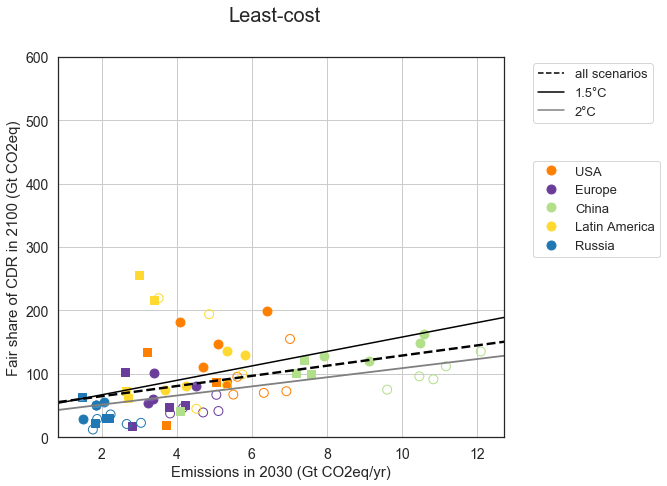

In [71]:
# Regression Plot with all models (IAM output)


# x_variable = 'em_change'
x_variable = 'CO2_Emissions'
#y_variable = 'CUM_CDR_fair_share_by_CUM_POP'
#y_variable = 'CUM_CDR_fair_share_by_GDP'
y_variable = 'CUM_CDR'


x_df = allmodels_regions.loc[allmodels_regions.Year == 2030]
y_df = allmodels_regions.loc[allmodels_regions.Year == 2100]
x_var = x_df[x_variable]/1000
y_var = y_df[y_variable]/1000

x_df_2 = allmodels_regions_2.loc[allmodels_regions_2.Year == 2030]
y_df_2 = allmodels_regions_2.loc[allmodels_regions_2.Year == 2100]
x_var_2 = x_df_2[x_variable]/1000
y_var_2 = y_df_2[y_variable]/1000

x_df_15 = allmodels_regions_15.loc[allmodels_regions_15.Year == 2030]
y_df_15 = allmodels_regions_15.loc[allmodels_regions_15.Year == 2100]
x_var_15 = x_df_15[x_variable]/1000
y_var_15 = y_df_15[y_variable]/1000

x_df_15_lo = allmodels_regions_15_lo.loc[allmodels_regions_15_lo.Year == 2030]
y_df_15_lo = allmodels_regions_15_lo.loc[allmodels_regions_15_lo.Year == 2100]
x_var_15_lo = x_df_15_lo[x_variable]/1000
y_var_15_lo = y_df_15_lo[y_variable]/1000

x_df_15_ho = allmodels_regions_15_ho.loc[allmodels_regions_15_ho.Year == 2030]
y_df_15_ho = allmodels_regions_15_ho.loc[allmodels_regions_15_ho.Year == 2100]
x_var_15_ho = x_df_15_ho[x_variable]/1000
y_var_15_ho = y_df_15_ho[y_variable]/1000




region_USA=['USA']
USA_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_USA)) & (allmodels_df.Year==2030)].copy()
USA_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_USA)) & (allmodels_df.Year==2100)].copy()
USA_mix = USA_2030.append(USA_2100)

region_EUR=['EUR']
EUR_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_EUR)) & (allmodels_df.Year==2030)].copy()
EUR_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_EUR)) & (allmodels_df.Year==2100)].copy()
EUR_mix = EUR_2030.append(EUR_2100)

region_AFR=['AFR']
AFR_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_AFR)) & (allmodels_df.Year==2030)].copy()
AFR_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_AFR)) & (allmodels_df.Year==2100)].copy()
AFR_mix = AFR_2030.append(AFR_2100)

region_CHN=['CHN']
CHN_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_CHN)) & (allmodels_df.Year==2030)].copy()
CHN_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_CHN)) & (allmodels_df.Year==2100)].copy()
CHN_mix = CHN_2030.append(CHN_2100)

region_IND=['IND']
IND_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_IND)) & (allmodels_df.Year==2030)].copy()
IND_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_IND)) & (allmodels_df.Year==2100)].copy()
IND_mix = IND_2030.append(IND_2100)

region_LAM=['LAM']
LAM_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_LAM)) & (allmodels_df.Year==2030)].copy()
LAM_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_LAM)) & (allmodels_df.Year==2100)].copy()
LAM_mix = LAM_2030.append(LAM_2100)

region_RUS=['RUS']
RUS_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_RUS)) & (allmodels_df.Year==2030)].copy()
RUS_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_RUS)) & (allmodels_df.Year==2100)].copy()
RUS_mix = RUS_2030.append(RUS_2100)


sns.set_style("white")


plt.figure(figsize=(8,7))

plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)


colours = sns.color_palette("Paired",12)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],col_lam[5], colours[9]]

col_lam = sns.color_palette("Set2", 6)
#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6


for sce in scen_15_lo:
    x_USA = USA_mix.loc[(USA_mix.Year==2030) & (USA_mix.Scenario == sce)]
    x_USA = x_USA[x_variable]/1000
    y_USA = USA_mix.loc[(USA_mix.Year==2100) & (USA_mix.Scenario == sce)]
    y_USA = y_USA[y_variable]/1000
    plt.scatter(x_USA, y_USA, color = colours[7], marker = 's', label = 'USA', s = 80)
    
for sce in scen_15_ho:
    x_USA = USA_mix.loc[(USA_mix.Year==2030) & (USA_mix.Scenario == sce)]
    x_USA = x_USA[x_variable]/1000
    y_USA = USA_mix.loc[(USA_mix.Year==2100) & (USA_mix.Scenario == sce)]
    y_USA = y_USA[y_variable]/1000
    plt.scatter(x_USA, y_USA, color = colours[7], marker = 'o', label = 'USA', s = 80)
    
for sce in scen_2:
    x_USA = USA_mix.loc[(USA_mix.Year==2030) & (USA_mix.Scenario == sce)]
    x_USA = x_USA[x_variable]/1000
    y_USA = USA_mix.loc[(USA_mix.Year==2100) & (USA_mix.Scenario == sce)]
    y_USA = y_USA[y_variable]/1000
    plt.scatter(x_USA, y_USA, color = colours[7], marker = 'o', facecolors='none', s = 80)

for sce in scen_15_lo:
    x_EUR = EUR_mix.loc[(EUR_mix.Year==2030) & (EUR_mix.Scenario == sce)]
    x_EUR = x_EUR[x_variable]/1000
    y_EUR = EUR_mix.loc[(EUR_mix.Year==2100) & (EUR_mix.Scenario == sce)]
    y_EUR = y_EUR[y_variable]/1000
    plt.scatter(x_EUR, y_EUR, color = colours[9], marker = 's',  label = 'EUR', s = 80)
    
for sce in scen_15_ho:
    x_EUR = EUR_mix.loc[(EUR_mix.Year==2030) & (EUR_mix.Scenario == sce)]
    x_EUR = x_EUR[x_variable]/1000
    y_EUR = EUR_mix.loc[(EUR_mix.Year==2100) & (EUR_mix.Scenario == sce)]
    y_EUR = y_EUR[y_variable]/1000
    plt.scatter(x_EUR, y_EUR, color = colours[9], marker = 'o',  label = 'EUR', s = 80)

for sce in scen_2:
    x_EUR = EUR_mix.loc[(EUR_mix.Year==2030) & (EUR_mix.Scenario == sce)]
    x_EUR = x_EUR[x_variable]/1000
    y_EUR = EUR_mix.loc[(EUR_mix.Year==2100) & (EUR_mix.Scenario == sce)]
    y_EUR = y_EUR[y_variable]/1000
    plt.scatter(x_EUR, y_EUR, color = colours[9], marker = 'o', facecolors='none', s = 80)
    
for sce in scen_15_lo:
    x_CHN = CHN_mix.loc[(CHN_mix.Year==2030) & (CHN_mix.Scenario == sce)]
    x_CHN = x_CHN[x_variable]/1000
    y_CHN = CHN_mix.loc[(CHN_mix.Year==2100) & (CHN_mix.Scenario == sce)]
    y_CHN = y_CHN[y_variable]/1000
    plt.scatter(x_CHN, y_CHN, color = colours[2], marker = 's', label = 'CHN', s = 80)
    
for sce in scen_15_ho:
    x_CHN = CHN_mix.loc[(CHN_mix.Year==2030) & (CHN_mix.Scenario == sce)]
    x_CHN = x_CHN[x_variable]/1000
    y_CHN = CHN_mix.loc[(CHN_mix.Year==2100) & (CHN_mix.Scenario == sce)]
    y_CHN = y_CHN[y_variable]/1000
    plt.scatter(x_CHN, y_CHN, color = colours[2], marker = 'o', label = 'CHN', s = 80)
    
for sce in scen_2:
    x_CHN = CHN_mix.loc[(CHN_mix.Year==2030) & (CHN_mix.Scenario == sce)]
    x_CHN = x_CHN[x_variable]/1000
    y_CHN = CHN_mix.loc[(CHN_mix.Year==2100) & (CHN_mix.Scenario == sce)]
    y_CHN = y_CHN[y_variable]/1000
    plt.scatter(x_CHN, y_CHN, color = colours[2], marker = 'o', facecolors='none', s = 80)
    
for sce in scen_15_lo:
    x_LAM = LAM_mix.loc[(LAM_mix.Year==2030) & (LAM_mix.Scenario == sce)]
    x_LAM = x_LAM[x_variable]/1000
    y_LAM = LAM_mix.loc[(LAM_mix.Year==2100) & (LAM_mix.Scenario == sce)]
    y_LAM = y_LAM[y_variable]/1000
    plt.scatter(x_LAM, y_LAM, color = col_lam[5], marker = 's', label = 'LAM', s = 80)
        
for sce in scen_15_ho:
    x_LAM = LAM_mix.loc[(LAM_mix.Year==2030) & (LAM_mix.Scenario == sce)]
    x_LAM = x_LAM[x_variable]/1000
    y_LAM = LAM_mix.loc[(LAM_mix.Year==2100) & (LAM_mix.Scenario == sce)]
    y_LAM = y_LAM[y_variable]/1000
    plt.scatter(x_LAM, y_LAM, color = col_lam[5], marker = 'o', label = 'LAM', s = 80)
    
for sce in scen_2:
    x_LAM = LAM_mix.loc[(LAM_mix.Year==2030) & (LAM_mix.Scenario == sce)]
    x_LAM = x_LAM[x_variable]/1000
    y_LAM = LAM_mix.loc[(LAM_mix.Year==2100) & (LAM_mix.Scenario == sce)]
    y_LAM = y_LAM[y_variable]/1000
    plt.scatter(x_LAM, y_LAM, color = col_lam[5], marker = 'o', facecolors='none', s = 80)  
    
for sce in scen_15_lo:
    x_RUS = RUS_mix.loc[(RUS_mix.Year==2030) & (RUS_mix.Scenario == sce)]
    x_RUS = x_RUS[x_variable]/1000
    y_RUS = RUS_mix.loc[(RUS_mix.Year==2100) & (RUS_mix.Scenario == sce)]
    y_RUS = y_RUS[y_variable]/1000
    plt.scatter(x_RUS, y_RUS, color = colours[1], marker = 's', label = 'RUS', s = 80)
        
for sce in scen_15_ho:
    x_RUS = RUS_mix.loc[(RUS_mix.Year==2030) & (RUS_mix.Scenario == sce)]
    x_RUS = x_RUS[x_variable]/1000
    y_RUS = RUS_mix.loc[(RUS_mix.Year==2100) & (RUS_mix.Scenario == sce)]
    y_RUS = y_RUS[y_variable]/1000
    plt.scatter(x_RUS, y_RUS, color = colours[1], marker = 'o', label = 'RUS', s = 80)

for sce in scen_2:
    x_RUS = RUS_mix.loc[(RUS_mix.Year==2030) & (RUS_mix.Scenario == sce)]
    x_RUS = x_RUS[x_variable]/1000
    y_RUS = RUS_mix.loc[(RUS_mix.Year==2100) & (RUS_mix.Scenario == sce)]
    y_RUS = y_RUS[y_variable]/1000
    plt.scatter(x_RUS, y_RUS, color = colours[1], marker = 'o', facecolors='none', s = 80) 

    
    
#adding linear regression 

xy = sns.regplot(x = x_var, y = y_var, ci = 0, color = 'black', scatter = False, line_kws={"lw": 2.4})
xy = sns.regplot(x = x_var_2, y = y_var_2, ci = 0, color = 'grey', scatter = False, line_kws={"lw": 1.8})
#xy = sns.regplot(x = x_var_15_lo, y = y_var_15_lo, ci = 0, color = 'black', scatter = False, line_kws={"lw": 1.5})
#xy = sns.regplot(x = x_var_15_ho, y = y_var_15_ho, ci = 0, color = 'lightgrey', scatter = False, line_kws={"lw": 1.8})
xy = sns.regplot(x = x_var_15, y = y_var_15, ci = 0, color = 'black', scatter = False, line_kws={"lw": 1.5})

xy.lines[0].set_linestyle("--")

z = np.polyfit(x_var, y_var, 1)
p = np.poly1d(z)


#plt.text(8, 188.5, "y = %.6fx + %.6f"%(z[0],z[1]), fontsize = 12)

plt.suptitle('Least-cost', fontsize = 20)

###legend
l = plt.legend(handles=[Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[7], label = 'USA'),
            Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[9], label = 'Europe'),
             Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[2], label = 'China'),
              Line2D([0], [0], linestyle = 'none', marker = 'o', color=col_lam[5], label = 'Latin America'),
               Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[1], label = 'Russia')],
           bbox_to_anchor=(1.05, 0.6), loc = 'center left',markerscale = 1.5, fontsize = 13)

l2 = plt.legend(handles=[Line2D([0], [0], color="black", linestyle = 'dashed',label = 'all scenarios'),
                         Line2D([0], [0], color="black", label = '1.5°C'),
                     #    Line2D([0], [0], color="lightgrey", label = '1.5°C high OS'),
                         Line2D([0], [0], color="grey", label = '2°C')],
                bbox_to_anchor=(1.05, 1), loc = 'upper left',markerscale = 1.5, fontsize = 13)      
plt.gca().add_artist(l)
###


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.grid(True)


plt.xlabel('Emissions in 2030 (Gt CO2eq/yr)', fontsize = 15)
plt.ylabel('Fair share of CDR in 2100 (Gt CO2eq)', fontsize = 15)
plt.ylim(0,600)
# plt.tight_layout()
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Supp - Scatter Least-Cost_leg.png',bbox_inches= 'tight')
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Supp - Scatter Least-Cost_leg.svg',bbox_inches= 'tight', dpi = 300, transparent = True)


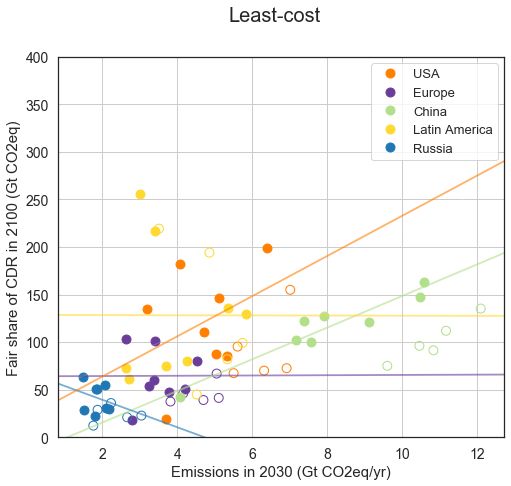

In [66]:
# Regression Plot with all models (IAM output) - country specific


# x_variable = 'em_change'
x_variable = 'CO2_Emissions'
#y_variable = 'CUM_CDR_fair_share_by_CUM_POP'
#y_variable = 'CUM_CDR_fair_share_by_GDP'
y_variable = 'CUM_CDR'


x_df = allmodels_regions.loc[allmodels_regions.Year == 2030]
y_df = allmodels_regions.loc[allmodels_regions.Year == 2100]
x_var = x_df[x_variable]/1000
y_var = y_df[y_variable]/1000

x_df_USA = allmodels_USA.loc[allmodels_USA.Year == 2030]
y_df_USA = allmodels_USA.loc[allmodels_USA.Year == 2100]
x_var_USA = x_df_USA[x_variable]/1000
y_var_USA = y_df_USA[y_variable]/1000

x_df_USA_2 = allmodels_USA_2.loc[allmodels_USA_2.Year == 2030]
y_df_USA_2 = allmodels_USA_2.loc[allmodels_USA_2.Year == 2100]
x_var_USA_2 = x_df_USA_2[x_variable]/1000
y_var_USA_2 = y_df_USA_2[y_variable]/1000

x_df_USA_15 = allmodels_USA_15.loc[allmodels_USA_15.Year == 2030]
y_df_USA_15 = allmodels_USA_15.loc[allmodels_USA_15.Year == 2100]
x_var_USA_15 = x_df_USA_15[x_variable]/1000
y_var_USA_15 = y_df_USA_15[y_variable]/1000

x_df_USA_15_lo = allmodels_USA_15_lo.loc[allmodels_USA_15_lo.Year == 2030]
y_df_USA_15_lo = allmodels_USA_15_lo.loc[allmodels_USA_15_lo.Year == 2100]
x_var_USA_15_lo = x_df_USA_15_lo[x_variable]/1000
y_var_USA_15_lo = y_df_USA_15_lo[y_variable]/1000

x_df_USA_15_ho = allmodels_USA_15_ho.loc[allmodels_USA_15_ho.Year == 2030]
y_df_USA_15_ho = allmodels_USA_15_ho.loc[allmodels_USA_15_ho.Year == 2100]
x_var_USA_15_ho = x_df_USA_15_ho[x_variable]/1000
y_var_USA_15_ho = y_df_USA_15_ho[y_variable]/1000


x_df_CHN = allmodels_CHN.loc[allmodels_CHN.Year == 2030]
y_df_CHN = allmodels_CHN.loc[allmodels_CHN.Year == 2100]
x_var_CHN = x_df_CHN[x_variable]/1000
y_var_CHN = y_df_CHN[y_variable]/1000

x_df_CHN_2 = allmodels_CHN_2.loc[allmodels_CHN_2.Year == 2030]
y_df_CHN_2 = allmodels_CHN_2.loc[allmodels_CHN_2.Year == 2100]
x_var_CHN_2 = x_df_CHN_2[x_variable]/1000
y_var_CHN_2 = y_df_CHN_2[y_variable]/1000

x_df_CHN_15 = allmodels_CHN_15.loc[allmodels_CHN_15.Year == 2030]
y_df_CHN_15 = allmodels_CHN_15.loc[allmodels_CHN_15.Year == 2100]
x_var_CHN_15 = x_df_CHN_15[x_variable]/1000
y_var_CHN_15 = y_df_CHN_15[y_variable]/1000

x_df_CHN_15_lo = allmodels_CHN_15_lo.loc[allmodels_CHN_15_lo.Year == 2030]
y_df_CHN_15_lo = allmodels_CHN_15_lo.loc[allmodels_CHN_15_lo.Year == 2100]
x_var_CHN_15_lo = x_df_CHN_15_lo[x_variable]/1000
y_var_CHN_15_lo = y_df_CHN_15_lo[y_variable]/1000

x_df_CHN_15_ho = allmodels_CHN_15_ho.loc[allmodels_CHN_15_ho.Year == 2030]
y_df_CHN_15_ho = allmodels_CHN_15_ho.loc[allmodels_CHN_15_ho.Year == 2100]
x_var_CHN_15_ho = x_df_CHN_15_ho[x_variable]/1000
y_var_CHN_15_ho = y_df_CHN_15_ho[y_variable]/1000

x_df_EUR = allmodels_EUR.loc[allmodels_EUR.Year == 2030]
y_df_EUR = allmodels_EUR.loc[allmodels_EUR.Year == 2100]
x_var_EUR = x_df_EUR[x_variable]/1000
y_var_EUR = y_df_EUR[y_variable]/1000

x_df_EUR_2 = allmodels_EUR_2.loc[allmodels_EUR_2.Year == 2030]
y_df_EUR_2 = allmodels_EUR_2.loc[allmodels_EUR_2.Year == 2100]
x_var_EUR_2 = x_df_EUR_2[x_variable]/1000
y_var_EUR_2 = y_df_EUR_2[y_variable]/1000

x_df_EUR_15 = allmodels_EUR_15.loc[allmodels_EUR_15.Year == 2030]
y_df_EUR_15 = allmodels_EUR_15.loc[allmodels_EUR_15.Year == 2100]
x_var_EUR_15 = x_df_EUR_15[x_variable]/1000
y_var_EUR_15 = y_df_EUR_15[y_variable]/1000

x_df_EUR_15_lo = allmodels_EUR_15_lo.loc[allmodels_EUR_15_lo.Year == 2030]
y_df_EUR_15_lo = allmodels_EUR_15_lo.loc[allmodels_EUR_15_lo.Year == 2100]
x_var_EUR_15_lo = x_df_EUR_15_lo[x_variable]/1000
y_var_EUR_15_lo = y_df_EUR_15_lo[y_variable]/1000

x_df_EUR_15_ho = allmodels_EUR_15_ho.loc[allmodels_EUR_15_ho.Year == 2030]
y_df_EUR_15_ho = allmodels_EUR_15_ho.loc[allmodels_EUR_15_ho.Year == 2100]
x_var_EUR_15_ho = x_df_EUR_15_ho[x_variable]/1000
y_var_EUR_15_ho = y_df_EUR_15_ho[y_variable]/1000


x_df_RUS = allmodels_RUS.loc[allmodels_RUS.Year == 2030]
y_df_RUS = allmodels_RUS.loc[allmodels_RUS.Year == 2100]
x_var_RUS = x_df_RUS[x_variable]/1000
y_var_RUS = y_df_RUS[y_variable]/1000

x_df_RUS_2 = allmodels_RUS_2.loc[allmodels_RUS_2.Year == 2030]
y_df_RUS_2 = allmodels_RUS_2.loc[allmodels_RUS_2.Year == 2100]
x_var_RUS_2 = x_df_RUS_2[x_variable]/1000
y_var_RUS_2 = y_df_RUS_2[y_variable]/1000

x_df_RUS_15 = allmodels_RUS_15.loc[allmodels_RUS_15.Year == 2030]
y_df_RUS_15 = allmodels_RUS_15.loc[allmodels_RUS_15.Year == 2100]
x_var_RUS_15 = x_df_RUS_15[x_variable]/1000
y_var_RUS_15 = y_df_RUS_15[y_variable]/1000

x_df_RUS_15_lo = allmodels_RUS_15_lo.loc[allmodels_RUS_15_lo.Year == 2030]
y_df_RUS_15_lo = allmodels_RUS_15_lo.loc[allmodels_RUS_15_lo.Year == 2100]
x_var_RUS_15_lo = x_df_RUS_15_lo[x_variable]/1000
y_var_RUS_15_lo = y_df_RUS_15_lo[y_variable]/1000

x_df_RUS_15_ho = allmodels_RUS_15_ho.loc[allmodels_RUS_15_ho.Year == 2030]
y_df_RUS_15_ho = allmodels_RUS_15_ho.loc[allmodels_RUS_15_ho.Year == 2100]
x_var_RUS_15_ho = x_df_RUS_15_ho[x_variable]/1000
y_var_RUS_15_ho = y_df_RUS_15_ho[y_variable]/1000


x_df_LAM = allmodels_LAM.loc[allmodels_LAM.Year == 2030]
y_df_LAM = allmodels_LAM.loc[allmodels_LAM.Year == 2100]
x_var_LAM = x_df_LAM[x_variable]/1000
y_var_LAM = y_df_LAM[y_variable]/1000

x_df_LAM_2 = allmodels_LAM_2.loc[allmodels_LAM_2.Year == 2030]
y_df_LAM_2 = allmodels_LAM_2.loc[allmodels_LAM_2.Year == 2100]
x_var_LAM_2 = x_df_LAM_2[x_variable]/1000
y_var_LAM_2 = y_df_LAM_2[y_variable]/1000

x_df_LAM_15 = allmodels_LAM_15.loc[allmodels_LAM_15.Year == 2030]
y_df_LAM_15 = allmodels_LAM_15.loc[allmodels_LAM_15.Year == 2100]
x_var_LAM_15 = x_df_LAM_15[x_variable]/1000
y_var_LAM_15 = y_df_LAM_15[y_variable]/1000

x_df_LAM_15_lo = allmodels_LAM_15_lo.loc[allmodels_LAM_15_lo.Year == 2030]
y_df_LAM_15_lo = allmodels_LAM_15_lo.loc[allmodels_LAM_15_lo.Year == 2100]
x_var_LAM_15_lo = x_df_LAM_15_lo[x_variable]/1000
y_var_LAM_15_lo = y_df_LAM_15_lo[y_variable]/1000

x_df_LAM_15_ho = allmodels_LAM_15_ho.loc[allmodels_LAM_15_ho.Year == 2030]
y_df_LAM_15_ho = allmodels_LAM_15_ho.loc[allmodels_LAM_15_ho.Year == 2100]
x_var_LAM_15_ho = x_df_LAM_15_ho[x_variable]/1000
y_var_LAM_15_ho = y_df_LAM_15_ho[y_variable]/1000



region_USA=['USA']
USA_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_USA)) & (allmodels_df.Year==2030)].copy()
USA_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_USA)) & (allmodels_df.Year==2100)].copy()
USA_mix = USA_2030.append(USA_2100)

region_EUR=['EUR']
EUR_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_EUR)) & (allmodels_df.Year==2030)].copy()
EUR_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_EUR)) & (allmodels_df.Year==2100)].copy()
EUR_mix = EUR_2030.append(EUR_2100)

region_AFR=['AFR']
AFR_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_AFR)) & (allmodels_df.Year==2030)].copy()
AFR_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_AFR)) & (allmodels_df.Year==2100)].copy()
AFR_mix = AFR_2030.append(AFR_2100)

region_CHN=['CHN']
CHN_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_CHN)) & (allmodels_df.Year==2030)].copy()
CHN_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_CHN)) & (allmodels_df.Year==2100)].copy()
CHN_mix = CHN_2030.append(CHN_2100)

region_IND=['IND']
IND_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_IND)) & (allmodels_df.Year==2030)].copy()
IND_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_IND)) & (allmodels_df.Year==2100)].copy()
IND_mix = IND_2030.append(IND_2100)

region_LAM=['LAM']
LAM_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_LAM)) & (allmodels_df.Year==2030)].copy()
LAM_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_LAM)) & (allmodels_df.Year==2100)].copy()
LAM_mix = LAM_2030.append(LAM_2100)

region_RUS=['RUS']
RUS_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_RUS)) & (allmodels_df.Year==2030)].copy()
RUS_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(region_RUS)) & (allmodels_df.Year==2100)].copy()
RUS_mix = RUS_2030.append(RUS_2100)


sns.set_style("white")


plt.figure(figsize=(8,7))

plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)


colours = sns.color_palette("Paired",12)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],col_lam[5], colours[9]]

col_lam = sns.color_palette("Set2", 6)
#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6


for sce in scen_15:
    x_USA = USA_mix.loc[(USA_mix.Year==2030) & (USA_mix.Scenario == sce)]
    x_USA = x_USA[x_variable]/1000
    y_USA = USA_mix.loc[(USA_mix.Year==2100) & (USA_mix.Scenario == sce)]
    y_USA = y_USA[y_variable]/1000
    plt.scatter(x_USA, y_USA, color = colours[7], marker = 'o', label = 'USA', s = 80)
    
for sce in scen_2:
    x_USA = USA_mix.loc[(USA_mix.Year==2030) & (USA_mix.Scenario == sce)]
    x_USA = x_USA[x_variable]/1000
    y_USA = USA_mix.loc[(USA_mix.Year==2100) & (USA_mix.Scenario == sce)]
    y_USA = y_USA[y_variable]/1000
    plt.scatter(x_USA, y_USA, color = colours[7], marker = 'o', facecolors='none', s = 80)

for sce in scen_15:
    x_EUR = EUR_mix.loc[(EUR_mix.Year==2030) & (EUR_mix.Scenario == sce)]
    x_EUR = x_EUR[x_variable]/1000
    y_EUR = EUR_mix.loc[(EUR_mix.Year==2100) & (EUR_mix.Scenario == sce)]
    y_EUR = y_EUR[y_variable]/1000
    plt.scatter(x_EUR, y_EUR, color = colours[9], marker = 'o',  label = 'EUR', s = 80)

for sce in scen_2:
    x_EUR = EUR_mix.loc[(EUR_mix.Year==2030) & (EUR_mix.Scenario == sce)]
    x_EUR = x_EUR[x_variable]/1000
    y_EUR = EUR_mix.loc[(EUR_mix.Year==2100) & (EUR_mix.Scenario == sce)]
    y_EUR = y_EUR[y_variable]/1000
    plt.scatter(x_EUR, y_EUR, color = colours[9], marker = 'o', facecolors='none', s = 80)
    
for sce in scen_15:
    x_CHN = CHN_mix.loc[(CHN_mix.Year==2030) & (CHN_mix.Scenario == sce)]
    x_CHN = x_CHN[x_variable]/1000
    y_CHN = CHN_mix.loc[(CHN_mix.Year==2100) & (CHN_mix.Scenario == sce)]
    y_CHN = y_CHN[y_variable]/1000
    plt.scatter(x_CHN, y_CHN, color = colours[2], marker = 'o', label = 'CHN', s = 80)
    
for sce in scen_2:
    x_CHN = CHN_mix.loc[(CHN_mix.Year==2030) & (CHN_mix.Scenario == sce)]
    x_CHN = x_CHN[x_variable]/1000
    y_CHN = CHN_mix.loc[(CHN_mix.Year==2100) & (CHN_mix.Scenario == sce)]
    y_CHN = y_CHN[y_variable]/1000
    plt.scatter(x_CHN, y_CHN, color = colours[2], marker = 'o', facecolors='none', s = 80)
    
for sce in scen_15:
    x_LAM = LAM_mix.loc[(LAM_mix.Year==2030) & (LAM_mix.Scenario == sce)]
    x_LAM = x_LAM[x_variable]/1000
    y_LAM = LAM_mix.loc[(LAM_mix.Year==2100) & (LAM_mix.Scenario == sce)]
    y_LAM = y_LAM[y_variable]/1000
    plt.scatter(x_LAM, y_LAM, color = col_lam[5], marker = 'o', label = 'LAM', s = 80)
    
for sce in scen_2:
    x_LAM = LAM_mix.loc[(LAM_mix.Year==2030) & (LAM_mix.Scenario == sce)]
    x_LAM = x_LAM[x_variable]/1000
    y_LAM = LAM_mix.loc[(LAM_mix.Year==2100) & (LAM_mix.Scenario == sce)]
    y_LAM = y_LAM[y_variable]/1000
    plt.scatter(x_LAM, y_LAM, color = col_lam[5], marker = 'o', facecolors='none', s = 80)  
    
for sce in scen_15:
    x_RUS = RUS_mix.loc[(RUS_mix.Year==2030) & (RUS_mix.Scenario == sce)]
    x_RUS = x_RUS[x_variable]/1000
    y_RUS = RUS_mix.loc[(RUS_mix.Year==2100) & (RUS_mix.Scenario == sce)]
    y_RUS = y_RUS[y_variable]/1000
    plt.scatter(x_RUS, y_RUS, color = colours[1], marker = 'o', label = 'RUS', s = 80)

for sce in scen_2:
    x_RUS = RUS_mix.loc[(RUS_mix.Year==2030) & (RUS_mix.Scenario == sce)]
    x_RUS = x_RUS[x_variable]/1000
    y_RUS = RUS_mix.loc[(RUS_mix.Year==2100) & (RUS_mix.Scenario == sce)]
    y_RUS = y_RUS[y_variable]/1000
    plt.scatter(x_RUS, y_RUS, color = colours[1], marker = 'o', facecolors='none', s = 80) 


    
    
#adding linear regression 

sns.regplot(x = x_var_EUR_15, y = y_var_EUR_15, ci = 0, color = colours[9], scatter = False, line_kws={"lw": 1.8, "alpha":0.6})
sns.regplot(x = x_var_CHN_15, y = y_var_CHN_15, ci = 0, color = colours[2], scatter = False, line_kws={"lw": 1.8, "alpha":0.6})
sns.regplot(x = x_var_RUS_15, y = y_var_RUS_15, ci = 0, color = colours[1], scatter = False, line_kws={"lw": 1.8, "alpha":0.6})
sns.regplot(x = x_var_LAM_15, y = y_var_LAM_15, ci = 0, color = col_lam[5], scatter = False, line_kws={"lw": 1.8, "alpha":0.6})
sns.regplot(x = x_var_USA_15, y = y_var_USA_15, ci = 0, color = colours[7], scatter = False, line_kws={"lw": 1.8, "alpha":0.6})


plt.suptitle('Least-cost', fontsize = 20)

plt.legend(handles=[Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[7], label = 'USA'),
            Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[9], label = 'Europe'),
             Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[2], label = 'China'),
              Line2D([0], [0], linestyle = 'none', marker = 'o', color=col_lam[5], label = 'Latin America'),
               Line2D([0], [0], linestyle = 'none', marker = 'o', color=colours[1], label = 'Russia')],
           markerscale = 1.5, fontsize = 13)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.xlabel('Emissions in 2030 (Gt CO2eq/yr)', fontsize = 15)
plt.ylabel('Fair share of CDR in 2100 (Gt CO2eq)', fontsize = 15)
plt.ylim(0,400)
# plt.tight_layout()
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/N - Figure 1 - IAM_region specific_15.png')
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/N - Figure 1 - IAM_region specific_15.svg', dpi = 300)
#plt.savefig(plot_path + 'Figure 1 - Scatter cum pop ltd overshoot WITH MESSAGE.svg', dpi = 300, transparent = True)



In [24]:
# x_variable = 'em_change'
x_variable = 'CO2_Emissions'
y_variable = 'CUM_CDR_fair_share_by_CUM_POP'
#y_variable = 'CUM_CDR_fair_share_by_GDP'
#y_variable = 'CUM_CDR'

regions=['RUS', 'USA', 'CHN', 'EUR', 'LAM']
emissions_2030 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(regions)) & (allmodels_df.Year==2030)].copy()
CDR_2100 =allmodels_df[(allmodels_df.Scenario.isin(scen_allmodels))&
                   (allmodels_df.Region.isin(regions)) & (allmodels_df.Year==2100)].copy()

emissions_2030 = emissions_2030[['Region', 'MODEL', 'Scenario', 'Year', 'CO2_Emissions']]
CDR_2100 = CDR_2100[['Region', 'MODEL', 'Scenario', 'Year', 'CUM_CDR_fair_share_by_CUM_POP']]


emissions_2030 = emissions_2030.reset_index(drop = True)
emissions_2030 = emissions_2030.round(2)

CDR_2100 = CDR_2100.reset_index(drop = True)
CDR_2100 = CDR_2100.round(2)

#scen_allmodels = ['SSP1-19-SPA0-V17', 
# 'SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17',
# 'SSP1-26-SPA1-V17', 'SSP2-26-SPA2-V17', 'SSP5-19-SPA5-V17',
# 'SSP5-26-SPA5-V17', 'LowEnergyDemand', 'SSP1-19']

#scen_15_lo = ['SSP1-19-SPA0-V17', 'LowEnergyDemand', 'SSP1-19'] #only no / limited overshoot

#scen_15_ho = ['SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17', 'SSP5-19-SPA5-V17'] # high overshoot

#scen_2 = ['SSP2-26-SPA2-V17','SSP1-26-SPA1-V17', 'SSP5-26-SPA5-V17']

#scen_15 = ['SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17', 'SSP5-19-SPA5-V17', 'SSP1-19-SPA0-V17', 'LowEnergyDemand', 'SSP1-19']


emissions_2030['Scen_category'] = ''

conditions = [
    (emissions_2030['Scenario'].isin(scen_15_lo)),
    (emissions_2030['Scenario'].isin(scen_2)), 
    (emissions_2030['Scenario'].isin(scen_15_ho))]
choices = ['Scen_15_lo', 'Scen_2', 'Scen_15_ho']
emissions_2030['Scen_category'] = np.select(conditions, choices, default='black')


CDR_2100['Scen_category'] = ''

conditions = [
    (emissions_2030['Scenario'].isin(scen_15_lo)),
    (emissions_2030['Scenario'].isin(scen_2)), 
    (emissions_2030['Scenario'].isin(scen_15_ho))]
choices = ['Scen_15_lo', 'Scen_2', 'Scen_15_ho']
CDR_2100['Scen_category'] = np.select(conditions, choices, default='black')

emissions_2030['Fair Share of CDR in 2100'] = 0

for model in emissions_2030.MODEL.unique():
    model_filt = (emissions_2030.MODEL == model)
    for scen in emissions_2030.Scen_category.unique():
        scen_filt = (emissions_2030.Scen_category == scen)
        for reg in emissions_2030.Region.unique():
            reg_filt = (emissions_2030.Region == reg)
            emissions_2030.loc[model_filt & scen_filt & reg_filt, 'Fair Share of CDR in 2100'] = CDR_2100.loc[model_filt & scen_filt & reg_filt, 'CUM_CDR_fair_share_by_CUM_POP']

scatter_IAM_reg = emissions_2030[['Region', 'MODEL', 'Scenario', 'CO2_Emissions', 'Scen_category', 'Fair Share of CDR in 2100']]
scatter_IAM_reg = scatter_IAM_reg.rename(columns = {'CO2_Emissions': '2030 CO2_Emissions (GT CO2/yr)'})

scatter_IAM_reg.to_excel(table_path + 'scatter_CUM_POP_new.xlsx')

In [13]:
allmodels_df.columns


Index(['Unnamed: 0', 'MODEL', 'Region', 'Scenario', 'Year', 'Total_CO2',
       'Total_GHG', 'BECCS', 'LANDCDR', 'TOTAL_CDR', 'CO2_Emissions',
       'CUM_CO2', 'CUM_CDR', 'Unit_CO2', 'Population', 'GDP',
       'Unit_Population', 'cumPopulation', '2016_emissions', 'em_change',
       'Unit_GDP', 'GDP_cap', 'GDP_cap_avg', 'GDP_cap_CoI_nan', 'GDP_cap_CoI',
       'GDP_CoI_nan', 'GDP_CoI', 'zahler', 'nenner', 'Tot_CDR', 'M',
       'GDP_CoI_frac', 'CDR_per_cap_GDP', 'CDR_per_cap_per_GDP_per_cap',
       'CDR_fair_share_by_GDP', 'CUM_CDR_fair_share_by_GDP',
       'Global_CUM_CO2_by_CUM_POP', 'Fair_share_by_CUM_POP',
       'Excess_emissions_by_CUM_POP', 'Exc_em_fac_by_CUM_POP',
       'CDR_fair_share_by_CUM_POP', 'CUM_CDR_fair_share_by_CUM_POP',
       'CDR_model_vs_fair_share_by_CUM_POP', 'CDR_model_vs_fair_share_by_GDP',
       'CUM_CDR_model_vs_fair_share_by_CUM_POP',
       'CUM_CDR_model_vs_fair_share_by_GDP', 'Cum_M'],
      dtype='object')

In [82]:
# Prepare data for boxplots

boxplot_df_allmodels = allmodels_df.melt(id_vars=['MODEL', 'Region', 'Scenario', 'Year'], value_vars=['Total_CO2',
       'Total_GHG', 'BECCS', 'LANDCDR', 'TOTAL_CDR', 'CO2_Emissions',
       'CUM_CO2', 'CUM_CDR', 'Unit_CO2', 'Population', 'GDP',
       'Unit_Population', 'cumPopulation', '2016_emissions', 'em_change',
       'Unit_GDP', 'GDP_cap', 'GDP_cap_avg', 'GDP_cap_CoI_nan', 'GDP_cap_CoI',
       'GDP_CoI_nan', 'GDP_CoI', 'GDP_CoI_frac', 'CDR_per_cap_GDP',
       'CDR_per_cap_per_GDP_per_cap', 'CDR_fair_share_by_GDP',
       'CUM_CDR_fair_share_by_GDP', 'Global_CUM_CO2_by_CUM_POP',
       'Fair_share_by_CUM_POP', 'Excess_emissions_by_CUM_POP',
       'Exc_em_fac_by_CUM_POP', 'CDR_fair_share_by_CUM_POP',
       'CUM_CDR_fair_share_by_CUM_POP', 'CDR_model_vs_fair_share_by_CUM_POP',
       'CDR_model_vs_fair_share_by_GDP',
       'CUM_CDR_model_vs_fair_share_by_CUM_POP',
       'CUM_CDR_model_vs_fair_share_by_GDP', 'M', 'Cum_M']).reset_index()


In [42]:
boxplot_df_allmodels.head()

,index,MODEL,Region,Scenario,Year,variable,value
0,0,IMAGE,CHN,SSP1-19-SPA0-V17,2020,Total_CO2,8231.71
1,1,IMAGE,CHN,SSP1-19-SPA0-V17,2030,Total_CO2,5564.85
2,2,IMAGE,CHN,SSP1-19-SPA0-V17,2040,Total_CO2,1181.27
3,3,IMAGE,CHN,SSP1-19-SPA0-V17,2050,Total_CO2,25.23
4,4,IMAGE,CHN,SSP1-19-SPA0-V17,2060,Total_CO2,-518.1


/Users/susannebaur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/susannebaur/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


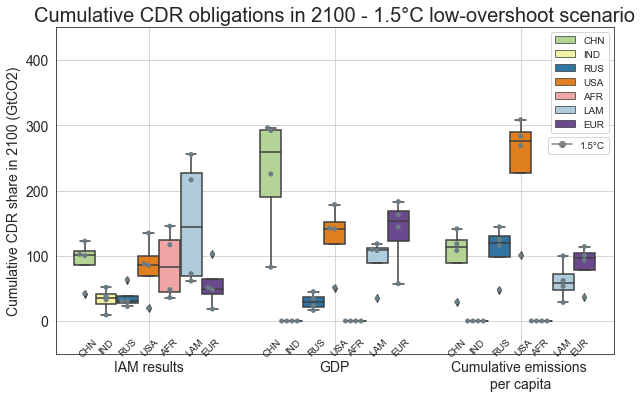

In [43]:
# Figure 2 - only low-overshoot 1.5-scenarios




regions = ['USA', 'CHN', 'RUS', 'EUR', 'AFR', 'LAM', 'IND']
years = ['2100']
variab = ['CUM_CDR_fair_share_by_CUM_POP', 'CUM_CDR_fair_share_by_GDP', 'CUM_CDR']
boxp_2100 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(regions)) &
                            (boxplot_df_allmodels.Scenario.isin(scen_15_lo)) &
                            (boxplot_df_allmodels.Year.isin(years)) &
                            (boxplot_df_allmodels.variable.isin(variab))]

boxp_2100['value'] = boxp_2100['value'].astype(float)/1000

boxp_15 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15_lo)]
#boxp_2 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_2)]




sns.set_context(font_scale=1, rc={"axes.labelsize":12})

f, axes = plt.subplots(1, 1, figsize=(10,6))

colours = sns.color_palette("Paired",12)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],colours[0], colours[9]]

col_lam = sns.color_palette("Set2", 6)
#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6
#AFR 9, CHN 1, EUR 2, IND 3, JPN 10, LAM 5, MEA 6, OAS 7, ROW 8, RUS 0, USA 4

box1 = sns.boxplot(x="variable", y="value", data=boxp_2100, hue = 'Region', hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], palette = colour_palette) # palette = 'Paired', palette = "coolwarm" or "husl", orient= 'horizontal'
box1.annotate('CHN', xy=(0.04, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.075, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.11, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.15, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.185, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.23, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.26, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.37, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.41, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.45, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.49, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.52, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.56, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.6, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.7, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.74, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.78, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.82, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.85, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.89, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.92, 0.03), xycoords='axes fraction', rotation=45)

colours_15 = ["battleship grey"]
pal_15 = sns.xkcd_palette(colours_15)
#colours_2 = ["light grey"]                  # color options https://xkcd.com/color/rgb/
#pal_2 = sns.xkcd_palette(colours_2)

box1 = sns.swarmplot(x="variable", y="value", data=boxp_15, hue = 'Region', hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], palette = pal_15, marker = 'o', facecolors='none', dodge = True)
#box1 = sns.swarmplot(x="variable", y="value", data=boxp_2, hue = 'Region', palette = pal_2, marker = '*', dodge = True)


box1.set_ylabel("Cumulative CDR share in 2100 (GtCO2)", fontsize = 14)
box1.set(xlabel = " ")
box1.set(ylim =(-50,450))
box1.set(xticklabels=['IAM results','GDP','Cumulative emissions \nper capita'])
box1.set_title("Cumulative CDR obligations in 2100 - 1.5°C low-overshoot scenario", fontsize=20)
box1.tick_params(labelsize=14)

handles, labels = box1.get_legend_handles_labels()
l = plt.legend(handles[0:7], labels[0:7])
l2 = plt.legend(handles=[Line2D([0], [0], marker = 'o', color="grey", label = '1.5°C')], loc = 'best', bbox_to_anchor =(1.0, 0.68))
plt.gca().add_artist(l)

box1.grid('on')
#plt.savefig(plot_path + 'Figure 2 - Boxplot2100 15 scenarios.svg', dpi = 300)
#plt.savefig(plot_path + 'F - Figure 2 - Boxplot2100 15 lo.png')

/Users/clairefyson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


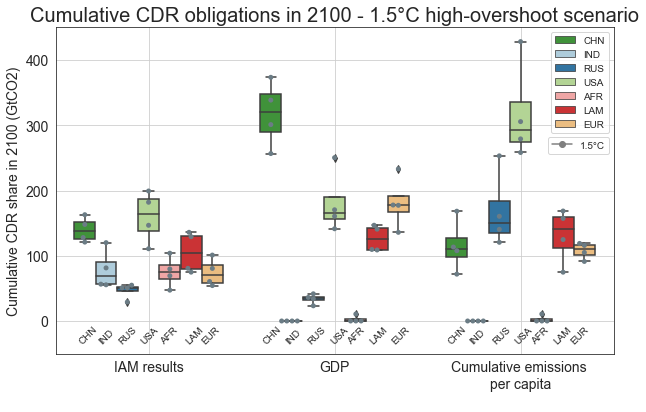

In [20]:
# Figure 2 - only high-overshoot 1.5-scenarios



regions = ['USA', 'CHN', 'RUS', 'EUR', 'AFR', 'LAM', 'IND']
years = ['2100']
variab = ['CUM_CDR_fair_share_by_CUM_POP', 'CUM_CDR_fair_share_by_GDP', 'CUM_CDR']
boxp_2100 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(regions)) &
                            (boxplot_df_allmodels.Scenario.isin(scen_15_ho)) &
                            (boxplot_df_allmodels.Year.isin(years)) &
                            (boxplot_df_allmodels.variable.isin(variab))]

boxp_2100['value'] = boxp_2100['value'].astype(float)/1000

boxp_15 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15_ho)]
#boxp_2 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_2)]


sns.set_context(font_scale=1, rc={"axes.labelsize":12})

f, axes = plt.subplots(1, 1, figsize=(10,6))

colours = sns.color_palette("Paired",12)
colour_palette = [colours[3],colours[0],colours[1],colours[2],colours[4],colours[5], colours[6]]
#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6
#AFR 9, CHN 1, EUR 2, IND 3, JPN 10, LAM 5, MEA 6, OAS 7, ROW 8, RUS 0, USA 4

box1 = sns.boxplot(x="variable", y="value", data=boxp_2100, hue = 'Region', hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], palette = colour_palette) # palette = 'Paired', palette = "coolwarm" or "husl", orient= 'horizontal'
box1.annotate('CHN', xy=(0.04, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.075, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.11, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.15, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.185, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.23, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.26, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.37, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.41, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.45, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.49, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.52, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.56, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.6, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.7, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.74, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.78, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.82, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.85, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.89, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.92, 0.03), xycoords='axes fraction', rotation=45)

colours_15 = ["battleship grey"]
pal_15 = sns.xkcd_palette(colours_15)
#colours_2 = ["light grey"]                  # color options https://xkcd.com/color/rgb/
#pal_2 = sns.xkcd_palette(colours_2)

box1 = sns.swarmplot(x="variable", y="value", data=boxp_15, hue = 'Region', hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], palette = pal_15, marker = 'o', facecolors='none', dodge = True)
#box1 = sns.swarmplot(x="variable", y="value", data=boxp_2, hue = 'Region', palette = pal_2, marker = '*', dodge = True)


box1.set_ylabel("Cumulative CDR share in 2100 (GtCO2)", fontsize = 14)
box1.set(xlabel = " ")
box1.set(ylim =(-50,450))
box1.set(xticklabels=['IAM results','GDP','Cumulative emissions \nper capita'])
box1.set_title("Cumulative CDR obligations in 2100 - 1.5°C high-overshoot scenario", fontsize=20)
box1.tick_params(labelsize=14)

handles, labels = box1.get_legend_handles_labels()
l = plt.legend(handles[0:7], labels[0:7])
l2 = plt.legend(handles=[Line2D([0], [0], marker = 'o', color="grey", label = '1.5°C')], loc = 'best', bbox_to_anchor =(1.0, 0.68))
plt.gca().add_artist(l)

box1.grid('on')
#plt.savefig(plot_path + 'Figure 2 - Boxplot2100 15 scenarios.svg', dpi = 300)
plt.savefig(plot_path + 'F - Figure 2 - Boxplot2100 15 ho.png')

In [21]:
print(allmodels_df.Region.unique())

['BRA' 'CAN' 'CEU' 'CHN' 'EAF' 'IND' 'INDO' 'JPN' 'KOR' 'ME' 'MEX' 'NAF'
 'OCE' 'RCAM' 'RSAF' 'RSAM' 'RSAS' 'RUS' 'SAF' 'SEAS' 'STAN' 'TUR' 'UKR'
 'USA' 'WAF' 'WEU' 'World' 'AFR' 'LAM' 'EUR' 'MEA' 'PAO' 'PAS' 'OAS' 'ROW']


In [22]:
print(equity_image.Scenario.unique())
print(equity_remind.Scenario.unique())

['SSP1-19-SPA0-V17' 'SSP1-Ref-SPA0-V17' 'SSP2-Ref-SPA0-V17'
 'SSP2-LF-SPA2-V17']
['SSP1-19-SPA1-V17' 'SSP2-19-SPA2-V17' 'SSP1-26-SPA1-V17'
 'SSP2-26-SPA2-V17' 'SSP5-19-SPA5-V17' 'SSP5-26-SPA5-V17']


In [ ]:
box_df_all_2 = pd.DataFrame()
box_df_all_2 = allmodels_df[['Region', 'Scenario', 'Year', 'CUM_CDR_model_vs_fair_share_by_CUM_POP', 'CUM_CDR_fair_share_by_GDP', 'CUM_CDR']]

for 'CHN' in box_df_all.Region():
    reg_filt = (box_df_all.Region == 'CHN')
    for ye in box_df_all.Year.unique():
        ye_filt = (box_df_all.Year == 2100)
        box_df_all.loc[reg_filt & ye_filt, 'median_IAM'] = np.median(box_df_all.loc[reg_filt & ye_filt, 'IAM_output'])
                



In [99]:
## Boxplot Table for Plot

box_df_all = pd.DataFrame()
box_df_all = allmodels_df[['Region', 'Scenario', 'Year', 'CUM_CDR_fair_share_by_CUM_POP', 'CUM_CDR_fair_share_by_GDP', 'CUM_CDR', 'CUM_CDR_model_vs_fair_share_by_CUM_POP']]

regions = ['USA', 'CHN', 'RUS', 'EUR', 'AFR', 'LAM', 'IND']
years = ['2050', '2100']
scen_allmodels = ['SSP1-19-SPA0-V17', 
 'SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17',
 'SSP1-26-SPA1-V17', 'SSP2-26-SPA2-V17', 'SSP5-19-SPA5-V17',
 'SSP5-26-SPA5-V17', 'LowEnergyDemand', 'SSP1-19', 'SSP1-26', 'SSP2-19', 'SSP2-26']

box_df_all['CUM_CDR_fair_share_by_CUM_POP'] = box_df_all['CUM_CDR_fair_share_by_CUM_POP']/1000
box_df_all['CUM_CDR_fair_share_by_GDP'] = box_df_all['CUM_CDR_fair_share_by_GDP']/1000
box_df_all['CUM_CDR_model_vs_fair_share_by_CUM_POP'] = box_df_all['CUM_CDR_model_vs_fair_share_by_CUM_POP']/1000
box_df_all['CUM_CDR'] = box_df_all['CUM_CDR']/1000

box_df_all = box_df_all.loc[(box_df_all['Region'].isin(regions)) & (box_df_all['Year'].isin(years)) 
                            & (box_df_all['Scenario'].isin(scen_allmodels))]

box_df_all = box_df_all.rename(columns={'CUM_CDR_fair_share_by_CUM_POP': 'CDR_per_cap_method', 'CUM_CDR_fair_share_by_GDP': 'CDR_GDP_method', 'CUM_CDR': 'IAM_output', 'CUM_CDR_model_vs_fair_share_by_CUM_POP': 'help'})
box_df_all = box_df_all.reset_index(drop = True)

for reg in box_df_all.Region.unique():
    reg_filt = (box_df_all.Region == reg)
    for ye in box_df_all.Year.unique():
        ye_filt = (box_df_all.Year == ye)
        box_df_all.loc[reg_filt & ye_filt, 'median_cap'] = np.median(box_df_all.loc[reg_filt & ye_filt, 'CDR_per_cap_method'])
        
for reg in box_df_all.Region.unique():
    reg_filt = (box_df_all.Region == reg)
    for ye in box_df_all.Year.unique():
        ye_filt = (box_df_all.Year == ye)
        box_df_all.loc[reg_filt & ye_filt, 'median_GDP'] = np.median(box_df_all.loc[reg_filt & ye_filt, 'CDR_GDP_method'])
        
for reg in box_df_all.Region.unique():
    reg_filt = (box_df_all.Region == reg)
    for ye in box_df_all.Year.unique():
        ye_filt = (box_df_all.Year == ye)
        box_df_all.loc[reg_filt & ye_filt, 'median_IAM'] = np.median(box_df_all.loc[reg_filt & ye_filt, 'IAM_output'])

for reg in box_df_all.Region.unique():
    reg_filt = (box_df_all.Region == reg)
    for ye in box_df_all.Year.unique():
        ye_filt = (box_df_all.Year == ye)
        box_df_all.loc[reg_filt & ye_filt, 'median_help'] = np.median(box_df_all.loc[reg_filt & ye_filt, 'help'])


    
        
for reg in box_df_all.Region.unique():
    reg_filt = (box_df_all.Region == reg)
    for ye in box_df_all.Year.unique():
        ye_filt = (box_df_all.Year == ye)
        box_df_all.loc[reg_filt & ye_filt, '75_cap'] = np.quantile(box_df_all.loc[reg_filt & ye_filt, 'CDR_per_cap_method'], .75)

for reg in box_df_all.Region.unique():
    reg_filt = (box_df_all.Region == reg)
    for ye in box_df_all.Year.unique():
        ye_filt = (box_df_all.Year == ye)
        box_df_all.loc[reg_filt & ye_filt, '75_GDP'] = np.quantile(box_df_all.loc[reg_filt & ye_filt, 'CDR_GDP_method'], .75)
        
for reg in box_df_all.Region.unique():
    reg_filt = (box_df_all.Region == reg)
    for ye in box_df_all.Year.unique():
        ye_filt = (box_df_all.Year == ye)
        box_df_all.loc[reg_filt & ye_filt, '75_IAM'] = np.quantile(box_df_all.loc[reg_filt & ye_filt, 'IAM_output'], .75)
        

for reg in box_df_all.Region.unique():
    reg_filt = (box_df_all.Region == reg)
    for ye in box_df_all.Year.unique():
        ye_filt = (box_df_all.Year == ye)
        box_df_all.loc[reg_filt & ye_filt, '25_cap'] = np.quantile(box_df_all.loc[reg_filt & ye_filt, 'CDR_per_cap_method'], .25)

for reg in box_df_all.Region.unique():
    reg_filt = (box_df_all.Region == reg)
    for ye in box_df_all.Year.unique():
        ye_filt = (box_df_all.Year == ye)
        box_df_all.loc[reg_filt & ye_filt, '25_GDP'] = np.quantile(box_df_all.loc[reg_filt & ye_filt, 'CDR_GDP_method'], .25)
        
for reg in box_df_all.Region.unique():
    reg_filt = (box_df_all.Region == reg)
    for ye in box_df_all.Year.unique():
        ye_filt = (box_df_all.Year == ye)
        box_df_all.loc[reg_filt & ye_filt, '25_IAM'] = np.quantile(box_df_all.loc[reg_filt & ye_filt, 'IAM_output'], .25)
        
        
box_table = box_df_all[['Region', 'Scenario', 'Year', 'median_cap', '75_cap', '25_cap','median_GDP','75_GDP', '25_GDP','median_IAM','75_IAM', '25_IAM', 'median_help']]
box_table_all = box_table.copy()

#delete_rows = box_table_all[box_table_all.Scenario != 'SSP1-19'].index
#box_table_all.drop(delete_rows, inplace = True)

box_table_all = box_table_all.drop(columns='Scenario')

box_table_all.to_excel(table_path +'Boxplot/'+ 'boxplot_table_new_Gt.xlsx')

/Users/susannebaur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/susannebaur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/susannebaur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [93]:
box_table_all = pd.read_excel(table_path + 'Boxplot/'+'boxplot_table_new_Gt.xlsx')

box_table_all = box_table_all.drop(['Unnamed: 0'], axis=1)
box_table_all = box_table_all.round(1)

box_table_all['CPCE']= box_table_all["median_cap"].astype(str) +" ("+ box_table_all["25_cap"].astype(str) +" - "+ box_table_all["75_cap"].astype(str) + ")"
box_table_all['AP']= box_table_all["median_GDP"].astype(str) +" ("+ box_table_all["25_GDP"].astype(str) +" - "+ box_table_all["75_GDP"].astype(str) + ")"
box_table_all['Least-cost']= box_table_all["median_IAM"].astype(str) +" ("+ box_table_all["25_IAM"].astype(str) +" - "+ box_table_all["75_IAM"].astype(str) + ")"

box_table_short = box_table_all[['Region', 'Year', 'CPCE', 'AP', 'Least-cost']]
box_table_short = round(box_table_short)

print(box_table_short)
#box_table_short.to_excel(table_path + 'Boxplot/' + 'boxplot_table_tidy_new.xlsx')

    Region  Year                   CPCE                     AP  \
0      CHN  2050        5.0 (2.6 - 9.4)     44.3 (24.7 - 61.2)   
1      CHN  2100   108.8 (81.6 - 126.0)  292.0 (221.9 - 320.6)   
2      IND  2050        0.0 (0.0 - 0.0)        0.0 (0.0 - 0.0)   
3      IND  2100        0.0 (0.0 - 0.0)        0.0 (0.0 - 0.0)   
4      RUS  2050     18.4 (10.4 - 23.4)        4.8 (3.1 - 7.0)   
5      RUS  2100  127.0 (110.9 - 159.6)     34.6 (26.6 - 40.6)   
6      USA  2050     47.0 (29.1 - 58.1)     21.8 (14.8 - 29.2)   
7      USA  2100  283.2 (246.4 - 325.0)  149.0 (128.5 - 182.6)   
8      CHN  2050        5.0 (2.6 - 9.4)     44.3 (24.7 - 61.2)   
9      CHN  2100   108.8 (81.6 - 126.0)  292.0 (221.9 - 320.6)   
10     IND  2050        0.0 (0.0 - 0.0)        0.0 (0.0 - 0.0)   
11     IND  2100        0.0 (0.0 - 0.0)        0.0 (0.0 - 0.0)   
12     RUS  2050     18.4 (10.4 - 23.4)        4.8 (3.1 - 7.0)   
13     RUS  2100  127.0 (110.9 - 159.6)     34.6 (26.6 - 40.6)   
14     USA

In [29]:
box_cap = box_table_all[['Region', 'Year', 'median_cap', '75_cap', '25_cap']]
box_GDP = box_table_all[['Region', 'Year', 'median_GDP', '75_GDP', '25_GDP']]
box_IAM = box_table_all[['Region', 'Year', 'median_IAM', '75_IAM', '25_IAM']]

box_cap = box_cap.rename(columns = {'median_cap': 'median', '75_cap':'75_quantile', '25_cap':'25_quantile'})
box_cap['EQ_Method'] = 'per capita'
box_cap = box_cap.reset_index(drop = True)

box_GDP = box_GDP.rename(columns = {'median_GDP': 'median', '75_GDP':'75_quantile', '25_GDP':'25_quantile'})
box_GDP['EQ_Method'] = 'GDP'
box_GDP = box_GDP.reset_index(drop = True)

box_IAM = box_IAM.rename(columns = {'median_IAM': 'median', '75_IAM':'75_quantile', '25_IAM':'25_quantile'})
box_IAM['EQ_Method'] = 'IAM'
box_IAM = box_IAM.reset_index(drop = True)

boxplot_table_long = box_cap.append(box_GDP)
boxplot_table_long = boxplot_table_long.append(box_IAM)

boxplot_table_long = boxplot_table_long[['Region', 'Year', 'EQ_Method', 'median', '75_quantile', '25_quantile']]

boxplot_table_long = boxplot_table_long.round(2)
boxplot_table_long['new']= boxplot_table_long["median"].astype(str) +" ("+ boxplot_table_long["25_quantile"].astype(str) +" - "+ boxplot_table_long["75_quantile"].astype(str) + ")"

boxplot_table_long = boxplot_table_long.reset_index(drop = True)
print(boxplot_table_long)

boxplot_table_long.to_excel(table_path + 'boxplot_table_long_new.xlsx')

   Region  Year   EQ_Method  median  75_quantile  25_quantile  \
0     CHN  2050  per capita     3.8          8.1          2.3   
1     CHN  2100  per capita    89.8        112.0         70.9   
2     EUR  2050  per capita    14.3         19.0          6.6   
3     EUR  2100  per capita    95.8        108.5         78.4   
4     IND  2050  per capita     0.0          0.0          0.0   
5     IND  2100  per capita     0.0          0.0          0.0   
6     AFR  2050  per capita     0.0          0.0          0.0   
7     AFR  2100  per capita     0.0          0.0          0.0   
8     RUS  2050  per capita    16.0         21.7          8.4   
9     RUS  2100  per capita   123.0        155.5         96.3   
10    LAM  2050  per capita     6.8         12.2          3.8   
11    LAM  2100  per capita    81.0        118.0         55.5   
12    USA  2050  per capita    41.7         53.0         20.9   
13    USA  2100  per capita   262.9        299.0        206.9   
14    CHN  2050         G

/Users/susannebaur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


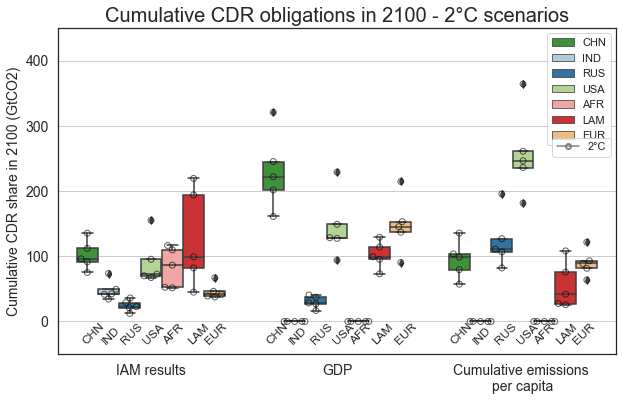

In [83]:
# Figure 2 - only 2-scenarios



regions = ['USA', 'CHN', 'RUS', 'EUR', 'AFR', 'LAM', 'IND']
years = ['2100']
variab = ['CUM_CDR_fair_share_by_CUM_POP', 'CUM_CDR_fair_share_by_GDP', 'CUM_CDR']
boxp_2100 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(regions)) &
                            (boxplot_df_allmodels.Scenario.isin(scen_2)) &
                            (boxplot_df_allmodels.Year.isin(years)) &
                            (boxplot_df_allmodels.variable.isin(variab))]

boxp_2100['value'] = boxp_2100['value'].astype(float)/1000

#boxp_15 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15)]
boxp_2 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_2)]




sns.set_context(font_scale=1, rc={"axes.labelsize":12})

f, axes = plt.subplots(1, 1, figsize=(10,6))

colours = sns.color_palette("Paired",12)
colour_palette = [colours[3],colours[0],colours[1],colours[2],colours[4],colours[5], colours[6]]
#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6
#AFR 9, CHN 1, EUR 2, IND 3, JPN 10, LAM 5, MEA 6, OAS 7, ROW 8, RUS 0, USA 4

box1 = sns.boxplot(x="variable", y="value", data=boxp_2100, hue = 'Region',hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], 
                   palette = colour_palette) # palette = 'Paired', palette = "coolwarm" or "husl", orient= 'horizontal'
box1.annotate('CHN', xy=(0.04, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.075, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.11, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.15, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.185, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.23, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.26, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.37, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.41, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.45, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.49, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.52, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.56, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.6, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.7, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.74, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.78, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.82, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.85, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.89, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.92, 0.03), xycoords='axes fraction', rotation=45)

#colours_15 = ["battleship grey"]
#pal_15 = sns.xkcd_palette(colours_15)
colours_2 = ["black"]                  # color options https://xkcd.com/color/rgb/
pal_2 = sns.xkcd_palette(colours_2)

#box1 = sns.swarmplot(x="variable", y="value", data=boxp_15, hue = 'Region', palette = pal_15, marker = 'o', dodge = True)
box1 = sns.swarmplot(x="variable", y="value", data=boxp_2, hue = 'Region',hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], 
                     palette = pal_2, marker = open_circle, dodge = True, s= 7, alpha =0.6)

pts = np.linspace(0, np.pi * 2, 24)
circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
vert = np.r_[circ, circ[::-1] * .7]
open_circle = mpl.path.Path(vert)


box1.set_ylabel("Cumulative CDR share in 2100 (GtCO2)", fontsize = 14)
box1.set(xlabel = " ")
box1.set(ylim =(-50,450))
box1.set(xticklabels=['IAM results','GDP','Cumulative emissions \nper capita'])
box1.set_title("Cumulative CDR obligations in 2100 - 2°C scenarios", fontsize=20)
box1.tick_params(labelsize=14)

handles, labels = box1.get_legend_handles_labels()
l = plt.legend(handles[0:7], labels[0:7])
l2 = plt.legend(handles=[Line2D([0], [0], marker = open_circle, color="grey", label = '2°C')], loc = 'best', bbox_to_anchor =(1.0, 0.68))
plt.gca().add_artist(l)

box1.grid('on')
box1.xaxis.grid(False)
#plt.savefig(plot_path + 'Figure 2 - Boxplot2100 2 scenarios.svg', dpi = 300)
#plt.savefig(plot_path + 'F - Figure 2 - Boxplot2100 2 scen.png')

/Users/susannebaur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


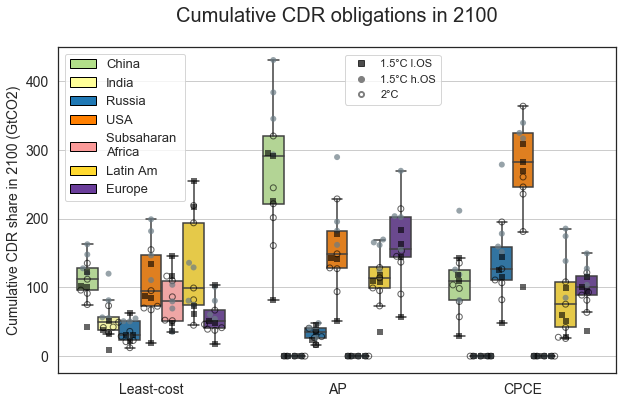

In [92]:
# FIGURE 2 - Boxplot - all models 1.5ho and 1.5lo seperate



regions = ['USA', 'CHN', 'RUS', 'EUR', 'AFR', 'LAM', 'IND']
years = ['2100']
variab = ['CUM_CDR_fair_share_by_CUM_POP', 'CUM_CDR_fair_share_by_GDP', 'CUM_CDR']
boxp_2100 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(regions)) &
                            (boxplot_df_allmodels.Scenario.isin(scen_allmodels)) &
                            (boxplot_df_allmodels.Year.isin(years)) &
                            (boxplot_df_allmodels.variable.isin(variab))]

boxp_2100['value'] = boxp_2100['value'].astype(float)/1000

boxp_15 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15)]
boxp_2 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_2)]
boxp_15_lo = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15_lo)]
boxp_15_ho = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15_ho)]



sns.set_context(font_scale=1, rc={"axes.labelsize":12})

f, axes = plt.subplots(1, 1, figsize=(10,6))

colours = sns.color_palette("Paired",12)
col_lam = sns.color_palette("Set2", 6)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],col_lam[5], colours[9]]
#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6
#AFR 9, CHN 1, EUR 2, IND 3, JPN 10, LAM 5, MEA 6, OAS 7, ROW 8, RUS 0, USA 4

box1 = sns.boxplot(x="variable", y="value", data=boxp_2100, hue = 'Region', 
                   hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], palette = colour_palette,
                  showfliers=False) # palette = 'Paired', palette = "coolwarm" or "husl", orient= 'horizontal'
#box1.annotate('CHN', xy=(0.039, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('IND', xy=(0.075, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('RUS', xy=(0.11, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('USA', xy=(0.15, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('AFR', xy=(0.185, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('LAM', xy=(0.22, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('EUR', xy=(0.26, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)

#box1.annotate('CHN', xy=(0.37, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('IND', xy=(0.41, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('RUS', xy=(0.447, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('USA', xy=(0.48, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('AFR', xy=(0.52, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('LAM', xy=(0.555, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('EUR', xy=(0.6, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)

#box1.annotate('CHN', xy=(0.7, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('IND', xy=(0.74, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('RUS', xy=(0.78, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('USA', xy=(0.818, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('AFR', xy=(0.855, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('LAM', xy=(0.89, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('EUR', xy=(0.92, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)

colours_15 = ["black"]
pal_15 = sns.xkcd_palette(colours_15)
colours_2 = ["battleship grey"]                  # color options https://xkcd.com/color/rgb/
pal_2 = sns.xkcd_palette(colours_2)
colours_15_lo = ["black"]
pal_15_lo = sns.xkcd_palette(colours_15_lo)
colours_15_ho = ["battleship grey"]
pal_15_ho = sns.xkcd_palette(colours_15_ho)

pts = np.linspace(0, np.pi * 2, 24)
circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
vert = np.r_[circ, circ[::-1] * .7]
open_circle = mpl.path.Path(vert)

box1 = sns.swarmplot(x="variable", y="value", data=boxp_2, hue = 'Region', 
                     hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], palette= pal_15, marker = open_circle, dodge = True, s=7, alpha=0.6)
box1 = sns.swarmplot(x="variable", y="value", data=boxp_15_ho, hue = 'Region', 
                     hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], palette = pal_15_ho, marker = 'o', dodge = True, s=6, alpha=0.7)
box1 = sns.swarmplot(x="variable", y="value", data=boxp_15_lo, hue = 'Region', 
                     hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], palette = pal_15_lo, marker = 's', dodge = True, s=6, alpha =0.6)
#marker maybe 's' '*' 'P'

box1.set_ylabel("Cumulative CDR share in 2100 (GtCO2)", fontsize = 14)
box1.set(xlabel = " ")
box1.set(ylim =(-25,450))
box1.set(xticklabels=['Least-cost','AP','CPCE'])
box1.set_title("Cumulative CDR obligations in 2100", fontsize=20, pad = 25)
box1.tick_params(labelsize=14)

colour_palette = [colours[3],colours[0],colours[1],colours[2],colours[4],colours[5], colours[6]]
#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6
from matplotlib.patches import Patch
#handles, labels = box1.get_legend_handles_labels()
l = plt.legend(handles =  [Patch(facecolor=colours[2], edgecolor='k', label='China'), 
                           Patch(facecolor=colours[10], edgecolor='k', label='India'),
                           Patch(facecolor=colours[1], edgecolor='k', label='Russia'),
                           Patch(facecolor=colours[7], edgecolor='k', label='USA'),
                           Patch(facecolor=colours[4], edgecolor='k', label='Subsaharan \nAfrica'),
                           Patch(facecolor=col_lam[5], edgecolor='k', label='Latin Am'),
                           Patch(facecolor=colours[9], edgecolor='k', label='Europe')], fontsize = 13)
l2 = plt.legend(handles=[Line2D([0], [0], linestyle = 'none', marker = 's', color="black", label = '1.5°C l.OS', alpha=0.7),
                         Line2D([0], [0], linestyle = 'none', marker = 'o', color="grey", label = '1.5°C h.OS'),
                Line2D([0], [0], linestyle = 'none', marker = open_circle, color="gray", label = '2°C')],
                loc = 'center', bbox_to_anchor =(0.6, 0.9), fontsize = 11)    # 0.155, 0.68 <- for left side
plt.gca().add_artist(l)

box1.yaxis.grid(True)
box1.xaxis.grid(False)
#plt.savefig(plot_path + 'Figure 2 - Boxplot2100 holo.svg', dpi = 300)
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Boxplot2100.png', bbox_inches = 'tight')
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Boxplot2100.svg', bbox_inches = 'tight', dpi = 300)

/Users/susannebaur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


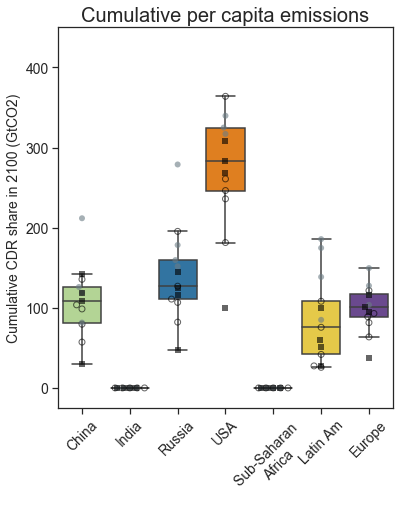

In [28]:


regions = ['USA', 'CHN', 'RUS', 'EUR', 'AFR', 'LAM', 'IND']
years = ['2100']
variab = ['CUM_CDR_fair_share_by_CUM_POP']   #, 'CUM_CDR_fair_share_by_GDP', 'CUM_CDR'
boxp_2100 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(regions)) &
                            (boxplot_df_allmodels.Scenario.isin(scen_allmodels)) &
                            (boxplot_df_allmodels.Year.isin(years)) &
                            (boxplot_df_allmodels.variable.isin(variab))]

boxp_2100['value'] = boxp_2100['value'].astype(float)/1000

boxp_15 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15)]
boxp_2 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_2)]
boxp_15_lo = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15_lo)]
boxp_15_ho = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15_ho)]


sns.set_context("notebook", font_scale=1, rc={"axes.labelsize":12})

f, axes = plt.subplots(1, 1, figsize=(6,7))


colours = sns.color_palette("Paired",12)
col_lam = sns.color_palette("Set2", 6)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],col_lam[5], colours[9]]



box1 = sns.boxplot(x='Region', y="value", data=boxp_2100, palette = colour_palette, order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],
                  showfliers=False) # palette = 'Paired', palette = "coolwarm" or "husl", orient= 'horizontal'


colours_15 = ["black"]
pal_15 = sns.xkcd_palette(colours_15)
colours_2 = ["battleship grey"]                  # color options https://xkcd.com/color/rgb/
pal_2 = sns.xkcd_palette(colours_2)
colours_15_lo = ["black"]
pal_15_lo = sns.xkcd_palette(colours_15_lo)
colours_15_ho = ["battleship grey"]
pal_15_ho = sns.xkcd_palette(colours_15_ho)

pts = np.linspace(0, np.pi * 2, 24)
circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
vert = np.r_[circ, circ[::-1] * .7]
open_circle = mpl.path.Path(vert)

#hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],
box1 = sns.swarmplot(x='Region', y="value", data=boxp_2, order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], palette= pal_15, marker = open_circle, dodge = True, s=7, alpha=0.6)
box1 = sns.swarmplot(x='Region', y="value", data=boxp_15_ho,order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], palette = pal_15_ho, marker = 'o', dodge = True, s=6, alpha=0.6)
box1 = sns.swarmplot(x='Region', y="value", data=boxp_15_lo, order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],palette = pal_15_lo, marker = 's', dodge = True, s=6, alpha =0.6)


box1.set_ylabel("Cumulative CDR share in 2100 (GtCO2)", fontsize = 14)
box1.set_xlabel('')
box1.set(ylim =(-25,450))
box1.set_xticklabels(['China', 'India', 'Russia', 'USA', 'Sub-Saharan \nAfrica', 'Latin Am', 'Europe'], rotation = 45)
box1.set_title("Cumulative per capita emissions", fontsize=20)  #Cumulative CDR obligations in 2100 | equity: 
box1.tick_params(labelsize=14)




box1.grid(False)
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Concept Fig - Boxplot CPCE.svg', dpi = 300)
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Concept Fig - Boxplot CPCE.png', bbox_inches= 'tight')
#plt.savefig(plot_path + 'N - Figure 2 - Boxplot2100 POP single.svg', dpi = 300, bbox_inches= 'tight')

/Users/susannebaur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


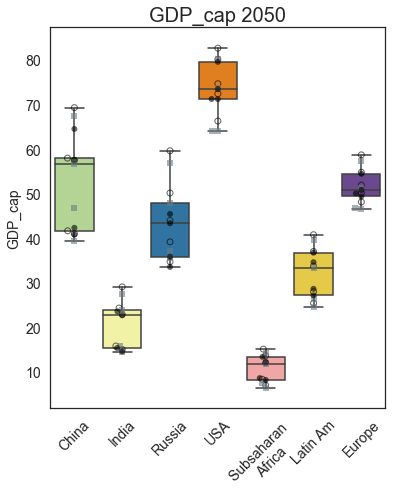

In [61]:
# CDR per cap GDP


regions = ['USA', 'CHN', 'RUS', 'EUR', 'AFR', 'LAM', 'IND']
years = ['2050']
variab = ['GDP_cap']   #, 'CUM_CDR_fair_share_by_GDP', 'CUM_CDR'
boxp_2100 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(regions)) &
                            (boxplot_df_allmodels.Scenario.isin(scen_allmodels)) &
                            (boxplot_df_allmodels.Year.isin(years)) &
                            (boxplot_df_allmodels.variable.isin(variab))]

boxp_2100['value'] = boxp_2100['value'].astype(float)#/1000

boxp_15 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15)]
boxp_2 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_2)]
boxp_15_lo = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15_lo)]
boxp_15_ho = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15_ho)]


sns.set_context("notebook", font_scale=1, rc={"axes.labelsize":12})

f, axes = plt.subplots(1, 1, figsize=(6,7))

colours = sns.color_palette("Paired",12)
col_lam = sns.color_palette("Set2", 6)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],col_lam[5], colours[9]]
#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6
#AFR 9, CHN 1, EUR 2, IND 3, JPN 10, LAM 5, MEA 6, OAS 7, ROW 8, RUS 0, USA 4

box1 = sns.boxplot(x='Region', y="value", data=boxp_2100, palette = colour_palette, order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],
                  showfliers=False) # palette = 'Paired', palette = "coolwarm" or "husl", orient= 'horizontal'


colours_15 = ["black"]
pal_15 = sns.xkcd_palette(colours_15)
colours_2 = ["battleship grey"]                  # color options https://xkcd.com/color/rgb/
pal_2 = sns.xkcd_palette(colours_2)
colours_15_lo = ["black"]
pal_15_lo = sns.xkcd_palette(colours_15_lo)
colours_15_ho = ["battleship grey"]
pal_15_ho = sns.xkcd_palette(colours_15_ho)

pts = np.linspace(0, np.pi * 2, 24)
circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
vert = np.r_[circ, circ[::-1] * .7]
open_circle = mpl.path.Path(vert)

#hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],
box1 = sns.swarmplot(x='Region', y="value", data=boxp_2, order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], palette= pal_15, marker = open_circle, dodge = True, s=7, alpha=0.6)
box1 = sns.swarmplot(x='Region', y="value", data=boxp_15_ho,order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], palette = pal_15_ho, marker = 's', dodge = True, s=6, alpha=0.6)
box1 = sns.swarmplot(x='Region', y="value", data=boxp_15_lo, order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],palette = pal_15_lo, marker = 'o', dodge = True, s=6, alpha =0.6)


box1.set_ylabel("GDP_cap", fontsize = 14)
box1.set_xlabel('')
#box1.set(ylim =(-25,450))
box1.set_xticklabels(['China', 'India', 'Russia', 'USA', 'Subsaharan \nAfrica', 'Latin Am', 'Europe'], rotation = 45)
box1.set_title("GDP_cap 2050", fontsize=20)  #Cumulative CDR obligations in 2100 | equity: 
box1.tick_params(labelsize=14)

colour_palette = [colours[3],colours[0],colours[1],colours[2],colours[4],col_lam[5], colours[6]]
#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6



box1.grid(False)
#plt.savefig(plot_path + 'Figure 2 - Boxplot2100 holo.svg', dpi = 300)
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Boxplot2050 GDP per cap.png', bbox_inches= 'tight')
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Boxplot2100 POP single.svg', dpi = 300, bbox_inches= 'tight')

/Users/susannebaur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


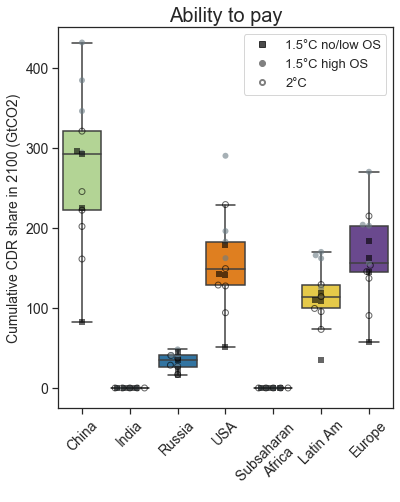

In [26]:


regions = ['USA', 'CHN', 'RUS', 'EUR', 'AFR', 'LAM', 'IND']
years = ['2100']
variab = ['CUM_CDR_fair_share_by_GDP']   # 'CUM_CDR'
boxp_2100 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(regions)) &
                            (boxplot_df_allmodels.Scenario.isin(scen_allmodels)) &
                            (boxplot_df_allmodels.Year.isin(years)) &
                            (boxplot_df_allmodels.variable.isin(variab))]

boxp_2100['value'] = boxp_2100['value'].astype(float)/1000

boxp_15 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15)]
boxp_2 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_2)]
boxp_15_lo = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15_lo)]
boxp_15_ho = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15_ho)]


sns.set_context("notebook", font_scale=1, rc={"axes.labelsize":12})
sns.set_style("ticks")


f, axes = plt.subplots(1, 1, figsize=(6,7))

colours = sns.color_palette("Paired",12)
col_lam = sns.color_palette("Set2", 6)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],col_lam[5], colours[9]]


box1 = sns.boxplot(x='Region', y="value",order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], data=boxp_2100, palette = colour_palette,
                  showfliers=False) # palette = 'Paired', palette = "coolwarm" or "husl", orient= 'horizontal'

colours_15 = ["black"]
pal_15 = sns.xkcd_palette(colours_15)
colours_2 = ["battleship grey"]                  # color options https://xkcd.com/color/rgb/
pal_2 = sns.xkcd_palette(colours_2)
colours_15_lo = ["black"]
pal_15_lo = sns.xkcd_palette(colours_15_lo)
colours_15_ho = ["battleship grey"]
pal_15_ho = sns.xkcd_palette(colours_15_ho)

pts = np.linspace(0, np.pi * 2, 24)
circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
vert = np.r_[circ, circ[::-1] * .7]
open_circle = mpl.path.Path(vert)

box1 = sns.swarmplot(x='Region', y="value", data=boxp_2, order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],palette= pal_15, marker = open_circle, dodge = True, s=7, alpha=0.6)
box1 = sns.swarmplot(x='Region', y="value", data=boxp_15_ho, order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],palette = pal_15_ho, marker = 'o', dodge = True, s=6, alpha=0.6)
box1 = sns.swarmplot(x='Region', y="value", data=boxp_15_lo,order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], palette = pal_15_lo, marker = 's', dodge = True, s=6, alpha =0.6)


box1.set_ylabel("Cumulative CDR share in 2100 (GtCO2)", fontsize = 14)
box1.set_xlabel('')
box1.set(ylim =(-25,450))
box1.set_xticklabels(['China', 'India', 'Russia', 'USA', 'Subsaharan \nAfrica', 'Latin Am', 'Europe'], rotation = 45)
box1.set_title("Ability to pay", fontsize=20) #Cumulative CDR obligations in 2100 | equity: AP
box1.tick_params(labelsize=14)

plt.legend(handles=[Line2D([0], [0], linestyle = 'none', marker = 's', color="black", label = '1.5°C no/low OS', alpha=0.7),
                         Line2D([0], [0], linestyle = 'none', marker = 'o', color="grey", label = '1.5°C high OS'),
                Line2D([0], [0], linestyle = 'none', marker = open_circle, color="grey", label = '2°C')],
                loc = 'upper right', fontsize = 13)

box1.grid(False)
#plt.savefig(plot_path + 'Figure 2 - Boxplot2100 holo.svg', dpi = 300)
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Boxplot2100 AP.png', bbox_inches= 'tight')
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Boxplot2100 AP.svg', bbox_inches= 'tight', dpi = 300)

/Users/susannebaur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


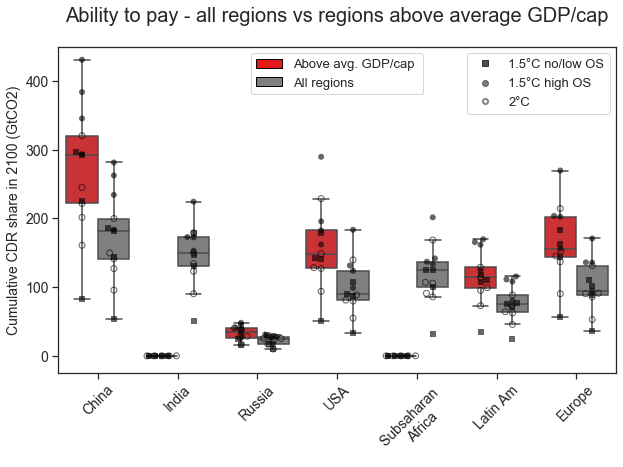

In [102]:
# Comparing GDP equity - all countries vs countries above avg. GDPc

regions = ['USA', 'CHN', 'RUS', 'EUR', 'AFR', 'LAM', 'IND']
years = ['2100']
variab = ['CUM_CDR_fair_share_by_GDP', 'Cum_M']   # 'CUM_CDR'
boxp_2100 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(regions)) &
                            (boxplot_df_allmodels.Scenario.isin(scen_allmodels)) &
                            (boxplot_df_allmodels.Year.isin(years)) &
                            (boxplot_df_allmodels.variable.isin(variab))]

boxp_2100['value'] = boxp_2100['value'].astype(float)/1000

boxp_15 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15)]
boxp_2 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_2)]
boxp_15_lo = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15_lo)]
boxp_15_ho = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15_ho)]


sns.set_context("notebook", font_scale=1, rc={"axes.labelsize":12})
sns.set_style("ticks")


f, axes = plt.subplots(1, 1, figsize=(10,6))
#f.subplots_adjust(top=1.5) #, wspace=0.45, hspace = 0.5)

colours = sns.color_palette("Paired",12)
col_lam = sns.color_palette("Set2", 6)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],col_lam[5], colours[9]]

col_palette = [colours[5], 'grey']


box1 = sns.boxplot(x='Region', y="value",hue = 'variable', order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], hue_order = ['CUM_CDR_fair_share_by_GDP', 'Cum_M'], 
                   data=boxp_2100, palette = col_palette,
                  showfliers=False) # palette = 'Paired', palette = "coolwarm" or "husl", orient= 'horizontal'

colours_15 = ["black"]
pal_15 = sns.xkcd_palette(colours_15)
colours_2 = ["battleship grey"]                  # color options https://xkcd.com/color/rgb/
pal_2 = sns.xkcd_palette(colours_2)
colours_15_lo = ["black"]
pal_15_lo = sns.xkcd_palette(colours_15_lo)
colours_15_ho = ["black"]
pal_15_ho = sns.xkcd_palette(colours_15_ho)

pts = np.linspace(0, np.pi * 2, 24)
circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
vert = np.r_[circ, circ[::-1] * .7]
open_circle = mpl.path.Path(vert)

box1 = sns.swarmplot(x='Region', y="value", hue = 'variable', data=boxp_2, order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],hue_order = ['CUM_CDR_fair_share_by_GDP', 'Cum_M'],
                     palette= pal_15, marker = open_circle, dodge = True, s=7, alpha=0.6)
box1 = sns.swarmplot(x='Region', y="value", hue = 'variable',data=boxp_15_ho, order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],hue_order = ['CUM_CDR_fair_share_by_GDP', 'Cum_M'],
                     palette = pal_15_ho, marker = 'o', edgecolor = 'black',dodge = True, s=6, alpha=0.6)
box1 = sns.swarmplot(x='Region', y="value", hue = 'variable',data=boxp_15_lo, order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], hue_order = ['CUM_CDR_fair_share_by_GDP', 'Cum_M'],
                     palette = pal_15_lo, marker = 's', dodge = True, s=6, alpha =0.6)


box1.set_ylabel("Cumulative CDR share in 2100 (GtCO2)", fontsize = 14)
box1.set_xlabel('')
box1.set(ylim =(-25,450))
box1.set_xticklabels(['China', 'India', 'Russia', 'USA', 'Subsaharan \nAfrica', 'Latin Am', 'Europe'], rotation = 45)
box1.set_title("Ability to pay - all regions vs regions above average GDP/cap", fontsize=20, pad=25) #Cumulative CDR obligations in 2100 | equity: AP
box1.tick_params(labelsize=14)

l = plt.legend(handles =  [Patch(facecolor=colours[5], edgecolor='k', label='Above avg. GDP/cap '), 
                           Patch(facecolor='gray', edgecolor='k', label='All regions')], loc = 'upper center',fontsize = 13)

l2 = plt.legend(handles=[Line2D([0], [0], linestyle = 'none', marker = 's', color="black", label = '1.5°C no/low OS', alpha=0.7),
                         Line2D([0], [0], linestyle = 'none', marker = 'o', color="black", label = '1.5°C high OS', alpha = 0.5),
                Line2D([0], [0], linestyle = 'none', marker = open_circle, color="grey", label = '2°C')],
                loc = 'upper right', fontsize = 13)

plt.gca().add_artist(l)

box1.grid(False)

plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/AP_all_regions_vs_GDPc.png', bbox_inches= 'tight')
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/AP_all_regions_vs_GDPc.svg', bbox_inches= 'tight', dpi = 300)

/Users/susannebaur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


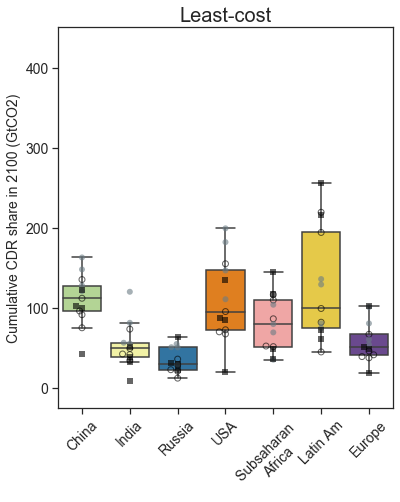

In [27]:


regions = ['USA', 'CHN', 'RUS', 'EUR', 'AFR', 'LAM', 'IND']
years = ['2100']
variab = ['CUM_CDR']   
boxp_2100 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(regions)) &
                            (boxplot_df_allmodels.Scenario.isin(scen_allmodels)) &
                            (boxplot_df_allmodels.Year.isin(years)) &
                            (boxplot_df_allmodels.variable.isin(variab))]

boxp_2100['value'] = boxp_2100['value'].astype(float)/1000

boxp_15 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15)]
boxp_2 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_2)]
boxp_15_lo = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15_lo)]
boxp_15_ho = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15_ho)]


sns.set_context("notebook", font_scale=1, rc={"axes.labelsize":12})

f, axes = plt.subplots(1, 1, figsize=(6,7))


colours = sns.color_palette("Paired",12)
col_lam = sns.color_palette("Set2", 6)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],col_lam[5], colours[9]]

box1 = sns.boxplot(x='Region', y="value", data=boxp_2100, order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],palette = colour_palette,
                  showfliers=False) # palette = 'Paired', palette = "coolwarm" or "husl", orient= 'horizontal'


colours_15 = ["black"]
pal_15 = sns.xkcd_palette(colours_15)
colours_2 = ["battleship grey"]                  # color options https://xkcd.com/color/rgb/
pal_2 = sns.xkcd_palette(colours_2)
colours_15_lo = ["black"]
pal_15_lo = sns.xkcd_palette(colours_15_lo)
colours_15_ho = ["battleship grey"]
pal_15_ho = sns.xkcd_palette(colours_15_ho)

pts = np.linspace(0, np.pi * 2, 24)
circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
vert = np.r_[circ, circ[::-1] * .7]
open_circle = mpl.path.Path(vert)

box1 = sns.swarmplot(x='Region', y="value", data=boxp_2, order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],palette= pal_15, marker = open_circle, dodge = True, s=7, alpha=0.6)
box1 = sns.swarmplot(x='Region', y="value", data=boxp_15_ho, order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],palette = pal_15_ho, marker = 'o', dodge = True, s=6, alpha=0.6)
box1 = sns.swarmplot(x='Region', y="value", data=boxp_15_lo, order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],palette = pal_15_lo, marker = 's', dodge = True, s=6, alpha =0.6)
#marker maybe 's' '*' 'P'

box1.set_ylabel("Cumulative CDR share in 2100 (GtCO2)", fontsize = 14)
box1.set_xlabel('')
box1.set(ylim =(-25,450))
box1.set_xticklabels(['China', 'India', 'Russia', 'USA', 'Subsaharan \nAfrica', 'Latin Am', 'Europe'], rotation = 45)
box1.set_title("Least-cost", fontsize=20)   #Cumulative CDR obligations in 2100 | 
box1.tick_params(labelsize=14)

colour_palette = [colours[3],colours[0],colours[1],colours[2],colours[4],col_lam[5], colours[6]]
#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6



box1.grid(False)
#plt.savefig(plot_path + 'Figure 2 - Boxplot2100 holo.svg', dpi = 300)
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Concept Fig - Boxplot LeastCost.png', bbox_inches= 'tight')
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Concept Fig - Boxplot LeastCost.svg', bbox_inches= 'tight', dpi = 300)

/Users/clairefyson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


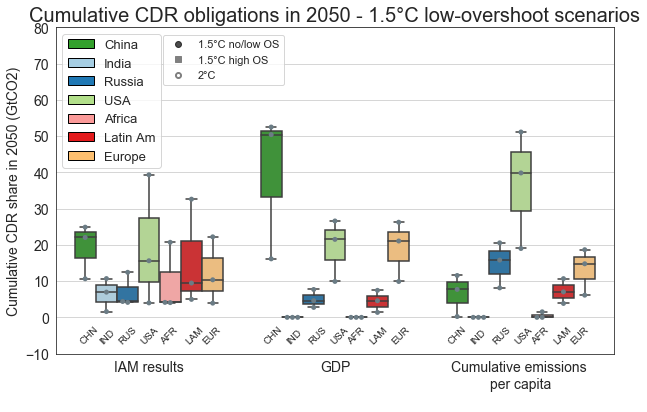

In [46]:
# FIGURE 2 - Boxplot - all models - only 1.5 low overshoot



regions = ['USA', 'CHN', 'RUS', 'EUR', 'AFR', 'LAM', 'IND']
years = ['2050']
variab = ['CUM_CDR_fair_share_by_CUM_POP', 'CUM_CDR_fair_share_by_GDP', 'CUM_CDR']
boxp_2050 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(regions)) &
                            (boxplot_df_allmodels.Scenario.isin(scen_15_lo)) &
                            (boxplot_df_allmodels.Year.isin(years)) &
                            (boxplot_df_allmodels.variable.isin(variab))]

boxp_2050['value'] = boxp_2050['value'].astype(float)/1000


boxp_15 = boxp_2050.loc[boxp_2050.Scenario.isin(scen_15_lo)]
#boxp_2 = boxp_2050.loc[boxp_2050.Scenario.isin(scen_2)]


colours = sns.color_palette("Paired",12)
colour_palette = [colours[3],colours[0],colours[1],colours[2],colours[4],colours[5], colours[6]]

sns.set_context(font_scale=1, rc={"axes.labelsize":12})

f, axes = plt.subplots(1, 1, figsize=(10,6))

box1 = sns.boxplot(x="variable", y="value", data=boxp_2050, hue = 'Region', hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],
                   palette = colour_palette) # palette = "coolwarm" or "husl", orient= 'horizontal'
box1.annotate('CHN', xy=(0.04, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.075, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.11, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.15, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.185, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.23, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.26, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.37, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.41, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.45, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.49, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.52, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.56, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.6, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.7, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.74, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.78, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.82, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.85, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.89, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.92, 0.03), xycoords='axes fraction', rotation=45)


#colours = sns.color_palette("Set2",8)
#colour_palette = [colours[8]]
#farbe = sns.xkcd_rgb["pale red"], lw=3

colours_15 = ["battleship grey"]
pal_15 = sns.xkcd_palette(colours_15)
#colours_2 = ["light grey"]                  # color options https://xkcd.com/color/rgb/
#pal_2 = sns.xkcd_palette(colours_2)

box1 = sns.swarmplot(x="variable", y="value", data=boxp_15, hue = 'Region',hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],
                     palette = pal_15, marker = 'o', facecolors='none', dodge = True)
#box1 = sns.swarmplot(x="variable", y="value", data=boxp_2, hue = 'Region', palette = pal_2, marker = 'o',  facecolors='none', dodge = True)


box1.set_ylabel("Cumulative CDR share in 2050 (GtCO2)", fontsize = 14)
box1.set(xlabel = " ")
box1.set(ylim =(-10,80))
box1.set(xticklabels=['IAM results','GDP','Cumulative emissions \nper capita'])
box1.set_title("Cumulative CDR obligations in 2050 - 1.5°C low-overshoot scenarios", fontsize=20)
box1.tick_params(labelsize=14)


handles, labels = box1.get_legend_handles_labels()
# l = plt.legend(handles[0:7], labels[0:7])
colour_palette = [colours[3],colours[0],colours[1],colours[2],colours[4],colours[5], colours[6]]
#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6
from matplotlib.patches import Patch
#handles, labels = box1.get_legend_handles_labels()
l = plt.legend(handles =  [Patch(facecolor=colours[3], edgecolor='k', label='China'), 
                           Patch(facecolor=colours[0], edgecolor='k', label='India'),
                           Patch(facecolor=colours[1], edgecolor='k', label='Russia'),
                           Patch(facecolor=colours[2], edgecolor='k', label='USA'),
                           Patch(facecolor=colours[4], edgecolor='k', label='Africa'),
                           Patch(facecolor=colours[5], edgecolor='k', label='Latin Am'),
                           Patch(facecolor=colours[6], edgecolor='k', label='Europe')], fontsize = 13)
l2 = plt.legend(handles=[Line2D([0], [0], linestyle = 'none', marker = 'o', color="black", label = '1.5°C no/low OS', alpha=0.7),
                         Line2D([0], [0], linestyle = 'none', marker = 's', color="grey", label = '1.5°C high OS'),
                Line2D([0], [0], linestyle = 'none', marker = open_circle, color="grey", label = '2°C')],
                loc = 'center', bbox_to_anchor =(0.3, 0.9), fontsize = 11)    # 0.155, 0.68 <- for left side
# l2 = plt.legend(handles=[Line2D([0], [0], marker = 'o', color="grey", label = '1.5°C')], loc = 'best', bbox_to_anchor =(1.0, 0.68))
plt.gca().add_artist(l)
#box1.legend(frameon = False) #bbox_to_anchor=(1.05, 1),borderaxespad=0.   -> bbox und borderaxespad nur wenn Legende außerhalb plot sein soll
        # legend ['Fair CDR according to model', 'Fair CDR according to equity calc (cum pop)', 'Fair CDR according to equity calc (GDP)'],
box1.grid('on')
box1.xaxis.grid(False)
plt.savefig(plot_path + 'F - Figure 2 - Boxplot2050 1.5 lo.png')
plt.savefig(plot_path + 'F - Figure 2 - Boxplot2050 1.5 lo.svg', dpi = 300)

/Users/clairefyson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


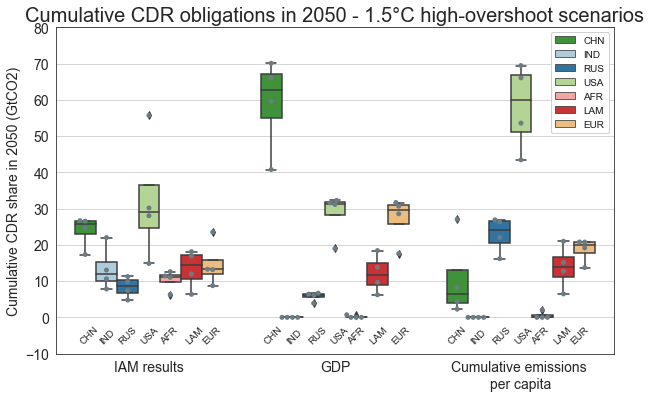

In [35]:
# FIGURE 2 - Boxplot - all models - only 1.5 high overshoot scenarios


regions = ['USA', 'CHN', 'RUS', 'EUR', 'AFR', 'LAM', 'IND']
years = ['2050']
variab = ['CUM_CDR_fair_share_by_CUM_POP', 'CUM_CDR_fair_share_by_GDP', 'CUM_CDR']
boxp_2050 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(regions)) &
                            (boxplot_df_allmodels.Scenario.isin(scen_15_ho)) &
                            (boxplot_df_allmodels.Year.isin(years)) &
                            (boxplot_df_allmodels.variable.isin(variab))]

boxp_2050['value'] = boxp_2050['value'].astype(float)/1000


boxp_15 = boxp_2050.loc[boxp_2050.Scenario.isin(scen_15_ho)]
#boxp_2 = boxp_2050.loc[boxp_2050.Scenario.isin(scen_2)]


colours = sns.color_palette("Paired",12)
colour_palette = [colours[3],colours[0],colours[1],colours[2],colours[4],colours[5], colours[6]]

sns.set_context(font_scale=1, rc={"axes.labelsize":12})

f, axes = plt.subplots(1, 1, figsize=(10,6))

box1 = sns.boxplot(x="variable", y="value", data=boxp_2050, hue = 'Region', hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],
                   palette = colour_palette) # palette = "coolwarm" or "husl", orient= 'horizontal'
box1.annotate('CHN', xy=(0.04, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.075, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.11, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.15, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.185, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.23, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.26, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.37, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.41, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.45, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.49, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.52, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.56, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.6, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.7, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.74, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.78, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.82, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.85, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.89, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.92, 0.03), xycoords='axes fraction', rotation=45)


#colours = sns.color_palette("Set2",8)
#colour_palette = [colours[8]]
#farbe = sns.xkcd_rgb["pale red"], lw=3

colours_15 = ["battleship grey"]
pal_15 = sns.xkcd_palette(colours_15)
#colours_2 = ["light grey"]                  # color options https://xkcd.com/color/rgb/
#pal_2 = sns.xkcd_palette(colours_2)

box1 = sns.swarmplot(x="variable", y="value", data=boxp_15, hue = 'Region', hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],
                     palette = pal_15, marker = 'o', facecolors='none', dodge = True)
#box1 = sns.swarmplot(x="variable", y="value", data=boxp_2, hue = 'Region', palette = pal_2, marker = 'o',  facecolors='none', dodge = True)


box1.set_ylabel("Cumulative CDR share in 2050 (GtCO2)", fontsize = 14)
box1.set(xlabel = " ")
box1.set(ylim =(-10,80))
box1.set(xticklabels=['IAM results','GDP','Cumulative emissions \nper capita'])
box1.set_title("Cumulative CDR obligations in 2050 - 1.5°C high-overshoot scenarios", fontsize=20)
box1.tick_params(labelsize=14)


handles, labels = box1.get_legend_handles_labels()
l = plt.legend(handles[0:7], labels[0:7])
# l2 = plt.legend(handles=[Line2D([0], [0], marker = 'o', color="grey", label = '1.5°C')], loc = 'best', bbox_to_anchor =(1.0, 0.68))
plt.gca().add_artist(l)
#box1.legend(frameon = False) #bbox_to_anchor=(1.05, 1),borderaxespad=0.   -> bbox und borderaxespad nur wenn Legende außerhalb plot sein soll
        # legend ['Fair CDR according to model', 'Fair CDR according to equity calc (cum pop)', 'Fair CDR according to equity calc (GDP)'],
box1.grid('on')
box1.xaxis.grid(False)
plt.savefig(plot_path + 'F - Figure 2 - Boxplot2050 15 ho ygrid.png')
plt.savefig(plot_path + 'F - Figure 2 - Boxplot2050 15 ho ygrid.svg', dpi = 300)

/Users/clairefyson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


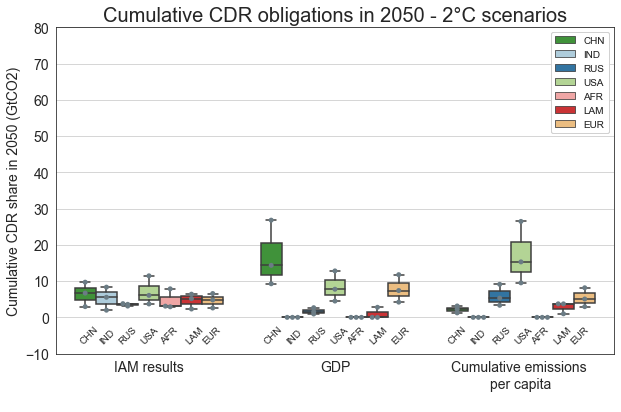

In [36]:
# FIGURE 2 - Boxplot - all models - only 2 scenarios INCL MESSAGE


regions = ['USA', 'CHN', 'RUS', 'EUR', 'AFR', 'LAM', 'IND']
years = ['2050']
variab = ['CUM_CDR_fair_share_by_CUM_POP', 'CUM_CDR_fair_share_by_GDP', 'CUM_CDR']
boxp_2050 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(regions)) &
                            (boxplot_df_allmodels.Scenario.isin(scen_2)) &
                            (boxplot_df_allmodels.Year.isin(years)) &
                            (boxplot_df_allmodels.variable.isin(variab))]

boxp_2050['value'] = boxp_2050['value'].astype(float)/1000


#boxp_15 = boxp_2050.loc[boxp_2050.Scenario.isin(scen_15)]
boxp_2 = boxp_2050.loc[boxp_2050.Scenario.isin(scen_2)]


colours = sns.color_palette("Paired",12)
colour_palette = [colours[3],colours[0],colours[1],colours[2],colours[4],colours[5], colours[6]]

sns.set_context(font_scale=1, rc={"axes.labelsize":12})

f, axes = plt.subplots(1, 1, figsize=(10,6))

box1 = sns.boxplot(x="variable", y="value", data=boxp_2050, hue = 'Region', hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],
                   palette = colour_palette) # palette = "coolwarm" or "husl", orient= 'horizontal'
box1.annotate('CHN', xy=(0.04, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.075, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.11, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.15, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.185, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.23, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.26, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.37, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.41, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.45, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.49, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.52, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.56, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.6, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.7, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.74, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.78, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.82, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.85, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.89, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.92, 0.03), xycoords='axes fraction', rotation=45)


#colours = sns.color_palette("Set2",8)
#colour_palette = [colours[8]]
#farbe = sns.xkcd_rgb["pale red"], lw=3

colours_15 = ["battleship grey"]
pal_15 = sns.xkcd_palette(colours_15)
#colours_2 = ["light grey"]                  # color options https://xkcd.com/color/rgb/
#pal_2 = sns.xkcd_palette(colours_2)

#box1 = sns.swarmplot(x="variable", y="value", data=boxp_15, hue = 'Region', palette = pal_15, marker = 'o', facecolors='none', dodge = True)
box1 = sns.swarmplot(x="variable", y="value", data=boxp_2, hue = 'Region',hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],
                     palette = pal_15, marker = 'o',  facecolors='none', dodge = True)


box1.set_ylabel("Cumulative CDR share in 2050 (GtCO2)", fontsize = 14)
box1.set(xlabel = " ")
box1.set(ylim =(-10,80))
box1.set(xticklabels=['IAM results','GDP','Cumulative emissions \nper capita'])
box1.set_title("Cumulative CDR obligations in 2050 - 2°C scenarios", fontsize=20)
box1.tick_params(labelsize=14)


handles, labels = box1.get_legend_handles_labels()
l = plt.legend(handles[0:7], labels[0:7])
# l2 = plt.legend(handles=[Line2D([0], [0], marker = 'o', color="grey", label = '2°C')], loc = 'best', bbox_to_anchor =(1.0, 0.68))
plt.gca().add_artist(l)
#box1.legend(frameon = False) #bbox_to_anchor=(1.05, 1),borderaxespad=0.   -> bbox und borderaxespad nur wenn Legende außerhalb plot sein soll
        # legend ['Fair CDR according to model', 'Fair CDR according to equity calc (cum pop)', 'Fair CDR according to equity calc (GDP)'],
box1.grid('on')
box1.xaxis.grid(False)
plt.savefig(plot_path + 'F - Figure 2 - Boxplot2050 2 scenarios ygrid.png')
plt.savefig(plot_path + 'F - Figure 2 - Boxplot2050 2 scenarios ygrid.svg', dpi = 300)

/Users/susannebaur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


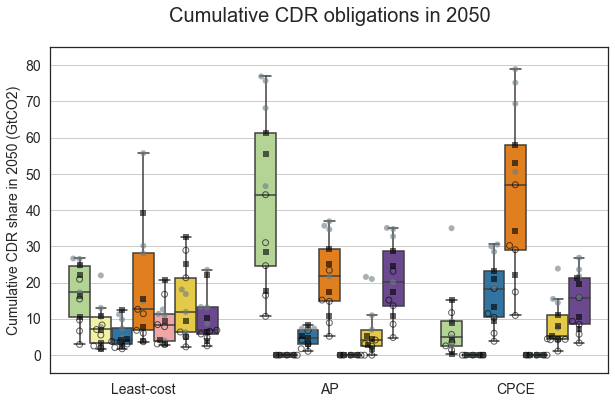

In [93]:
# FIGURE 2 - Boxplot 2050  - all models 1.5ho and 1.5lo seperate



regions = ['USA', 'CHN', 'RUS', 'EUR', 'AFR', 'LAM', 'IND']
years = ['2050']
variab = ['CUM_CDR_fair_share_by_CUM_POP', 'CUM_CDR_fair_share_by_GDP', 'CUM_CDR']
boxp_2050 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(regions)) &
                            (boxplot_df_allmodels.Scenario.isin(scen_allmodels)) &
                            (boxplot_df_allmodels.Year.isin(years)) &
                            (boxplot_df_allmodels.variable.isin(variab))]

boxp_2050['value'] = boxp_2050['value'].astype(float)/1000

boxp_15 = boxp_2050.loc[boxp_2050.Scenario.isin(scen_15)]
boxp_2 = boxp_2050.loc[boxp_2050.Scenario.isin(scen_2)]
boxp_15_lo = boxp_2050.loc[boxp_2050.Scenario.isin(scen_15_lo)]
boxp_15_ho = boxp_2050.loc[boxp_2050.Scenario.isin(scen_15_ho)]



sns.set_context(font_scale=1, rc={"axes.labelsize":12})

f, axes = plt.subplots(1, 1, figsize=(10,6))

colours = sns.color_palette("Paired",12)
col_lam = sns.color_palette("Set2", 6)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],col_lam[5], colours[9]]

box1 = sns.boxplot(x="variable", y="value", data=boxp_2050, hue = 'Region', palette = colour_palette, showfliers=False) # palette = 'Paired', palette = "coolwarm" or "husl", orient= 'horizontal'
#box1.annotate('CHN', xy=(0.039, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('IND', xy=(0.075, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('RUS', xy=(0.11, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('USA', xy=(0.15, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('AFR', xy=(0.185, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('LAM', xy=(0.22, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('EUR', xy=(0.26, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)

#box1.annotate('CHN', xy=(0.37, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('IND', xy=(0.41, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('RUS', xy=(0.447, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('USA', xy=(0.48, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('AFR', xy=(0.52, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('LAM', xy=(0.555, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('EUR', xy=(0.6, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)

#box1.annotate('CHN', xy=(0.7, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('IND', xy=(0.74, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('RUS', xy=(0.78, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('USA', xy=(0.82, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('AFR', xy=(0.855, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('LAM', xy=(0.89, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)
#box1.annotate('EUR', xy=(0.92, 0.02), xycoords='axes fraction', rotation=45, fontsize = 12)

colours_15 = ["black"]
pal_15 = sns.xkcd_palette(colours_15)
colours_2 = ["light grey"]                  # color options https://xkcd.com/color/rgb/
pal_2 = sns.xkcd_palette(colours_2)
colours_15_lo = ["black"]
pal_15_lo = sns.xkcd_palette(colours_15_lo)
colours_15_ho = ["battleship grey"]
pal_15_ho = sns.xkcd_palette(colours_15_ho)


pts = np.linspace(0, np.pi * 2, 24)
circ = np.c_[np.sin(pts) / 2, -np.cos(pts) / 2]
vert = np.r_[circ, circ[::-1] * .7]
open_circle = mpl.path.Path(vert)

box1 = sns.swarmplot(x="variable", y="value", data=boxp_2, hue = 'Region', 
                     hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], palette= pal_15, marker = open_circle, dodge = True, s=7, alpha=0.6)
box1 = sns.swarmplot(x="variable", y="value", data=boxp_15_ho, hue = 'Region', 
                     hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], palette = pal_15_ho, marker = 'o', dodge = True, s=6, alpha=0.6)
box1 = sns.swarmplot(x="variable", y="value", data=boxp_15_lo, hue = 'Region', 
                     hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], palette = pal_15_lo, marker = 's', dodge = True, s=6, alpha =0.6)
#marker maybe 's' '*' 'P'


box1.set_ylabel("Cumulative CDR share in 2050 (GtCO2)", fontsize = 14)
box1.set(xlabel = " ")
box1.set(ylim =(-5,85))
box1.set(xticklabels=['Least-cost','AP','CPCE'])
box1.set_title("Cumulative CDR obligations in 2050", fontsize=20, pad = 25)
box1.tick_params(labelsize=14)

handles, labels = box1.get_legend_handles_labels()
l = plt.legend(handles[0:7], labels[0:7], fontsize = 12)
l2 = plt.legend(handles=[Line2D([0], [0], linestyle = 'none', marker = 'o', color="grey", label = '1.5°C lo'),
                         Line2D([0], [0], linestyle = 'none', marker = 's', color="black", label = '1.5°C ho'),
            Line2D([0], [0], linestyle = 'none', marker = open_circle, color="black", label = '2°C', alpha=0.7)], 
                loc = 'center right', bbox_to_anchor =(1.0, 0.5), fontsize = 12)    # 0.155, 0.68 <- for left side
plt.gca().add_artist(l)
l2.remove()
l.remove()

# box1.grid(False)
box1.yaxis.grid(which = "major")
box1.xaxis.grid(False)
#plt.savefig(plot_path + 'Figure 2 - Boxplot2050 holo.svg', dpi = 300)
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Boxplot2050.png', bbox_inches= 'tight')
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Boxplot2050.svg', bbox_inches= 'tight', dpi = 300)

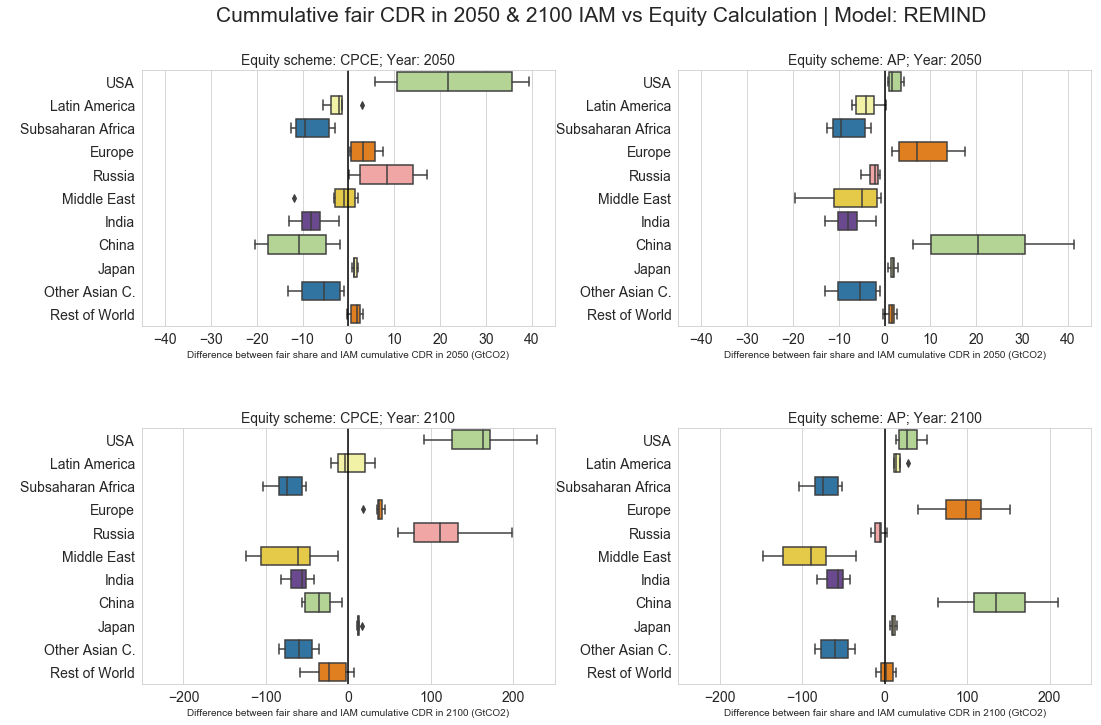

In [37]:
### FIGURE 3 - Plot cumulative fair CDR in 2100  - only REMIND!!

sns.set_style('whitegrid')
years=[2050,2100]
rfilt_wo_world=(equity_remind.Region!='World')
scen_15 =['SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17','SSP5-19-SPA5-V17']
sfilt = (equity_remind.Scenario.isin(scen_15))
scen_filt = (equity_remind.Scenario.isin(scen_allmodels))

p_data=equity_remind[equity_remind.Year.isin(years)&rfilt_wo_world&scen_filt]   
# p_data=equity_remind[equity_remind.Year.isin(years)&rfilt_wo_world&sfilt]  #for only RCP1.9 pathways

p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_CUM_POP'] = p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_CUM_POP']/1000
p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_GDP'] = p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_GDP']/1000

CUM_POP_data=pd.DataFrame(columns=['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq','CUM_CDR_EQ','CUM CDR difference IAM vs EQ','EQ_Method'])

CUM_POP_data[['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq',
             'CUM_CDR_EQ','CUM CDR difference IAM vs EQ']]=p_data[['Year','Scenario','Region',
                                                              'CDR_fair_share_by_CUM_POP',
                                                              'CDR_model_vs_fair_share_by_CUM_POP',
                                                              'CUM_CDR_fair_share_by_CUM_POP',
                                                              'CUM_CDR_model_vs_fair_share_by_CUM_POP']]
CUM_POP_data['EQ_Method']='CUM_POP'

GDP_data=pd.DataFrame(columns=['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq','CUM_CDR_EQ','CUM CDR difference IAM vs EQ','EQ_Method'])

GDP_data[['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq'
         ,'CUM_CDR_EQ','CUM CDR difference IAM vs EQ']]=p_data[['Year','Scenario','Region',
                                                              'CDR_fair_share_by_GDP',
                                                              'CDR_model_vs_fair_share_by_GDP',
                                                              'CUM_CDR_fair_share_by_GDP',
                                                              'CUM_CDR_model_vs_fair_share_by_GDP']]
GDP_data['EQ_Method']='GDP'

pl_data=CUM_POP_data.append(GDP_data)

pl_data['Region'] = pl_data['Region'].str.replace('CHN', 'China')
pl_data['Region'] = pl_data['Region'].str.replace('AFR', 'Subsaharan Africa')
pl_data['Region'] = pl_data['Region'].str.replace('EUR', 'Europe')
pl_data['Region'] = pl_data['Region'].str.replace('IND', 'India')
pl_data['Region'] = pl_data['Region'].str.replace('JPN', 'Japan')
pl_data['Region'] = pl_data['Region'].str.replace('LAM', 'Latin America')
pl_data['Region'] = pl_data['Region'].str.replace('MEA', 'Middle East')
pl_data['Region'] = pl_data['Region'].str.replace('OAS', 'Other Asian C.')
pl_data['Region'] = pl_data['Region'].str.replace('ROW', 'Rest of World')
pl_data['Region'] = pl_data['Region'].str.replace('RUS', 'Russia')

pl_data_50 = pl_data.loc[(pl_data.Year == 2050)& (pl_data.EQ_Method == 'CUM_POP')]
pl_data_50_SSP1 = pl_data_50.loc[(pl_data_50.Scenario == 'SSP1-19-SPA1-V17')]
pl_data_50_SSP5 = pl_data_50.loc[(pl_data_50.Scenario == 'SSP5-19-SPA5-V17')]

pl_data_100 = pl_data.loc[(pl_data.Year == 2100)& (pl_data.EQ_Method == 'CUM_POP')]
pl_data_100_SSP1 = pl_data_100.loc[(pl_data_100.Scenario == 'SSP1-19-SPA1-V17')]
pl_data_100_SSP5 = pl_data_100.loc[(pl_data_100.Scenario == 'SSP5-19-SPA5-V17')]

gdp_data_50 = pl_data.loc[(pl_data.Year == 2050)& (pl_data.EQ_Method == 'GDP')]
gdp_data_50_SSP1 = gdp_data_50.loc[(gdp_data_50.Scenario == 'SSP1-19-SPA1-V17')]
gdp_data_50_SSP5 = gdp_data_50.loc[(gdp_data_50.Scenario == 'SSP5-19-SPA5-V17')]

gdp_data_100 = pl_data.loc[(pl_data.Year == 2100)& (pl_data.EQ_Method == 'GDP')]
gdp_data_100_SSP1 = gdp_data_100.loc[(gdp_data_100.Scenario == 'SSP1-19-SPA1-V17')]
gdp_data_100_SSP5 = gdp_data_100.loc[(gdp_data_100.Scenario == 'SSP5-19-SPA5-V17')]

pl_data_50  = pl_data_50.reset_index()
pl_data_100  = pl_data_100.reset_index()
gdp_data_50  = gdp_data_50.reset_index()
gdp_data_100  = gdp_data_100.reset_index()
pl_data_50_SSP1  = pl_data_50_SSP1.reset_index()
pl_data_50_SSP5  = pl_data_50_SSP5.reset_index()
gdp_data_50_SSP1  = gdp_data_50_SSP1.reset_index()
gdp_data_50_SSP5  = gdp_data_50_SSP5.reset_index()
pl_data_100_SSP1  = pl_data_100_SSP1.reset_index()
pl_data_100_SSP5  = pl_data_100_SSP5.reset_index()
gdp_data_100_SSP1  = gdp_data_100_SSP1.reset_index()
gdp_data_100_SSP5  = gdp_data_100_SSP5.reset_index()

fig, axs = plt.subplots(2,2,  figsize=(17,11)) #sharex = True, sharey = True
title = fig.suptitle("Cummulative fair CDR in 2050 & 2100 IAM vs Equity Calculation | Model: REMIND", fontsize = 21)
fig.subplots_adjust(top=0.9, wspace=0.3, hspace = 0.4)

colours = sns.color_palette("Paired",12)
col_lam = sns.color_palette("Set2", 6)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],col_lam[5], colours[9]]



# box1.set(ylim =(-50,450))
# box1.set(xticklabels=['IAM results','GDP','Cumulative emissions \nper capita'])

regions_order = ['USA', 'Latin America', 'Subsaharan Africa', 'Europe', 'Russia', 'Middle East', 'India', 
                 'China', 'Japan', 'Other Asian C.', 'Rest of World']

axs_pop_50 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', 
                          data= pl_data_50, order = regions_order,
                         palette = colour_palette, ax = axs[0,0]).set_title('Equity scheme: CPCE; Year: 2050', fontsize = 14)
axs_pop_100 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', 
                           data= pl_data_100, order = regions_order,
                          palette = colour_palette, ax = axs[1,0]).set_title('Equity scheme: CPCE; Year: 2100', fontsize = 14)
axs_gdp_50 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', 
                          data= gdp_data_50, order = regions_order,
                         palette = colour_palette, ax = axs[0,1]).set_title('Equity scheme: AP; Year: 2050', fontsize = 14)
axs_gdp_100 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', 
                           data= gdp_data_100, order = regions_order,
                          palette = colour_palette, ax = axs[1,1]).set_title('Equity scheme: AP; Year: 2100', fontsize = 14)


axs[0,0].set_xlim([-45, 45])
axs[1,0].set_xlim([-250, 250])
axs[0,1].set_xlim([-45, 45])
axs[1,1].set_xlim([-250, 250])

axs[0,0].axvline(color = 'black')
axs[1,0].axvline(color = 'black')
axs[0,1].axvline(color = 'black')
axs[1,1].axvline(color = 'black')

axs[1,0].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)")
axs[1,1].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)")
axs[0,0].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2050 (GtCO2)")
axs[0,1].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2050 (GtCO2)")
axs[1,0].set(ylabel = " ")
axs[1,1].set(ylabel = " ")
axs[0,0].set(ylabel = " ")
axs[0,1].set(ylabel = " ")


axs[1,0].tick_params(labelsize=14)
axs[1,1].tick_params(labelsize=14)
axs[0,0].tick_params(labelsize=14)
axs[0,1].tick_params(labelsize=14)

# axs_pop_50.legend()
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Figure 4 - REMIND Regions.png')
#plt.savefig(plot_path + 'Figure 4 - REMIND Regions.svg', dpi = 300, edgecolor = "white", transparent = True)

/Users/clairefyson/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


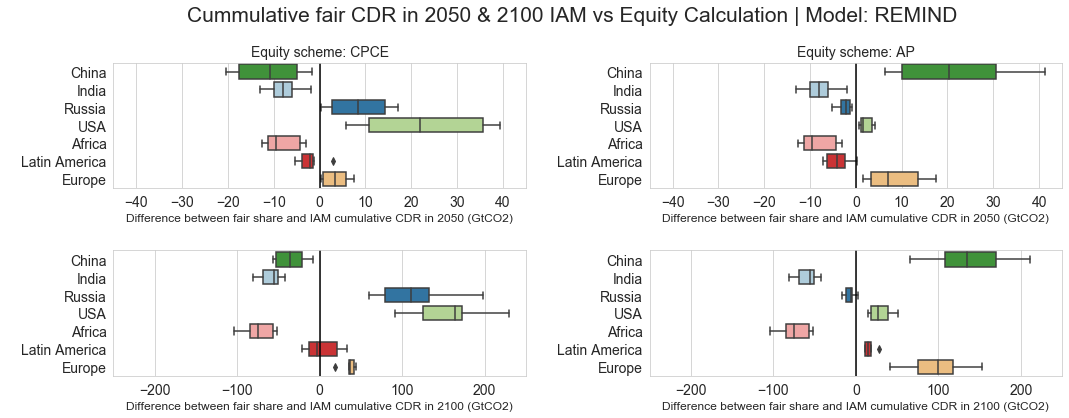

In [51]:
### FIGURE 3 - Plot cumulative fair CDR in 2100  - only REMIND!!

sns.set_style('whitegrid')
years=[2050,2100]
rfilt_wo_world=(equity_equal_remind.Region!='World')
scen_15 =['SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17','SSP5-19-SPA5-V17']
sfilt = (equity_equal_remind.Scenario.isin(scen_15))
scen_filt = (equity_equal_remind.Scenario.isin(scen_allmodels))

p_data=equity_equal_remind[equity_equal_remind.Year.isin(years)&rfilt_wo_world&scen_filt]   
# p_data=equity_remind[equity_remind.Year.isin(years)&rfilt_wo_world&sfilt]  #for only RCP1.9 pathways

p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_CUM_POP'] = p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_CUM_POP']/1000
p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_GDP'] = p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_GDP']/1000

CUM_POP_data=pd.DataFrame(columns=['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq','CUM_CDR_EQ','CUM CDR difference IAM vs EQ','EQ_Method'])

CUM_POP_data[['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq',
             'CUM_CDR_EQ','CUM CDR difference IAM vs EQ']]=p_data[['Year','Scenario','Region',
                                                              'CDR_fair_share_by_CUM_POP',
                                                              'CDR_model_vs_fair_share_by_CUM_POP',
                                                              'CUM_CDR_fair_share_by_CUM_POP',
                                                              'CUM_CDR_model_vs_fair_share_by_CUM_POP']]
CUM_POP_data['EQ_Method']='CUM_POP'

GDP_data=pd.DataFrame(columns=['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq','CUM_CDR_EQ','CUM CDR difference IAM vs EQ','EQ_Method'])

GDP_data[['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq'
         ,'CUM_CDR_EQ','CUM CDR difference IAM vs EQ']]=p_data[['Year','Scenario','Region',
                                                              'CDR_fair_share_by_GDP',
                                                              'CDR_model_vs_fair_share_by_GDP',
                                                              'CUM_CDR_fair_share_by_GDP',
                                                              'CUM_CDR_model_vs_fair_share_by_GDP']]
GDP_data['EQ_Method']='GDP'

pl_data=CUM_POP_data.append(GDP_data)

pl_data['Region'] = pl_data['Region'].str.replace('CHN', 'China')
pl_data['Region'] = pl_data['Region'].str.replace('AFR', 'Africa')
pl_data['Region'] = pl_data['Region'].str.replace('EUR', 'Europe')
pl_data['Region'] = pl_data['Region'].str.replace('IND', 'India')
pl_data['Region'] = pl_data['Region'].str.replace('JPN', 'Japan')
pl_data['Region'] = pl_data['Region'].str.replace('LAM', 'Latin America')
pl_data['Region'] = pl_data['Region'].str.replace('RUS', 'Russia')

pl_data_50 = pl_data.loc[(pl_data.Year == 2050)& (pl_data.EQ_Method == 'CUM_POP')]
pl_data_50_SSP1 = pl_data_50.loc[(pl_data_50.Scenario == 'SSP1-19-SPA1-V17')]
pl_data_50_SSP5 = pl_data_50.loc[(pl_data_50.Scenario == 'SSP5-19-SPA5-V17')]

pl_data_100 = pl_data.loc[(pl_data.Year == 2100)& (pl_data.EQ_Method == 'CUM_POP')]
pl_data_100_SSP1 = pl_data_100.loc[(pl_data_100.Scenario == 'SSP1-19-SPA1-V17')]
pl_data_100_SSP5 = pl_data_100.loc[(pl_data_100.Scenario == 'SSP5-19-SPA5-V17')]

gdp_data_50 = pl_data.loc[(pl_data.Year == 2050)& (pl_data.EQ_Method == 'GDP')]
gdp_data_50_SSP1 = gdp_data_50.loc[(gdp_data_50.Scenario == 'SSP1-19-SPA1-V17')]
gdp_data_50_SSP5 = gdp_data_50.loc[(gdp_data_50.Scenario == 'SSP5-19-SPA5-V17')]

gdp_data_100 = pl_data.loc[(pl_data.Year == 2100)& (pl_data.EQ_Method == 'GDP')]
gdp_data_100_SSP1 = gdp_data_100.loc[(gdp_data_100.Scenario == 'SSP1-19-SPA1-V17')]
gdp_data_100_SSP5 = gdp_data_100.loc[(gdp_data_100.Scenario == 'SSP5-19-SPA5-V17')]

pl_data_50  = pl_data_50.reset_index()
pl_data_100  = pl_data_100.reset_index()
gdp_data_50  = gdp_data_50.reset_index()
gdp_data_100  = gdp_data_100.reset_index()
pl_data_50_SSP1  = pl_data_50_SSP1.reset_index()
pl_data_50_SSP5  = pl_data_50_SSP5.reset_index()
gdp_data_50_SSP1  = gdp_data_50_SSP1.reset_index()
gdp_data_50_SSP5  = gdp_data_50_SSP5.reset_index()
pl_data_100_SSP1  = pl_data_100_SSP1.reset_index()
pl_data_100_SSP5  = pl_data_100_SSP5.reset_index()
gdp_data_100_SSP1  = gdp_data_100_SSP1.reset_index()
gdp_data_100_SSP5  = gdp_data_100_SSP5.reset_index()

fig, axs = plt.subplots(2,2,  figsize=(17,6)) #sharex = True, sharey = True
title = fig.suptitle("Cummulative fair CDR in 2050 & 2100 IAM vs Equity Calculation | Model: REMIND", fontsize = 21)
fig.subplots_adjust(top=0.85, wspace=0.3, hspace = 0.5)


regions_order = ['China', 'India', 'Russia', 'USA', 'Africa', 'Latin America', 'Europe']

colours = sns.color_palette("Paired",12)
col_lam = sns.color_palette("Set2", 6)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],col_lam[5], colours[9]]



# box1.set(ylim =(-50,450))
# box1.set(xticklabels=['IAM results','GDP','Cumulative emissions \nper capita'])

axs_pop_50 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', 
                         order = regions_order, data= pl_data_50,
                         palette = colour_palette, ax = axs[0,0]).set_title('Equity scheme: CPCE', fontsize = 14)
axs_pop_100 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', 
                          order = regions_order, data= pl_data_100, 
                          palette = colour_palette, ax = axs[1,0])#.set_title('Equity scheme: CPCE', fontsize = 14)
axs_gdp_50 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', 
                         order = regions_order, data= gdp_data_50, 
                         palette = colour_palette, ax = axs[0,1]).set_title('Equity scheme: AP', fontsize = 14)
axs_gdp_100 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', 
                          order = regions_order, data= gdp_data_100, 
                          palette = colour_palette, ax = axs[1,1])#.set_title('Equity scheme: AP', fontsize = 14)


axs[0,0].set_xlim([-45, 45])
axs[1,0].set_xlim([-250, 250])
axs[0,1].set_xlim([-45, 45])
axs[1,1].set_xlim([-250, 250])

axs[0,0].axvline(color = 'black')
axs[1,0].axvline(color = 'black')
axs[0,1].axvline(color = 'black')
axs[1,1].axvline(color = 'black')

axs[1,0].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)")
axs[1,1].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)")
axs[0,0].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2050 (GtCO2)")
axs[0,1].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2050 (GtCO2)")
axs[1,0].set(ylabel = " ")
axs[1,1].set(ylabel = " ")
axs[0,0].set(ylabel = " ")
axs[0,1].set(ylabel = " ")


axs[1,0].tick_params(labelsize=14)
axs[1,1].tick_params(labelsize=14)
axs[0,0].tick_params(labelsize=14)
axs[0,1].tick_params(labelsize=14)

# axs_pop_50.legend()
plt.savefig(plot_path + 'N - Figure 4 - REMIND.png')
#plt.savefig(plot_path + 'Figure 4 - REMIND.svg', dpi = 300, edgecolor = "white", transparent = True)

/Users/susannebaur/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


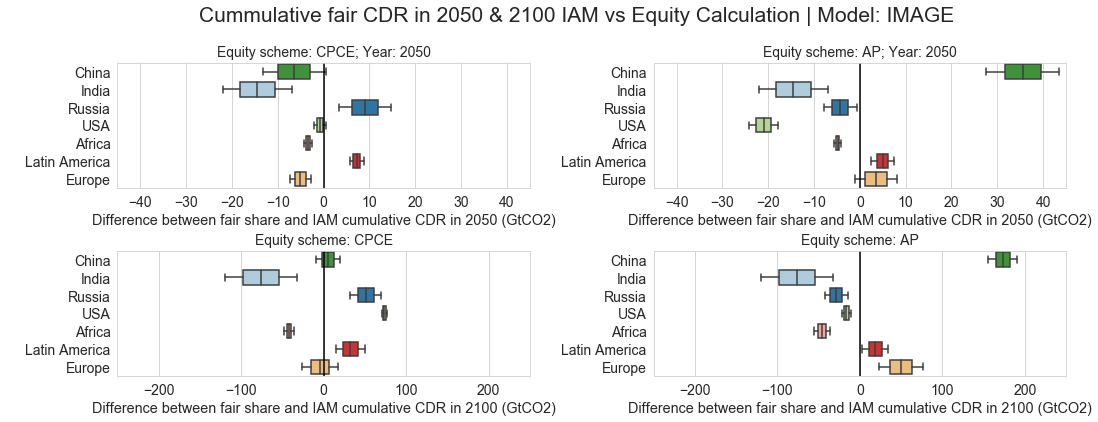

In [75]:
### FIGURE 3 - Plot cumulative fair CDR in 2100  - only IMAGE!!

sns.set_style('whitegrid')
years=[2050,2100]
rfilt_wo_world=(equity_equal_image.Region!='World')
scen_15 =['SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17','SSP5-19-SPA5-V17']
sfilt = (equity_equal_image.Scenario.isin(scen_15))
scen_filt = (equity_equal_image.Scenario.isin(scen_allmodels))

p_data=equity_equal_image[equity_equal_image.Year.isin(years)&rfilt_wo_world&scen_filt]   
# p_data=equity_remind[equity_remind.Year.isin(years)&rfilt_wo_world&sfilt]  #for only RCP1.9 pathways

p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_CUM_POP'] = p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_CUM_POP']/1000
p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_GDP'] = p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_GDP']/1000

CUM_POP_data=pd.DataFrame(columns=['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq','CUM_CDR_EQ','CUM CDR difference IAM vs EQ','EQ_Method'])

CUM_POP_data[['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq',
             'CUM_CDR_EQ','CUM CDR difference IAM vs EQ']]=p_data[['Year','Scenario','Region',
                                                              'CDR_fair_share_by_CUM_POP',
                                                              'CDR_model_vs_fair_share_by_CUM_POP',
                                                              'CUM_CDR_fair_share_by_CUM_POP',
                                                              'CUM_CDR_model_vs_fair_share_by_CUM_POP']]
CUM_POP_data['EQ_Method']='CUM_POP'

GDP_data=pd.DataFrame(columns=['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq','CUM_CDR_EQ','CUM CDR difference IAM vs EQ','EQ_Method'])

GDP_data[['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq'
         ,'CUM_CDR_EQ','CUM CDR difference IAM vs EQ']]=p_data[['Year','Scenario','Region',
                                                              'CDR_fair_share_by_GDP',
                                                              'CDR_model_vs_fair_share_by_GDP',
                                                              'CUM_CDR_fair_share_by_GDP',
                                                              'CUM_CDR_model_vs_fair_share_by_GDP']]
GDP_data['EQ_Method']='GDP'

pl_data=CUM_POP_data.append(GDP_data)

pl_data['Region'] = pl_data['Region'].str.replace('CHN', 'China')
pl_data['Region'] = pl_data['Region'].str.replace('AFR', 'Africa')
pl_data['Region'] = pl_data['Region'].str.replace('EUR', 'Europe')
pl_data['Region'] = pl_data['Region'].str.replace('IND', 'India')
pl_data['Region'] = pl_data['Region'].str.replace('JPN', 'Japan')
pl_data['Region'] = pl_data['Region'].str.replace('LAM', 'Latin America')
pl_data['Region'] = pl_data['Region'].str.replace('MEA', 'Middle East')
pl_data['Region'] = pl_data['Region'].str.replace('OAS', 'Other Asian C.')
pl_data['Region'] = pl_data['Region'].str.replace('ROW', 'Rest of World')
pl_data['Region'] = pl_data['Region'].str.replace('RUS', 'Russia')

pl_data_50 = pl_data.loc[(pl_data.Year == 2050)& (pl_data.EQ_Method == 'CUM_POP')]
pl_data_50_SSP1 = pl_data_50.loc[(pl_data_50.Scenario == 'SSP1-19-SPA0-V17')]
pl_data_50_SSP5 = pl_data_50.loc[(pl_data_50.Scenario == 'SSP2-LF-SPA2-V17')]

pl_data_100 = pl_data.loc[(pl_data.Year == 2100)& (pl_data.EQ_Method == 'CUM_POP')]
pl_data_100_SSP1 = pl_data_100.loc[(pl_data_100.Scenario == 'SSP1-19-SPA0-V17')]
pl_data_100_SSP5 = pl_data_100.loc[(pl_data_100.Scenario == 'SSP2-LF-SPA2-V17')]

gdp_data_50 = pl_data.loc[(pl_data.Year == 2050)& (pl_data.EQ_Method == 'GDP')]
gdp_data_50_SSP1 = gdp_data_50.loc[(gdp_data_50.Scenario == 'SSP1-19-SPA0-V17')]
gdp_data_50_SSP5 = gdp_data_50.loc[(gdp_data_50.Scenario == 'SSP2-LF-SPA2-V17')]

gdp_data_100 = pl_data.loc[(pl_data.Year == 2100)& (pl_data.EQ_Method == 'GDP')]
gdp_data_100_SSP1 = gdp_data_100.loc[(gdp_data_100.Scenario == 'SSP1-19-SPA0-V17')]
gdp_data_100_SSP5 = gdp_data_100.loc[(gdp_data_100.Scenario == 'SSP2-LF-SPA2-V17')]

pl_data_50  = pl_data_50.reset_index()
pl_data_100  = pl_data_100.reset_index()
gdp_data_50  = gdp_data_50.reset_index()
gdp_data_100  = gdp_data_100.reset_index()
pl_data_50_SSP1  = pl_data_50_SSP1.reset_index()
pl_data_50_SSP5  = pl_data_50_SSP5.reset_index()
gdp_data_50_SSP1  = gdp_data_50_SSP1.reset_index()
gdp_data_50_SSP5  = gdp_data_50_SSP5.reset_index()
pl_data_100_SSP1  = pl_data_100_SSP1.reset_index()
pl_data_100_SSP5  = pl_data_100_SSP5.reset_index()
gdp_data_100_SSP1  = gdp_data_100_SSP1.reset_index()
gdp_data_100_SSP5  = gdp_data_100_SSP5.reset_index()

fig, axs = plt.subplots(2,2, figsize=(17,6)) #, sharey = True
title = fig.suptitle("Cummulative fair CDR in 2050 & 2100 IAM vs Equity Calculation | Model: IMAGE", fontsize = 21)
fig.subplots_adjust(top=0.85, wspace=0.3, hspace = 0.5)

regions_order = ['China', 'India', 'Russia', 'USA', 'Africa', 'Latin America', 'Europe']
colours = sns.color_palette("Paired",12)
colour_palette = [colours[3],colours[0],colours[1],colours[2],colours[4],colours[5], colours[6]]

# box1.set(ylim =(-50,450))
# box1.set(xticklabels=['IAM results','GDP','Cumulative emissions \nper capita'])

axs_pop_50 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', 
                         order = regions_order, data= pl_data_50,
                         palette = colour_palette, ax = axs[0,0]).set_title('Equity scheme: CPCE; Year: 2050', fontsize = 14)
axs_pop_100 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', 
                          order = regions_order, data= pl_data_100, 
                          palette = colour_palette, ax = axs[1,0]).set_title('Equity scheme: CPCE; Year: 2100', fontsize = 14)
axs_gdp_50 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', 
                         order = regions_order, data= gdp_data_50, 
                         palette = colour_palette, ax = axs[0,1]).set_title('Equity scheme: AP; Year: 2050', fontsize = 14)
axs_gdp_100 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', 
                          order = regions_order, data= gdp_data_100, 
                          palette = colour_palette, ax = axs[1,1]).set_title('Equity scheme: AP; Year: 2100', fontsize = 14)


axs[0,0].set_xlim([-45, 45])
axs[1,0].set_xlim([-250, 250])
axs[0,1].set_xlim([-45, 45])
axs[1,1].set_xlim([-250, 250])

axs[0,0].axvline(color = 'black')
axs[1,0].axvline(color = 'black')
axs[0,1].axvline(color = 'black')
axs[1,1].axvline(color = 'black')

axs[1,0].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)")
axs[1,1].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)")
axs[0,0].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2050 (GtCO2)")
axs[0,1].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2050 (GtCO2)")
axs[1,0].set(ylabel = " ")
axs[1,1].set(ylabel = " ")
axs[0,0].set(ylabel = " ")
axs[0,1].set(ylabel = " ")


axs[1,0].tick_params(labelsize=14)
axs[1,1].tick_params(labelsize=14)
axs[0,0].tick_params(labelsize=14)
axs[0,1].tick_params(labelsize=14)


# axs_pop_50.legend()
plt.savefig(plot_path + 'N - Figure 4 - IMAGE.png')
#plt.savefig(plot_path + 'Figure 4 - REMIND.svg', dpi = 300, edgecolor = "white", transparent = True)

In [33]:
print(equity_image.Region.unique())

['BRA' 'CAN' 'CEU' 'CHN' 'EAF' 'INDIA' 'INDO' 'JAP' 'KOR' 'ME' 'MEX' 'NAF'
 'OCE' 'RCAM' 'RSAF' 'RSAM' 'RSAS' 'RUS' 'SAF' 'SEAS' 'STAN' 'TUR' 'UKR'
 'USA' 'WAF' 'WEU' 'World']


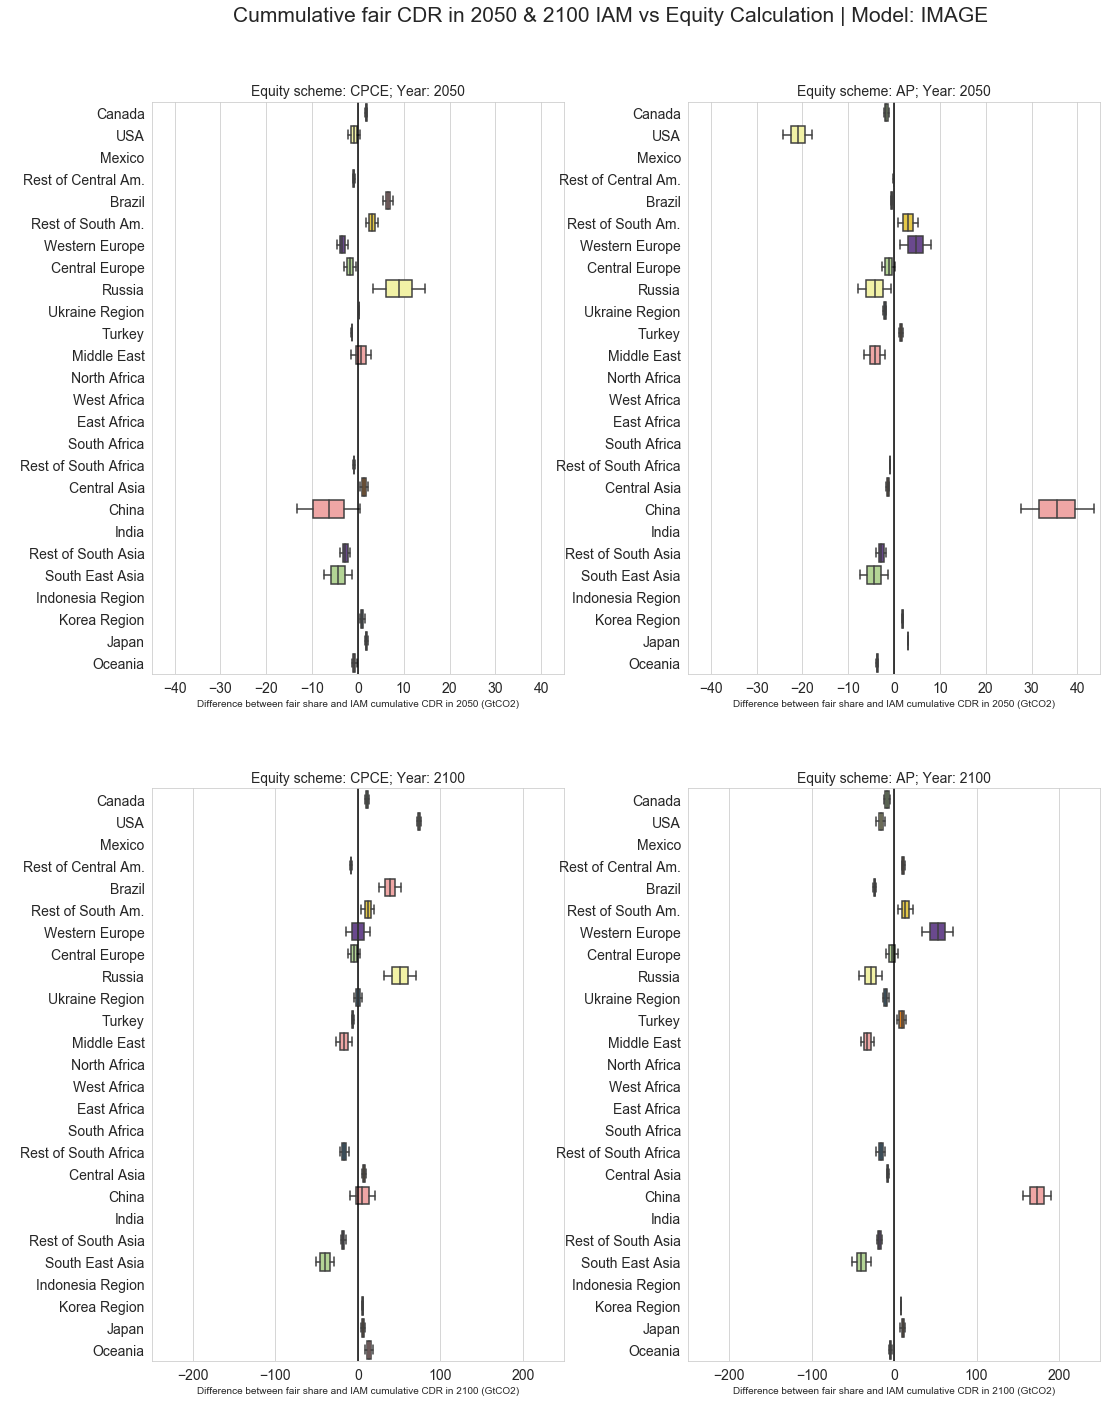

In [39]:
### FIGURE 3 - Plot cumulative fair CDR in 2100  - only IMAGE - image regions!!

sns.set_style('whitegrid')
years=[2050,2100]
rfilt_wo_world=(equity_image.Region!='World')
scen_15 =['SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17','SSP5-19-SPA5-V17']
sfilt = (equity_image.Scenario.isin(scen_15))
scen_filt = (equity_image.Scenario.isin(scen_allmodels))

p_data=equity_image[equity_image.Year.isin(years)&rfilt_wo_world&scen_filt]   
# p_data=equity_remind[equity_remind.Year.isin(years)&rfilt_wo_world&sfilt]  #for only RCP1.9 pathways

p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_CUM_POP'] = p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_CUM_POP']/1000
p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_GDP'] = p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_GDP']/1000

CUM_POP_data=pd.DataFrame(columns=['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq','CUM_CDR_EQ','CUM CDR difference IAM vs EQ','EQ_Method'])

CUM_POP_data[['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq',
             'CUM_CDR_EQ','CUM CDR difference IAM vs EQ']]=p_data[['Year','Scenario','Region',
                                                              'CDR_fair_share_by_CUM_POP',
                                                              'CDR_model_vs_fair_share_by_CUM_POP',
                                                              'CUM_CDR_fair_share_by_CUM_POP',
                                                              'CUM_CDR_model_vs_fair_share_by_CUM_POP']]
CUM_POP_data['EQ_Method']='CUM_POP'

GDP_data=pd.DataFrame(columns=['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq','CUM_CDR_EQ','CUM CDR difference IAM vs EQ','EQ_Method'])

GDP_data[['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq'
         ,'CUM_CDR_EQ','CUM CDR difference IAM vs EQ']]=p_data[['Year','Scenario','Region',
                                                              'CDR_fair_share_by_GDP',
                                                              'CDR_model_vs_fair_share_by_GDP',
                                                              'CUM_CDR_fair_share_by_GDP',
                                                              'CUM_CDR_model_vs_fair_share_by_GDP']]
GDP_data['EQ_Method']='GDP'

pl_data=CUM_POP_data.append(GDP_data)

pl_data['Region'] = pl_data['Region'].str.replace('CHN', 'China')
pl_data['Region'] = pl_data['Region'].str.replace('AFR', 'Africa')
pl_data['Region'] = pl_data['Region'].str.replace('EUR', 'Europe')
pl_data['Region'] = pl_data['Region'].str.replace('IND', 'India')
pl_data['Region'] = pl_data['Region'].str.replace('JPN', 'Japan')
pl_data['Region'] = pl_data['Region'].str.replace('LAM', 'Latin America')
pl_data['Region'] = pl_data['Region'].str.replace('MEA', 'Middle East')
pl_data['Region'] = pl_data['Region'].str.replace('OAS', 'Other Asian C.')
pl_data['Region'] = pl_data['Region'].str.replace('ROW', 'Rest of World')
pl_data['Region'] = pl_data['Region'].str.replace('RUS', 'Russia')

pl_data['Region'] = pl_data['Region'].str.replace('BRA', 'Brazil')
pl_data['Region'] = pl_data['Region'].str.replace('CAN', 'Canada')
pl_data['Region'] = pl_data['Region'].str.replace('CEU', 'Central Europe')
pl_data['Region'] = pl_data['Region'].str.replace('EAF', 'Eastern Africa')
pl_data['Region'] = pl_data['Region'].str.replace('INDO', 'Indonesia Region')
pl_data['Region'] = pl_data['Region'].str.replace('JAP', 'Japan')
pl_data['Region'] = pl_data['Region'].str.replace('KOR', 'Korea Region')
pl_data['Region'] = pl_data['Region'].str.replace('ME', 'Middle East')
pl_data['Region'] = pl_data['Region'].str.replace('MEX', 'Mexico')
pl_data['Region'] = pl_data['Region'].str.replace('NAF', 'Northern Africa')
pl_data['Region'] = pl_data['Region'].str.replace('OCE', 'Oceania')
pl_data['Region'] = pl_data['Region'].str.replace('RCAM', 'Rest of Central Am.')
pl_data['Region'] = pl_data['Region'].str.replace('RSAF', 'Rest of South Africa')
pl_data['Region'] = pl_data['Region'].str.replace('RSAM', 'Rest of South Am.')
pl_data['Region'] = pl_data['Region'].str.replace('RSAS', 'Rest of South Asia')
pl_data['Region'] = pl_data['Region'].str.replace('SAF', 'Southern Africa')
pl_data['Region'] = pl_data['Region'].str.replace('SEAS', 'South East Asia')
pl_data['Region'] = pl_data['Region'].str.replace('STAN', 'Central Asia')
pl_data['Region'] = pl_data['Region'].str.replace('TUR', 'Turkey')
pl_data['Region'] = pl_data['Region'].str.replace('UKR', 'Ukraine Region')
pl_data['Region'] = pl_data['Region'].str.replace('WAF', 'Western Africa')
pl_data['Region'] = pl_data['Region'].str.replace('WEU', 'Western Europe')



pl_data_50 = pl_data.loc[(pl_data.Year == 2050)& (pl_data.EQ_Method == 'CUM_POP')]
pl_data_50_SSP1 = pl_data_50.loc[(pl_data_50.Scenario == 'SSP1-19-SPA0-V17')]
pl_data_50_SSP5 = pl_data_50.loc[(pl_data_50.Scenario == 'SSP2-LF-SPA2-V17')]

pl_data_100 = pl_data.loc[(pl_data.Year == 2100)& (pl_data.EQ_Method == 'CUM_POP')]
pl_data_100_SSP1 = pl_data_100.loc[(pl_data_100.Scenario == 'SSP1-19-SPA0-V17')]
pl_data_100_SSP5 = pl_data_100.loc[(pl_data_100.Scenario == 'SSP2-LF-SPA2-V17')]

gdp_data_50 = pl_data.loc[(pl_data.Year == 2050)& (pl_data.EQ_Method == 'GDP')]
gdp_data_50_SSP1 = gdp_data_50.loc[(gdp_data_50.Scenario == 'SSP1-19-SPA0-V17')]
gdp_data_50_SSP5 = gdp_data_50.loc[(gdp_data_50.Scenario == 'SSP2-LF-SPA2-V17')]

gdp_data_100 = pl_data.loc[(pl_data.Year == 2100)& (pl_data.EQ_Method == 'GDP')]
gdp_data_100_SSP1 = gdp_data_100.loc[(gdp_data_100.Scenario == 'SSP1-19-SPA0-V17')]
gdp_data_100_SSP5 = gdp_data_100.loc[(gdp_data_100.Scenario == 'SSP2-LF-SPA2-V17')]

pl_data_50  = pl_data_50.reset_index()
pl_data_100  = pl_data_100.reset_index()
gdp_data_50  = gdp_data_50.reset_index()
gdp_data_100  = gdp_data_100.reset_index()
pl_data_50_SSP1  = pl_data_50_SSP1.reset_index()
pl_data_50_SSP5  = pl_data_50_SSP5.reset_index()
gdp_data_50_SSP1  = gdp_data_50_SSP1.reset_index()
gdp_data_50_SSP5  = gdp_data_50_SSP5.reset_index()
pl_data_100_SSP1  = pl_data_100_SSP1.reset_index()
pl_data_100_SSP5  = pl_data_100_SSP5.reset_index()
gdp_data_100_SSP1  = gdp_data_100_SSP1.reset_index()
gdp_data_100_SSP5  = gdp_data_100_SSP5.reset_index()

region_order = ['Canada', 'USA', 'Mexico', 'Rest of Central Am.', 'Brazil', 'Rest of South Am.', 'Western Europe',
               'Central Europe', 'Russia', 'Ukraine Region', 'Turkey', 'Middle East', 'North Africa', 'West Africa',
               'East Africa', 'South Africa', 'Rest of South Africa', 'Central Asia', 'China', 'India', 'Rest of South Asia', 
               'South East Asia', 'Indonesia Region', 'Korea Region', 'Japan', 'Oceania']

fig, axs = plt.subplots(2,2, figsize=(17,22)) #, sharey = True
title = fig.suptitle("Cummulative fair CDR in 2050 & 2100 IAM vs Equity Calculation | Model: IMAGE", fontsize = 21)
fig.subplots_adjust(top=0.92, wspace=0.3, hspace = 0.2)

colours = sns.color_palette("Paired",12)
col_lam = sns.color_palette("Set2", 6)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],col_lam[5], colours[9]]




# box1.set(ylim =(-50,450))
# box1.set(xticklabels=['IAM results','GDP','Cumulative emissions \nper capita'])


# with sns.color_palette("Paired"):
axs_pop_50 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', order = region_order, data= pl_data_50, 
                         palette = colour_palette, ax = axs[0,0]).set_title('Equity scheme: CPCE; Year: 2050', fontsize = 14)
axs_pop_100 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', data= pl_data_100, order = region_order,
                          palette = colour_palette, ax = axs[1,0]).set_title('Equity scheme: CPCE; Year: 2100', fontsize = 14)
axs_gdp_50 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', order = region_order, data= gdp_data_50, 
                         palette = colour_palette, ax = axs[0,1]).set_title('Equity scheme: AP; Year: 2050', fontsize = 14)
axs_gdp_100 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', order = region_order, data= gdp_data_100, 
                          palette = colour_palette, ax = axs[1,1]).set_title('Equity scheme: AP; Year: 2100', fontsize = 14)

axs[0,0].set_xlim([-45, 45])
axs[1,0].set_xlim([-250, 250])
axs[0,1].set_xlim([-45, 45])
axs[1,1].set_xlim([-250, 250])

axs[0,0].axvline(color = 'black')
axs[1,0].axvline(color = 'black')
axs[0,1].axvline(color = 'black')
axs[1,1].axvline(color = 'black')

axs[1,0].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)")
axs[1,1].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)")
axs[0,0].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2050 (GtCO2)")
axs[0,1].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2050 (GtCO2)")
axs[1,0].set(ylabel = " ")
axs[1,1].set(ylabel = " ")
axs[0,0].set(ylabel = " ")
axs[0,1].set(ylabel = " ")


axs[1,0].tick_params(labelsize=14)
axs[1,1].tick_params(labelsize=14)
axs[0,0].tick_params(labelsize=14)
axs[0,1].tick_params(labelsize=14)
# axs_pop_50.legend()
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Figure 4 - IMAGE Regions.png')
#plt.savefig(plot_path + 'Figure 4 - REMIND.svg', dpi = 300, edgecolor = "white", transparent = True)

In [34]:
equity_message.Scenario.unique()

array(['SSP1-19', 'SSP1-26', 'SSP2-19', 'SSP2-26', 'LowEnergyDemand'],
      dtype=object)

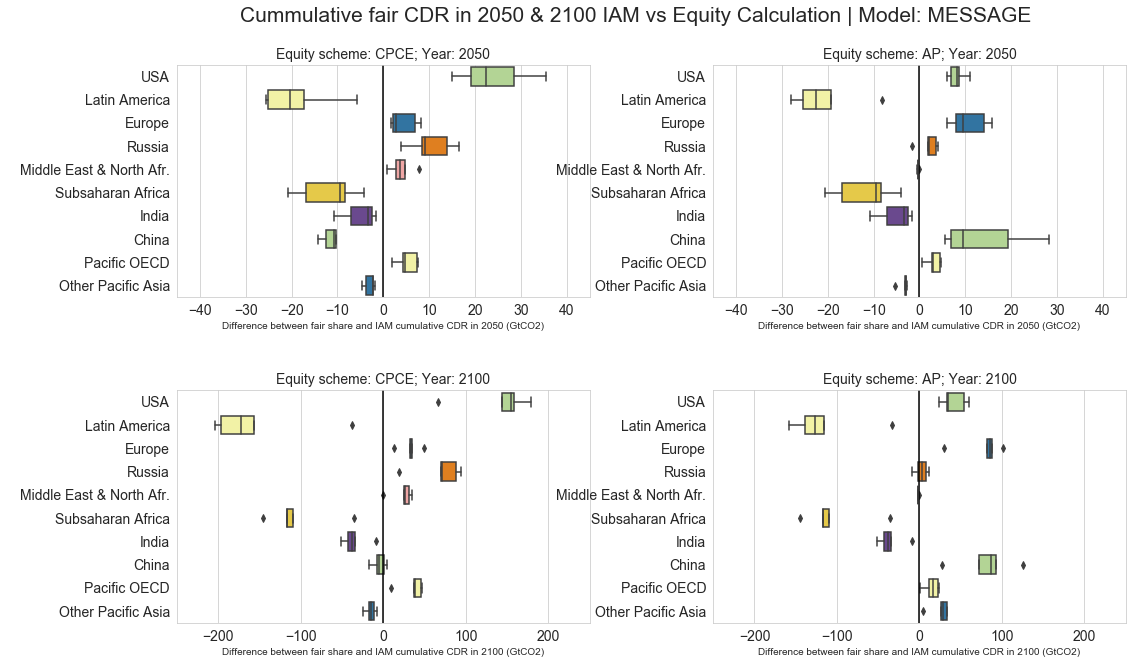

In [40]:
### FIGURE 3 - Plot cumulative fair CDR in 2100  - MESSAGE!!

sns.set_style('whitegrid')
years=[2050,2100]
rfilt_wo_world=(equity_message.Region!='World')
scen_15 =['SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17','SSP5-19-SPA5-V17']
sfilt = (equity_message.Scenario.isin(scen_15))
scen_filt = (equity_message.Scenario.isin(scen_allmodels))

p_data=equity_message[equity_message.Year.isin(years)&rfilt_wo_world&scen_filt]   
# p_data=equity_remind[equity_remind.Year.isin(years)&rfilt_wo_world&sfilt]  #for only RCP1.9 pathways

p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_CUM_POP'] = p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_CUM_POP']/1000
p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_GDP'] = p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_GDP']/1000

CUM_POP_data=pd.DataFrame(columns=['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq','CUM_CDR_EQ','CUM CDR difference IAM vs EQ','EQ_Method'])

CUM_POP_data[['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq',
             'CUM_CDR_EQ','CUM CDR difference IAM vs EQ']]=p_data[['Year','Scenario','Region',
                                                              'CDR_fair_share_by_CUM_POP',
                                                              'CDR_model_vs_fair_share_by_CUM_POP',
                                                              'CUM_CDR_fair_share_by_CUM_POP',
                                                              'CUM_CDR_model_vs_fair_share_by_CUM_POP']]
CUM_POP_data['EQ_Method']='CUM_POP'

GDP_data=pd.DataFrame(columns=['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq','CUM_CDR_EQ','CUM CDR difference IAM vs EQ','EQ_Method'])

GDP_data[['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq'
         ,'CUM_CDR_EQ','CUM CDR difference IAM vs EQ']]=p_data[['Year','Scenario','Region',
                                                              'CDR_fair_share_by_GDP',
                                                              'CDR_model_vs_fair_share_by_GDP',
                                                              'CUM_CDR_fair_share_by_GDP',
                                                              'CUM_CDR_model_vs_fair_share_by_GDP']]
GDP_data['EQ_Method']='GDP'

pl_data=CUM_POP_data.append(GDP_data)

#'CHN', 'EU', 'IND', 'R11_AFR', 'R11_FSU', 'R11_LAM', 'R11_MEA',
#       'R11_PAO', 'R11_PAS', 'USA', 'World'

pl_data['Region'] = pl_data['Region'].str.replace('CHN', 'China')
pl_data['Region'] = pl_data['Region'].str.replace('R11_AFR', 'Subsaharan Africa')
pl_data['Region'] = pl_data['Region'].str.replace('EU', 'Europe')
pl_data['Region'] = pl_data['Region'].str.replace('IND', 'India')
pl_data['Region'] = pl_data['Region'].str.replace('JPN', 'Japan')
pl_data['Region'] = pl_data['Region'].str.replace('R11_LAM', 'Latin America')
pl_data['Region'] = pl_data['Region'].str.replace('R11_MEA', 'Middle East & North Afr.')
pl_data['Region'] = pl_data['Region'].str.replace('OAS', 'Other Asian C.')
pl_data['Region'] = pl_data['Region'].str.replace('ROW', 'Rest of World')
pl_data['Region'] = pl_data['Region'].str.replace('R11_FSU', 'Russia')
pl_data['Region'] = pl_data['Region'].str.replace('R11_PAO', 'Pacific OECD')
pl_data['Region'] = pl_data['Region'].str.replace('R11_PAS', 'Other Pacific Asia')



pl_data_50 = pl_data.loc[(pl_data.Year == 2050)& (pl_data.EQ_Method == 'CUM_POP')]
pl_data_50_SSP1 = pl_data_50.loc[(pl_data_50.Scenario == 'SSP1-19')]
pl_data_50_SSP5 = pl_data_50.loc[(pl_data_50.Scenario == 'LowEnergyDemand')]

pl_data_100 = pl_data.loc[(pl_data.Year == 2100)& (pl_data.EQ_Method == 'CUM_POP')]
pl_data_100_SSP1 = pl_data_100.loc[(pl_data_100.Scenario == 'SSP1-19')]
pl_data_100_SSP5 = pl_data_100.loc[(pl_data_100.Scenario == 'LowEnergyDemand')]

gdp_data_50 = pl_data.loc[(pl_data.Year == 2050)& (pl_data.EQ_Method == 'GDP')]
gdp_data_50_SSP1 = gdp_data_50.loc[(gdp_data_50.Scenario == 'SSP1-19')]
gdp_data_50_SSP5 = gdp_data_50.loc[(gdp_data_50.Scenario == 'LowEnergyDemand')]

gdp_data_100 = pl_data.loc[(pl_data.Year == 2100)& (pl_data.EQ_Method == 'GDP')]
gdp_data_100_SSP1 = gdp_data_100.loc[(gdp_data_100.Scenario == 'SSP1-19')]
gdp_data_100_SSP5 = gdp_data_100.loc[(gdp_data_100.Scenario == 'LowEnergyDemand')]

pl_data_50  = pl_data_50.reset_index()
pl_data_100  = pl_data_100.reset_index()
gdp_data_50  = gdp_data_50.reset_index()
gdp_data_100  = gdp_data_100.reset_index()
pl_data_50_SSP1  = pl_data_50_SSP1.reset_index()
pl_data_50_SSP5  = pl_data_50_SSP5.reset_index()
gdp_data_50_SSP1  = gdp_data_50_SSP1.reset_index()
gdp_data_50_SSP5  = gdp_data_50_SSP5.reset_index()
pl_data_100_SSP1  = pl_data_100_SSP1.reset_index()
pl_data_100_SSP5  = pl_data_100_SSP5.reset_index()
gdp_data_100_SSP1  = gdp_data_100_SSP1.reset_index()
gdp_data_100_SSP5  = gdp_data_100_SSP5.reset_index()

fig, axs = plt.subplots(2,2, figsize=(17,10)) #, sharey = True
title = fig.suptitle("Cummulative fair CDR in 2050 & 2100 IAM vs Equity Calculation | Model: MESSAGE", fontsize = 21)
fig.subplots_adjust(top=0.9, wspace=0.3, hspace = 0.4)


colours = sns.color_palette("Paired",12)
col_lam = sns.color_palette("Set2", 6)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],col_lam[5], colours[9]]



# box1.set(ylim =(-50,450))
# box1.set(xticklabels=['IAM results','GDP','Cumulative emissions \nper capita'])
region_order = ['USA', 'Latin America', 'Europe', 'Russia', 'Middle East & North Afr.', 'Subsaharan Africa',
                'India', 'China', 'Pacific OECD', 'Other Pacific Asia']

# with sns.color_palette("Paired"):
axs_pop_50 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', 
                          data= pl_data_50, order = region_order,
                         palette = colour_palette, ax = axs[0,0]).set_title('Equity scheme: CPCE; Year: 2050', fontsize = 14)
axs_pop_100 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', 
                           data= pl_data_100, order = region_order,
                          palette = colour_palette, ax = axs[1,0]).set_title('Equity scheme: CPCE; Year: 2100', fontsize = 14)
axs_gdp_50 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', 
                         data= gdp_data_50, order = region_order,
                         palette = colour_palette, ax = axs[0,1]).set_title('Equity scheme: AP; Year: 2050', fontsize = 14)
axs_gdp_100 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', 
                           data= gdp_data_100, order = region_order,
                          palette = colour_palette, ax = axs[1,1]).set_title('Equity scheme: AP; Year: 2100', fontsize = 14)


axs[0,0].set_xlim([-45, 45])
axs[1,0].set_xlim([-250, 250])
axs[0,1].set_xlim([-45, 45])
axs[1,1].set_xlim([-250, 250])

axs[0,0].axvline(color = 'black')
axs[1,0].axvline(color = 'black')
axs[0,1].axvline(color = 'black')
axs[1,1].axvline(color = 'black')

axs[1,0].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)")
axs[1,1].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)")
axs[0,0].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2050 (GtCO2)")
axs[0,1].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2050 (GtCO2)")
axs[1,0].set(ylabel = " ")
axs[1,1].set(ylabel = " ")
axs[0,0].set(ylabel = " ")
axs[0,1].set(ylabel = " ")


axs[1,0].tick_params(labelsize=14)
axs[1,1].tick_params(labelsize=14)
axs[0,0].tick_params(labelsize=14)
axs[0,1].tick_params(labelsize=14)

plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Figure 4 - MESSAGE Regions.png')
#plt.savefig(plot_path + 'Figure 4 - REMIND.svg', dpi = 300, edgecolor = "white", transparent = True)

/Users/susannebaur/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


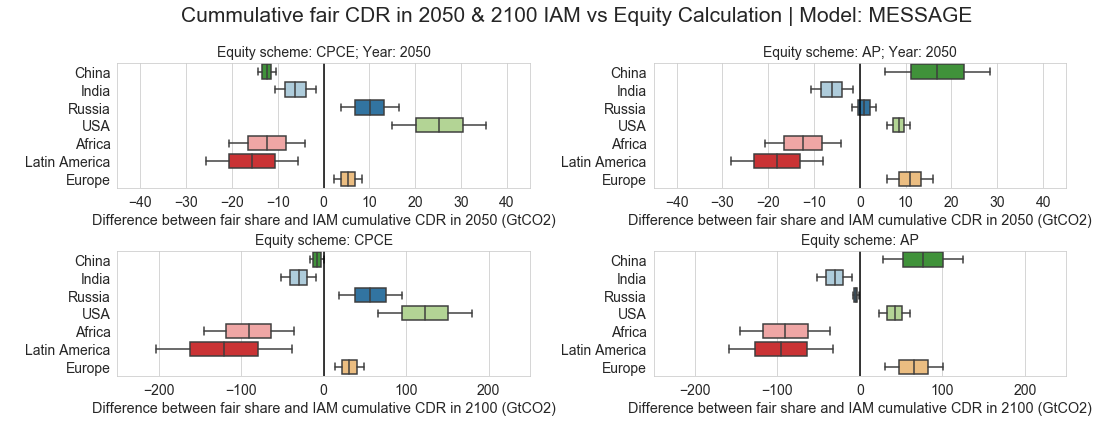

In [71]:
### FIGURE 3 - Plot cumulative fair CDR in 2100  - only IMAGE!!

sns.set_style('whitegrid')
years=[2050,2100]
rfilt_wo_world=(equity_equal_message.Region!='World')
scen_15 =['SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17','SSP5-19-SPA5-V17']
sfilt = (equity_equal_message.Scenario.isin(scen_15))
scen_filt = (equity_equal_message.Scenario.isin(scen_allmodels))

p_data=equity_equal_message[equity_equal_message.Year.isin(years)&rfilt_wo_world&scen_filt]   
# p_data=equity_remind[equity_remind.Year.isin(years)&rfilt_wo_world&sfilt]  #for only RCP1.9 pathways

p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_CUM_POP'] = p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_CUM_POP']/1000
p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_GDP'] = p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_GDP']/1000

CUM_POP_data=pd.DataFrame(columns=['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq','CUM_CDR_EQ','CUM CDR difference IAM vs EQ','EQ_Method'])

CUM_POP_data[['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq',
             'CUM_CDR_EQ','CUM CDR difference IAM vs EQ']]=p_data[['Year','Scenario','Region',
                                                              'CDR_fair_share_by_CUM_POP',
                                                              'CDR_model_vs_fair_share_by_CUM_POP',
                                                              'CUM_CDR_fair_share_by_CUM_POP',
                                                              'CUM_CDR_model_vs_fair_share_by_CUM_POP']]
CUM_POP_data['EQ_Method']='CUM_POP'

GDP_data=pd.DataFrame(columns=['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq','CUM_CDR_EQ','CUM CDR difference IAM vs EQ','EQ_Method'])

GDP_data[['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq'
         ,'CUM_CDR_EQ','CUM CDR difference IAM vs EQ']]=p_data[['Year','Scenario','Region',
                                                              'CDR_fair_share_by_GDP',
                                                              'CDR_model_vs_fair_share_by_GDP',
                                                              'CUM_CDR_fair_share_by_GDP',
                                                              'CUM_CDR_model_vs_fair_share_by_GDP']]
GDP_data['EQ_Method']='GDP'

pl_data=CUM_POP_data.append(GDP_data)

pl_data['Region'] = pl_data['Region'].str.replace('CHN', 'China')
pl_data['Region'] = pl_data['Region'].str.replace('AFR', 'Africa')
pl_data['Region'] = pl_data['Region'].str.replace('EUR', 'Europe')
pl_data['Region'] = pl_data['Region'].str.replace('IND', 'India')
pl_data['Region'] = pl_data['Region'].str.replace('JPN', 'Japan')
pl_data['Region'] = pl_data['Region'].str.replace('LAM', 'Latin America')
pl_data['Region'] = pl_data['Region'].str.replace('MEA', 'Middle East')
pl_data['Region'] = pl_data['Region'].str.replace('OAS', 'Other Asian C.')
pl_data['Region'] = pl_data['Region'].str.replace('ROW', 'Rest of World')
pl_data['Region'] = pl_data['Region'].str.replace('RUS', 'Russia')

pl_data_50 = pl_data.loc[(pl_data.Year == 2050)& (pl_data.EQ_Method == 'CUM_POP')]
pl_data_50_SSP1 = pl_data_50.loc[(pl_data_50.Scenario == 'SSP1-19')]
pl_data_50_SSP5 = pl_data_50.loc[(pl_data_50.Scenario == 'LowEnergyDemand')]

pl_data_100 = pl_data.loc[(pl_data.Year == 2100)& (pl_data.EQ_Method == 'CUM_POP')]
pl_data_100_SSP1 = pl_data_100.loc[(pl_data_100.Scenario == 'SSP1-19')]
pl_data_100_SSP5 = pl_data_100.loc[(pl_data_100.Scenario == 'LowEnergyDemand')]

gdp_data_50 = pl_data.loc[(pl_data.Year == 2050)& (pl_data.EQ_Method == 'GDP')]
gdp_data_50_SSP1 = gdp_data_50.loc[(gdp_data_50.Scenario == 'SSP1-19')]
gdp_data_50_SSP5 = gdp_data_50.loc[(gdp_data_50.Scenario == 'LowEnergyDemand')]

gdp_data_100 = pl_data.loc[(pl_data.Year == 2100)& (pl_data.EQ_Method == 'GDP')]
gdp_data_100_SSP1 = gdp_data_100.loc[(gdp_data_100.Scenario == 'SSP1-19')]
gdp_data_100_SSP5 = gdp_data_100.loc[(gdp_data_100.Scenario == 'LowEnergyDemand')]

pl_data_50  = pl_data_50.reset_index()
pl_data_100  = pl_data_100.reset_index()
gdp_data_50  = gdp_data_50.reset_index()
gdp_data_100  = gdp_data_100.reset_index()
pl_data_50_SSP1  = pl_data_50_SSP1.reset_index()
pl_data_50_SSP5  = pl_data_50_SSP5.reset_index()
gdp_data_50_SSP1  = gdp_data_50_SSP1.reset_index()
gdp_data_50_SSP5  = gdp_data_50_SSP5.reset_index()
pl_data_100_SSP1  = pl_data_100_SSP1.reset_index()
pl_data_100_SSP5  = pl_data_100_SSP5.reset_index()
gdp_data_100_SSP1  = gdp_data_100_SSP1.reset_index()
gdp_data_100_SSP5  = gdp_data_100_SSP5.reset_index()

fig, axs = plt.subplots(2,2, figsize=(17,6)) #, sharey = True
title = fig.suptitle("Cummulative fair CDR in 2050 & 2100 IAM vs Equity Calculation | Model: MESSAGE", fontsize = 21)
fig.subplots_adjust(top=0.85, wspace=0.3, hspace = 0.5)


regions_order = ['China', 'India', 'Russia', 'USA', 'Africa', 'Latin America', 'Europe']
colours = sns.color_palette("Paired",12)
colour_palette = [colours[3],colours[0],colours[1],colours[2],colours[4],colours[5], colours[6]]

# box1.set(ylim =(-50,450))
# box1.set(xticklabels=['IAM results','GDP','Cumulative emissions \nper capita'])


axs_pop_50 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', 
                         order = regions_order, data= pl_data_50,
                         palette = colour_palette, ax = axs[0,0]).set_title('Equity scheme: CPCE; Year: 2050', fontsize = 14)
axs_pop_100 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', 
                          order = regions_order, data= pl_data_100, 
                          palette = colour_palette, ax = axs[1,0]).set_title('Equity scheme: CPCE', fontsize = 14)
axs_gdp_50 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', 
                         order = regions_order, data= gdp_data_50, 
                         palette = colour_palette, ax = axs[0,1]).set_title('Equity scheme: AP; Year: 2050', fontsize = 14)
axs_gdp_100 = sns.boxplot(x = 'CUM CDR difference IAM vs EQ', y= 'Region', 
                          order = regions_order, data= gdp_data_100, 
                          palette = colour_palette, ax = axs[1,1]).set_title('Equity scheme: AP', fontsize = 14)


axs[0,0].set_xlim([-45, 45])
axs[1,0].set_xlim([-250, 250])
axs[0,1].set_xlim([-45, 45])
axs[1,1].set_xlim([-250, 250])

axs[0,0].axvline(color = 'black')
axs[1,0].axvline(color = 'black')
axs[0,1].axvline(color = 'black')
axs[1,1].axvline(color = 'black')

axs[1,0].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)")
axs[1,1].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)")
axs[0,0].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2050 (GtCO2)")
axs[0,1].set(xlabel = "Difference between fair share and IAM cumulative CDR in 2050 (GtCO2)")
axs[1,0].set(ylabel = " ")
axs[1,1].set(ylabel = " ")
axs[0,0].set(ylabel = " ")
axs[0,1].set(ylabel = " ")


axs[1,0].tick_params(labelsize=14)
axs[1,1].tick_params(labelsize=14)
axs[0,0].tick_params(labelsize=14)
axs[0,1].tick_params(labelsize=14)


#axs_pop_100.set(xlabel = "Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)")
#axs_gdp_100.set(xlabel = "Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)")
# axs_pop_50.legend()
plt.savefig(plot_path + 'N - Figure 4 - MESSAGE_2.png')
#plt.savefig(plot_path + 'Figure 4 - REMIND.svg', dpi = 300, edgecolor = "white", transparent = True)

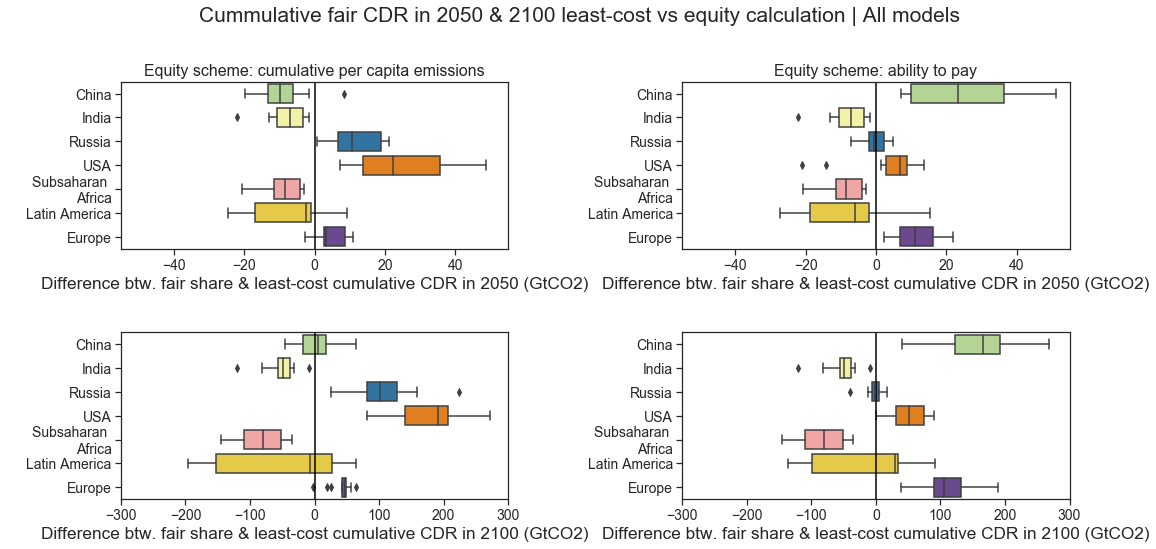

In [108]:
### FIGURE 3 - Plot cumulative fair CDR in 2100  - all models!!

#sns.set_style('whitegrid')
years=[2050,2100]
rfilt_wo_world=(allmodels_df.Region!='World')
scen_15 =['SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17', 'SSP5-19-SPA5-V17', 'SSP1-19-SPA0-V17', 'LowEnergyDemand', 'SSP1-19', 'SSP2-19']
sfilt = (allmodels_df.Scenario.isin(scen_15))
scen_filt = (allmodels_df.Scenario.isin(scen_allmodels))

p_data=allmodels_df[allmodels_df.Year.isin(years)&rfilt_wo_world&scen_filt]   
# p_data=equity_remind[equity_remind.Year.isin(years)&rfilt_wo_world&sfilt]  #for only RCP1.9 pathways

p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_CUM_POP'] = p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_CUM_POP']/1000
p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_GDP'] = p_data.loc[:,'CUM_CDR_model_vs_fair_share_by_GDP']/1000

CUM_POP_data=pd.DataFrame(columns=['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq','CUM_CDR_EQ','CUM CDR difference IAM vs EQ','EQ_Method'])

CUM_POP_data[['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq',
             'CUM_CDR_EQ','Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)']]=p_data[['Year','Scenario','Region',
                                                              'CDR_fair_share_by_CUM_POP',
                                                              'CDR_model_vs_fair_share_by_CUM_POP',
                                                              'CUM_CDR_fair_share_by_CUM_POP',
                                                              'CUM_CDR_model_vs_fair_share_by_CUM_POP']]
CUM_POP_data['EQ_Method']='CUM_POP'

GDP_data=pd.DataFrame(columns=['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq','CUM_CDR_EQ','CUM CDR difference IAM vs EQ','EQ_Method'])

GDP_data[['Year','Scenario','Region','CDR_EQ','CDR_DIFF_IAM_vs_Eq'
         ,'CUM_CDR_EQ','Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)']]=p_data[['Year','Scenario','Region',
                                                              'CDR_fair_share_by_GDP',
                                                              'CDR_model_vs_fair_share_by_GDP',
                                                              'CUM_CDR_fair_share_by_GDP',
                                                              'CUM_CDR_model_vs_fair_share_by_GDP']]
GDP_data['EQ_Method']='GDP'

pl_data=CUM_POP_data.append(GDP_data)

pl_data['Region'] = pl_data['Region'].str.replace('CHN', 'China')
pl_data['Region'] = pl_data['Region'].str.replace('AFR', 'Subsaharan \nAfrica')
pl_data['Region'] = pl_data['Region'].str.replace('EUR', 'Europe')
pl_data['Region'] = pl_data['Region'].str.replace('IND', 'India')
pl_data['Region'] = pl_data['Region'].str.replace('JPN', 'Japan')
pl_data['Region'] = pl_data['Region'].str.replace('LAM', 'Latin America')
pl_data['Region'] = pl_data['Region'].str.replace('MEA', 'Middle East')
pl_data['Region'] = pl_data['Region'].str.replace('OAS', 'Other Asian C.')
pl_data['Region'] = pl_data['Region'].str.replace('ROW', 'Rest of World')
pl_data['Region'] = pl_data['Region'].str.replace('RUS', 'Russia')

pl_data_50 = pl_data.loc[(pl_data.Year == 2050)& (pl_data.EQ_Method == 'CUM_POP')]
pl_data_100 = pl_data.loc[(pl_data.Year == 2100)& (pl_data.EQ_Method == 'CUM_POP')]

gdp_data_50 = pl_data.loc[(pl_data.Year == 2050)& (pl_data.EQ_Method == 'GDP')]
gdp_data_100 = pl_data.loc[(pl_data.Year == 2100)& (pl_data.EQ_Method == 'GDP')]


#pl_data_50  = pl_data_50.reset_index()
#pl_data_100  = pl_data_100.reset_index()
#gdp_data_50  = gdp_data_50.reset_index()
#gdp_data_100  = gdp_data_100.reset_index()
#pl_data_50_SSP1  = pl_data_50_SSP1.reset_index()
#pl_data_50_SSP5  = pl_data_50_SSP5.reset_index()
#gdp_data_50_SSP1  = gdp_data_50_SSP1.reset_index()
#gdp_data_50_SSP5  = gdp_data_50_SSP5.reset_index()
#pl_data_100_SSP1  = pl_data_100_SSP1.reset_index()
#pl_data_100_SSP5  = pl_data_100_SSP5.reset_index()
#gdp_data_100_SSP1  = gdp_data_100_SSP1.reset_index()
#gdp_data_100_SSP5  = gdp_data_100_SSP5.reset_index()


fig, axs = plt.subplots(2,2,  figsize=(17,8)) #, sharey = True
title = fig.suptitle("Cummulative fair CDR in 2050 & 2100 least-cost vs equity calculation | All models", fontsize = 21)
fig.subplots_adjust(top=0.85, wspace=0.45, hspace = 0.5)

regions_order = ['China', 'India', 'Russia', 'USA', 'Subsaharan \nAfrica', 'Latin America', 'Europe']

colours = sns.color_palette("Paired",12)
col_lam = sns.color_palette("Set2", 6)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],col_lam[5], colours[9]]



# with sns.color_palette("Paired"):
axs_pop_50 = sns.boxplot(x = 'Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)', y= 'Region', 
                         order = regions_order, data= pl_data_50,
                         palette = colour_palette, ax = axs[0,0]).set_title('Equity scheme: cumulative per capita emissions', fontsize = 16)
axs_pop_100 = sns.boxplot(x = 'Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)', y= 'Region', 
                          order = regions_order, data= pl_data_100, 
                          palette = colour_palette, ax = axs[1,0])#.set_title('Equity scheme: cumulative per capita emissions', fontsize = 15)
axs_gdp_50 = sns.boxplot(x = 'Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)', y= 'Region', 
                         order = regions_order, data= gdp_data_50, 
                         palette = colour_palette, ax = axs[0,1]).set_title('Equity scheme: ability to pay', fontsize = 16)
axs_gdp_100 = sns.boxplot(x = 'Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)', y= 'Region', 
                          order = regions_order, data= gdp_data_100, 
                          palette = colour_palette, ax = axs[1,1])#.set_title('Equity scheme: GDP; Year 2100', fontsize = 15)

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)


axs[0,0].tick_params(labelsize=14)
axs[1,0].tick_params(labelsize=14)
axs[0,1].tick_params(labelsize=14)
axs[1,1].tick_params(labelsize=14)

axs[0,0].set_xlim([-55, 55])
axs[1,0].set_xlim([-300, 300])
axs[0,1].set_xlim([-55, 55])
axs[1,1].set_xlim([-300, 300])

axs[1,0].set(ylabel = " ")
axs[1,1].set(ylabel = " ")
axs[0,0].set(ylabel = " ")
axs[0,1].set(ylabel = " ")

axs[1,0].set(xlabel = "Difference btw. fair share & least-cost cumulative CDR in 2100 (GtCO2)")
axs[1,1].set(xlabel = "Difference btw. fair share & least-cost cumulative CDR in 2100 (GtCO2)")
axs[0,0].set(xlabel = "Difference btw. fair share & least-cost cumulative CDR in 2050 (GtCO2)")
axs[0,1].set(xlabel = "Difference btw. fair share & least-cost cumulative CDR in 2050 (GtCO2)")

axs[0,0].axvline(color = 'black')
axs[1,0].axvline(color = 'black')
axs[0,1].axvline(color = 'black')
axs[1,1].axvline(color = 'black')


plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Figure 4 - all models.png')
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Figure 4 - all models.svg', dpi = 300, edgecolor = "white", transparent = True)

In [39]:
## equity vs model table

regions = ['USA', 'CHN', 'RUS', 'EUR', 'AFR', 'LAM', 'IND']

CUM_POP_table = CUM_POP_data[['Region', 'Year', 'Scenario', 'EQ_Method', 'Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)']]

CUM_POP_table=CUM_POP_table[CUM_POP_table.Region.isin(regions)]   

CUM_POP_table = CUM_POP_table.rename(columns = {'Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)': 'EQ_vs_MODEL'})
CUM_POP_table = CUM_POP_table.reset_index(drop = True)


for reg in CUM_POP_table.Region.unique():
    reg_filt = (CUM_POP_table.Region == reg)
    for ye in CUM_POP_table.Year.unique():
        ye_filt = (CUM_POP_table.Year == ye)
        CUM_POP_table.loc[reg_filt & ye_filt, 'median'] = np.median(CUM_POP_table.loc[reg_filt & ye_filt, 'EQ_vs_MODEL'])

for reg in CUM_POP_table.Region.unique():
    reg_filt = (CUM_POP_table.Region == reg)
    for ye in CUM_POP_table.Year.unique():
        ye_filt = (CUM_POP_table.Year == ye)
        CUM_POP_table.loc[reg_filt & ye_filt, '75_quantile'] = np.quantile(CUM_POP_table.loc[reg_filt & ye_filt, 'EQ_vs_MODEL'], .75)
        
for reg in CUM_POP_table.Region.unique():
    reg_filt = (CUM_POP_table.Region == reg)
    for ye in CUM_POP_table.Year.unique():
        ye_filt = (CUM_POP_table.Year == ye)
        CUM_POP_table.loc[reg_filt & ye_filt, '25_quantile'] = np.quantile(CUM_POP_table.loc[reg_filt & ye_filt, 'EQ_vs_MODEL'], .25)
        

CUM_POP_table = CUM_POP_table[['Region', 'Scenario', 'Year', 'EQ_Method', 'median', '75_quantile', '25_quantile']]
delete_rows = CUM_POP_table[CUM_POP_table.Scenario != 'SSP1-19'].index
CUM_POP_table.drop(delete_rows, inplace = True)     
CUM_POP_table = CUM_POP_table.drop(columns='Scenario')

equity_vs_model_table = CUM_POP_table.copy()

In [40]:
regions = ['USA', 'CHN', 'RUS', 'EUR', 'AFR', 'LAM', 'IND']

GDP_table = GDP_data[['Region', 'Year', 'Scenario', 'EQ_Method', 'Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)']]

GDP_table= GDP_table[GDP_table.Region.isin(regions)]   

GDP_table = GDP_table.rename(columns = {'Difference between fair share and IAM cumulative CDR in 2100 (GtCO2)': 'EQ_vs_MODEL'})
GDP_table = GDP_table.reset_index(drop = True)


for reg in GDP_table.Region.unique():
    reg_filt = (GDP_table.Region == reg)
    for ye in GDP_table.Year.unique():
        ye_filt = (GDP_table.Year == ye)
        GDP_table.loc[reg_filt & ye_filt, 'median'] = np.median(GDP_table.loc[reg_filt & ye_filt, 'EQ_vs_MODEL'])

for reg in GDP_table.Region.unique():
    reg_filt = (GDP_table.Region == reg)
    for ye in GDP_table.Year.unique():
        ye_filt = (GDP_table.Year == ye)
        GDP_table.loc[reg_filt & ye_filt, '75_quantile'] = np.quantile(GDP_table.loc[reg_filt & ye_filt, 'EQ_vs_MODEL'], .75)
        
for reg in GDP_table.Region.unique():
    reg_filt = (GDP_table.Region == reg)
    for ye in GDP_table.Year.unique():
        ye_filt = (GDP_table.Year == ye)
        GDP_table.loc[reg_filt & ye_filt, '25_quantile'] = np.quantile(GDP_table.loc[reg_filt & ye_filt, 'EQ_vs_MODEL'], .25)
        
        
        
GDP_table = GDP_table[['Region', 'Scenario', 'Year','EQ_Method', 'median', '75_quantile', '25_quantile']]


delete_rows = GDP_table[GDP_table.Scenario != 'SSP1-19'].index
GDP_table.drop(delete_rows, inplace = True)

GDP_table = GDP_table.drop(columns='Scenario')

equity_vs_model_table = equity_vs_model_table.append(GDP_table)

equity_vs_model_table = equity_vs_model_table[['Region', 'Year', 'EQ_Method', 'median', '25_quantile', '75_quantile']]


equity_vs_model_table = equity_vs_model_table.round(2)
equity_vs_model_table['new']= equity_vs_model_table["median"].astype(str) +" ("+ equity_vs_model_table["25_quantile"].astype(str) +" - "+ equity_vs_model_table["75_quantile"].astype(str) + ")"

equity_vs_model_table = equity_vs_model_table.reset_index(drop = True)

equity_vs_model_table.to_excel(table_path + 'equity_vs_model_table_new.xlsx') 
CUM_POP_table.to_excel(table_path + 'CUM_POP_table_new.xlsx') 
GDP_table.to_excel(table_path + 'GDP_table_new.xlsx') 

In [41]:
#allmodels_df=pd.read_excel(data_path+'allmodels_df_plot_table.xls')


allmodels_df['CUM_CO2_per_cap_INCL_CDR'] = allmodels_df['CUM_CO2'] / allmodels_df['cumPopulation']



In [94]:
allmodels_df.to_excel(data_path + 'allmodels_df.xls')

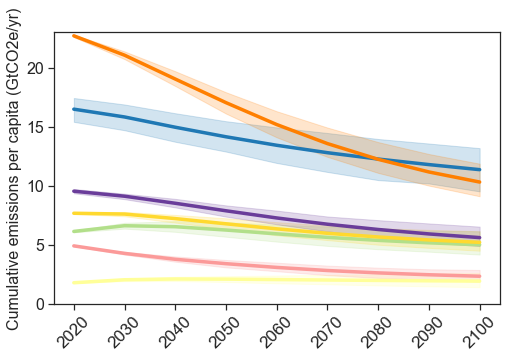

In [74]:
# Conceptual Figure - Cum emissions per cap 

# List of regions of interest
regions=['USA','EUR','CHN','RUS', 'LAM', 'IND', 'AFR']
variable = 'CUM_CO2_per_cap_INCL_CDR'

df = allmodels_df[(allmodels_df.Region.isin(regions))]

sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5})

colours = sns.color_palette("Paired",12)
col_lam = sns.color_palette("Set2", 6)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],col_lam[5], colours[9]]


f,ax=plt.subplots(figsize=(8,5))
ax = sns.lineplot(x='Year',y='CUM_CO2_per_cap_INCL_CDR',data=df,hue='Region',palette = colour_palette, 
                  hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], ax=ax, legend = False)
ax.set(ylim=(0, 23))
ax.set_ylabel('Cumulative emissions per capita (GtCO2e/yr)', fontsize = 16)
ax.grid(False)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 17, rotation = 45)
ax.set_xlabel("")

plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Concept.Fig - Cum_em.png', bbox_inches= 'tight')
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Concept.Fig - Cum_em.svg', bbox_inches= 'tight', dpi = 300)

/Users/susannebaur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


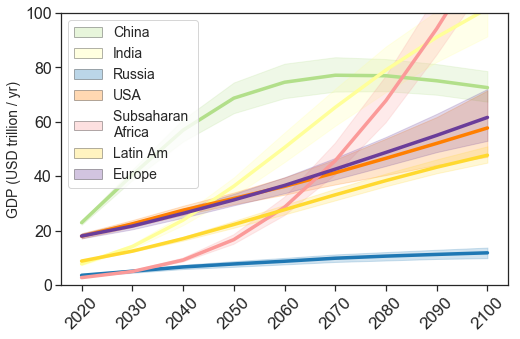

In [81]:
# Conceptual Figure - GDP 


df = allmodels_df[(allmodels_df.Region.isin(regions))]

df['GDP_Bil'] = df.loc[:,'GDP']/1000 #000 #USD Trillion

colours = sns.color_palette("Paired",12)
col_lam = sns.color_palette("Set2", 6)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],col_lam[5], colours[9]]

sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5})

f,ax=plt.subplots(figsize=(8,5))
ax = sns.lineplot(x='Year',y='GDP_Bil',data=df,hue='Region', hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], palette = colour_palette, ax=ax)
ax.grid(False)
#ax.set_title('GDP per Region', fontsize = 18)
ax.set_ylabel('GDP (USD trillion / yr)', fontsize = 14)
ax.set_xlabel("")
ax.set_ylim(0,100)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 17, rotation = 45)

ax.legend(handles =  [Patch(facecolor=colours[2], edgecolor='k', label='China', alpha = 0.3), 
                           Patch(facecolor=colours[10], edgecolor='k', label='India', alpha = 0.3),
                           Patch(facecolor=colours[1], edgecolor='k', label='Russia', alpha = 0.3),
                           Patch(facecolor=colours[7], edgecolor='k', label='USA', alpha = 0.3),
                           Patch(facecolor=colours[4], edgecolor='k', label='Subsaharan \nAfrica', alpha = 0.3),
                           Patch(facecolor=col_lam[5], edgecolor='k', label='Latin Am', alpha = 0.3),
                           Patch(facecolor=colours[9], edgecolor='k', label='Europe', alpha = 0.3)], fontsize = 14)


plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Concept.Fig - GDP_trillion.png', bbox_inches= 'tight')
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Concept.Fig - GDP_trillion.svg', bbox_inches= 'tight', dpi = 300)

In [43]:
print(allmodels_df.Scenario.unique())

['SSP1-19-SPA0-V17' 'SSP1-Ref-SPA0-V17' 'SSP2-Ref-SPA0-V17'
 'SSP2-LF-SPA2-V17' 'SSP1-19' 'SSP1-26' 'SSP2-19' 'SSP2-26'
 'LowEnergyDemand' 'SSP1-19-SPA1-V17' 'SSP2-19-SPA2-V17'
 'SSP1-26-SPA1-V17' 'SSP2-26-SPA2-V17' 'SSP5-19-SPA5-V17'
 'SSP5-26-SPA5-V17']


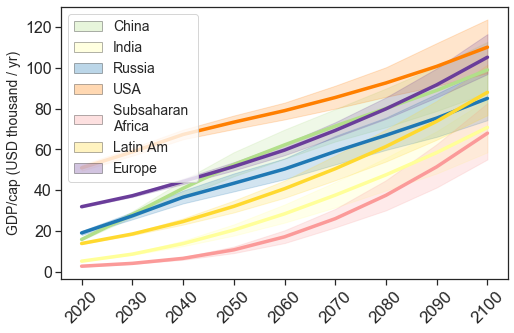

In [5]:
regions=['USA','EUR','CHN','RUS', 'LAM', 'IND', 'AFR']

df = allmodels_df[(allmodels_df.Region.isin(regions))]

#df['GDP_Bil'] = df.loc[:,'GDP']/1000 #000 #USD Trillion



colours = sns.color_palette("Paired",12)
col_lam = sns.color_palette("Set2", 6)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],col_lam[5], colours[9]]

sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5})

f,ax=plt.subplots(figsize=(8,5))
ax = sns.lineplot(x='Year',y='GDP_cap',data=df,hue='Region', hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], palette = colour_palette, ax=ax)
ax.grid(False)
#ax.set_title('GDP per Region', fontsize = 18)
ax.set_ylabel('GDP/cap (USD thousand / yr)', fontsize = 14)
ax.set_xlabel("")
#ax.set_ylim(0,150)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 17, rotation = 45)

ax.legend(handles =  [Patch(facecolor=colours[2], edgecolor='k', label='China', alpha = 0.3), 
                           Patch(facecolor=colours[10], edgecolor='k', label='India', alpha = 0.3),
                           Patch(facecolor=colours[1], edgecolor='k', label='Russia', alpha = 0.3),
                           Patch(facecolor=colours[7], edgecolor='k', label='USA', alpha = 0.3),
                           Patch(facecolor=colours[4], edgecolor='k', label='Subsaharan \nAfrica', alpha = 0.3),
                           Patch(facecolor=col_lam[5], edgecolor='k', label='Latin Am', alpha = 0.3),
                           Patch(facecolor=colours[9], edgecolor='k', label='Europe', alpha = 0.3)], fontsize = 14)


plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Concept.Fig - GDP_cap.png', bbox_inches= 'tight')
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/Concept.Fig - GDP_cap.svg', bbox_inches= 'tight', dpi = 300)

/Users/susannebaur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/susannebaur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


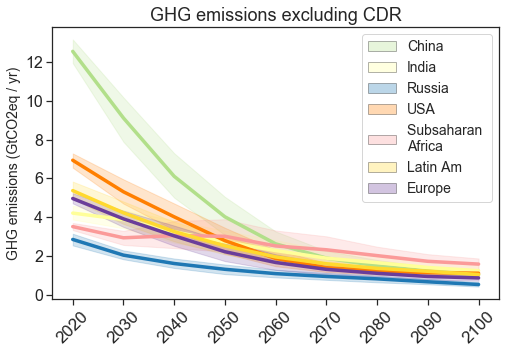

In [17]:
regions=['USA','EUR','CHN','RUS', 'LAM', 'IND', 'AFR']

df = allmodels_df[(allmodels_df.Region.isin(regions))]

df['Total_GHG'] = df['Total_GHG']/1000
df['CO2_Emissions'] = df['CO2_Emissions']/1000

#df['GDP_Bil'] = df.loc[:,'GDP']/1000 #000 #USD Trillion



colours = sns.color_palette("Paired",12)
col_lam = sns.color_palette("Set2", 6)
colour_palette = [colours[2],colours[10],colours[1],colours[7],colours[4],col_lam[5], colours[9]]

sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5})

f,ax=plt.subplots(figsize=(8,5))
ax = sns.lineplot(x='Year',y='CO2_Emissions',data=df,hue='Region', hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], palette = colour_palette, ax=ax)
ax.grid(False)
ax.set_title('GHG emissions excluding CDR', fontsize = 18)
ax.set_ylabel('GHG emissions (GtCO2eq / yr)', fontsize = 14)
ax.set_xlabel("")
#ax.set_ylim(0,150)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 17, rotation = 45)

ax.legend(handles =  [Patch(facecolor=colours[2], edgecolor='k', label='China', alpha = 0.3), 
                           Patch(facecolor=colours[10], edgecolor='k', label='India', alpha = 0.3),
                           Patch(facecolor=colours[1], edgecolor='k', label='Russia', alpha = 0.3),
                           Patch(facecolor=colours[7], edgecolor='k', label='USA', alpha = 0.3),
                           Patch(facecolor=colours[4], edgecolor='k', label='Subsaharan \nAfrica', alpha = 0.3),
                           Patch(facecolor=col_lam[5], edgecolor='k', label='Latin Am', alpha = 0.3),
                           Patch(facecolor=colours[9], edgecolor='k', label='Europe', alpha = 0.3)], fontsize = 14)


plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/CO2_Emissions.png', bbox_inches= 'tight')
plt.savefig(plot_path + 'Final_Final_Plots/Plots_Colourblind/CO2_Emissions.svg', bbox_inches= 'tight', dpi = 300)